# 统计学习导论第五次作业
作业任务：信用评分  

姓名：欧阳瑞志、班级：统计22、学号：220403102

## 一、业务理解
### 数据来源
阿里云天池提供的【Give Me Some Credit给我一些荣誉】   
### 数据主题
信用评分——采用更为【保守】的策略  
### 数据网站
https://tianchi.aliyun.com/dataset/89334
### 数据字典：  
1、SeriousDlqin2yrs：超过90天或更糟的逾期拖欠，是用户的标签，0，1分别表示未逾期和逾期【分类数据】  
2、RevolvingUtilizationOfUnsecuredLines：除了房贷车贷之外的信用卡账面金额（即贷款金额）/信用卡总额度【数值型数据】  
3、age：贷款人年龄【数值型数据】  
4、NumberOfTime30-59DaysPastDueNotWorse：借款人逾期30-59天的次数【数值型数据】  
5、DebtRatio：负债比率，每月债务、赡养费、生活费/每月总收入【数值型数据】  
6、MonthlyIncome：月收入【数值型数据】  
7、NumberOfOpenCreditLinesAndLoans：开放式信贷和贷款数量，开放式贷款（分期付款如汽车贷款或抵押贷款）和信贷（如信用卡）的数量【数值型数据】  
8、NumberOfTimes90DaysLate：借款者有90天或更高逾期的次数【数值型数据】  
9、NumberRealEstateLoansOrLines：包括房屋净值信贷额度在内的抵押贷款和房地产贷款数量【数值型数据】  
10、NumberOfTime60-89DaysPastDueNotWorse：借款人逾期60-89天的次数【数值型数据】   
11、NumberOfDependents：不包括本人在内的家属数量【数值型数据】  
其中第一个是输出、后面是输入

In [89]:
####--------------------------------统计学习导论第五次作业（信用评分）--------------------------------####

#--------------------------------1、业务理解--------------------------------#
import pandas as pd

## 数据导入
# 阿里云天池提供的【Give Me Some Credit给我一些荣誉】
# 主题：信用评分
# https://tianchi.aliyun.com/dataset/89334

df_train = pd.read_csv("/Users/ouyangruizhi/Desktop/python/统计学习导论/信用评分/cs-training.csv")
df_test = pd.read_csv("/Users/ouyangruizhi/Desktop/python/统计学习导论/信用评分/cs-test.csv")

# 数据基本情况
df_all = pd.concat([df_train,df_test])
print("train size:",len(df_train))
print("test size:",len(df_test))

# 展示前五行数据
print('前五行数据：')
print(df_train.head())

train size: 150000
test size: 101503
前五行数据：
   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0        

## 二、数据探索
### 2.1 数据概览
由于输入和输出变量只有11个，可以绘制所有数据的可视化图  
其中对于数值型数据绘制直方图、对于分类数据绘制直条图

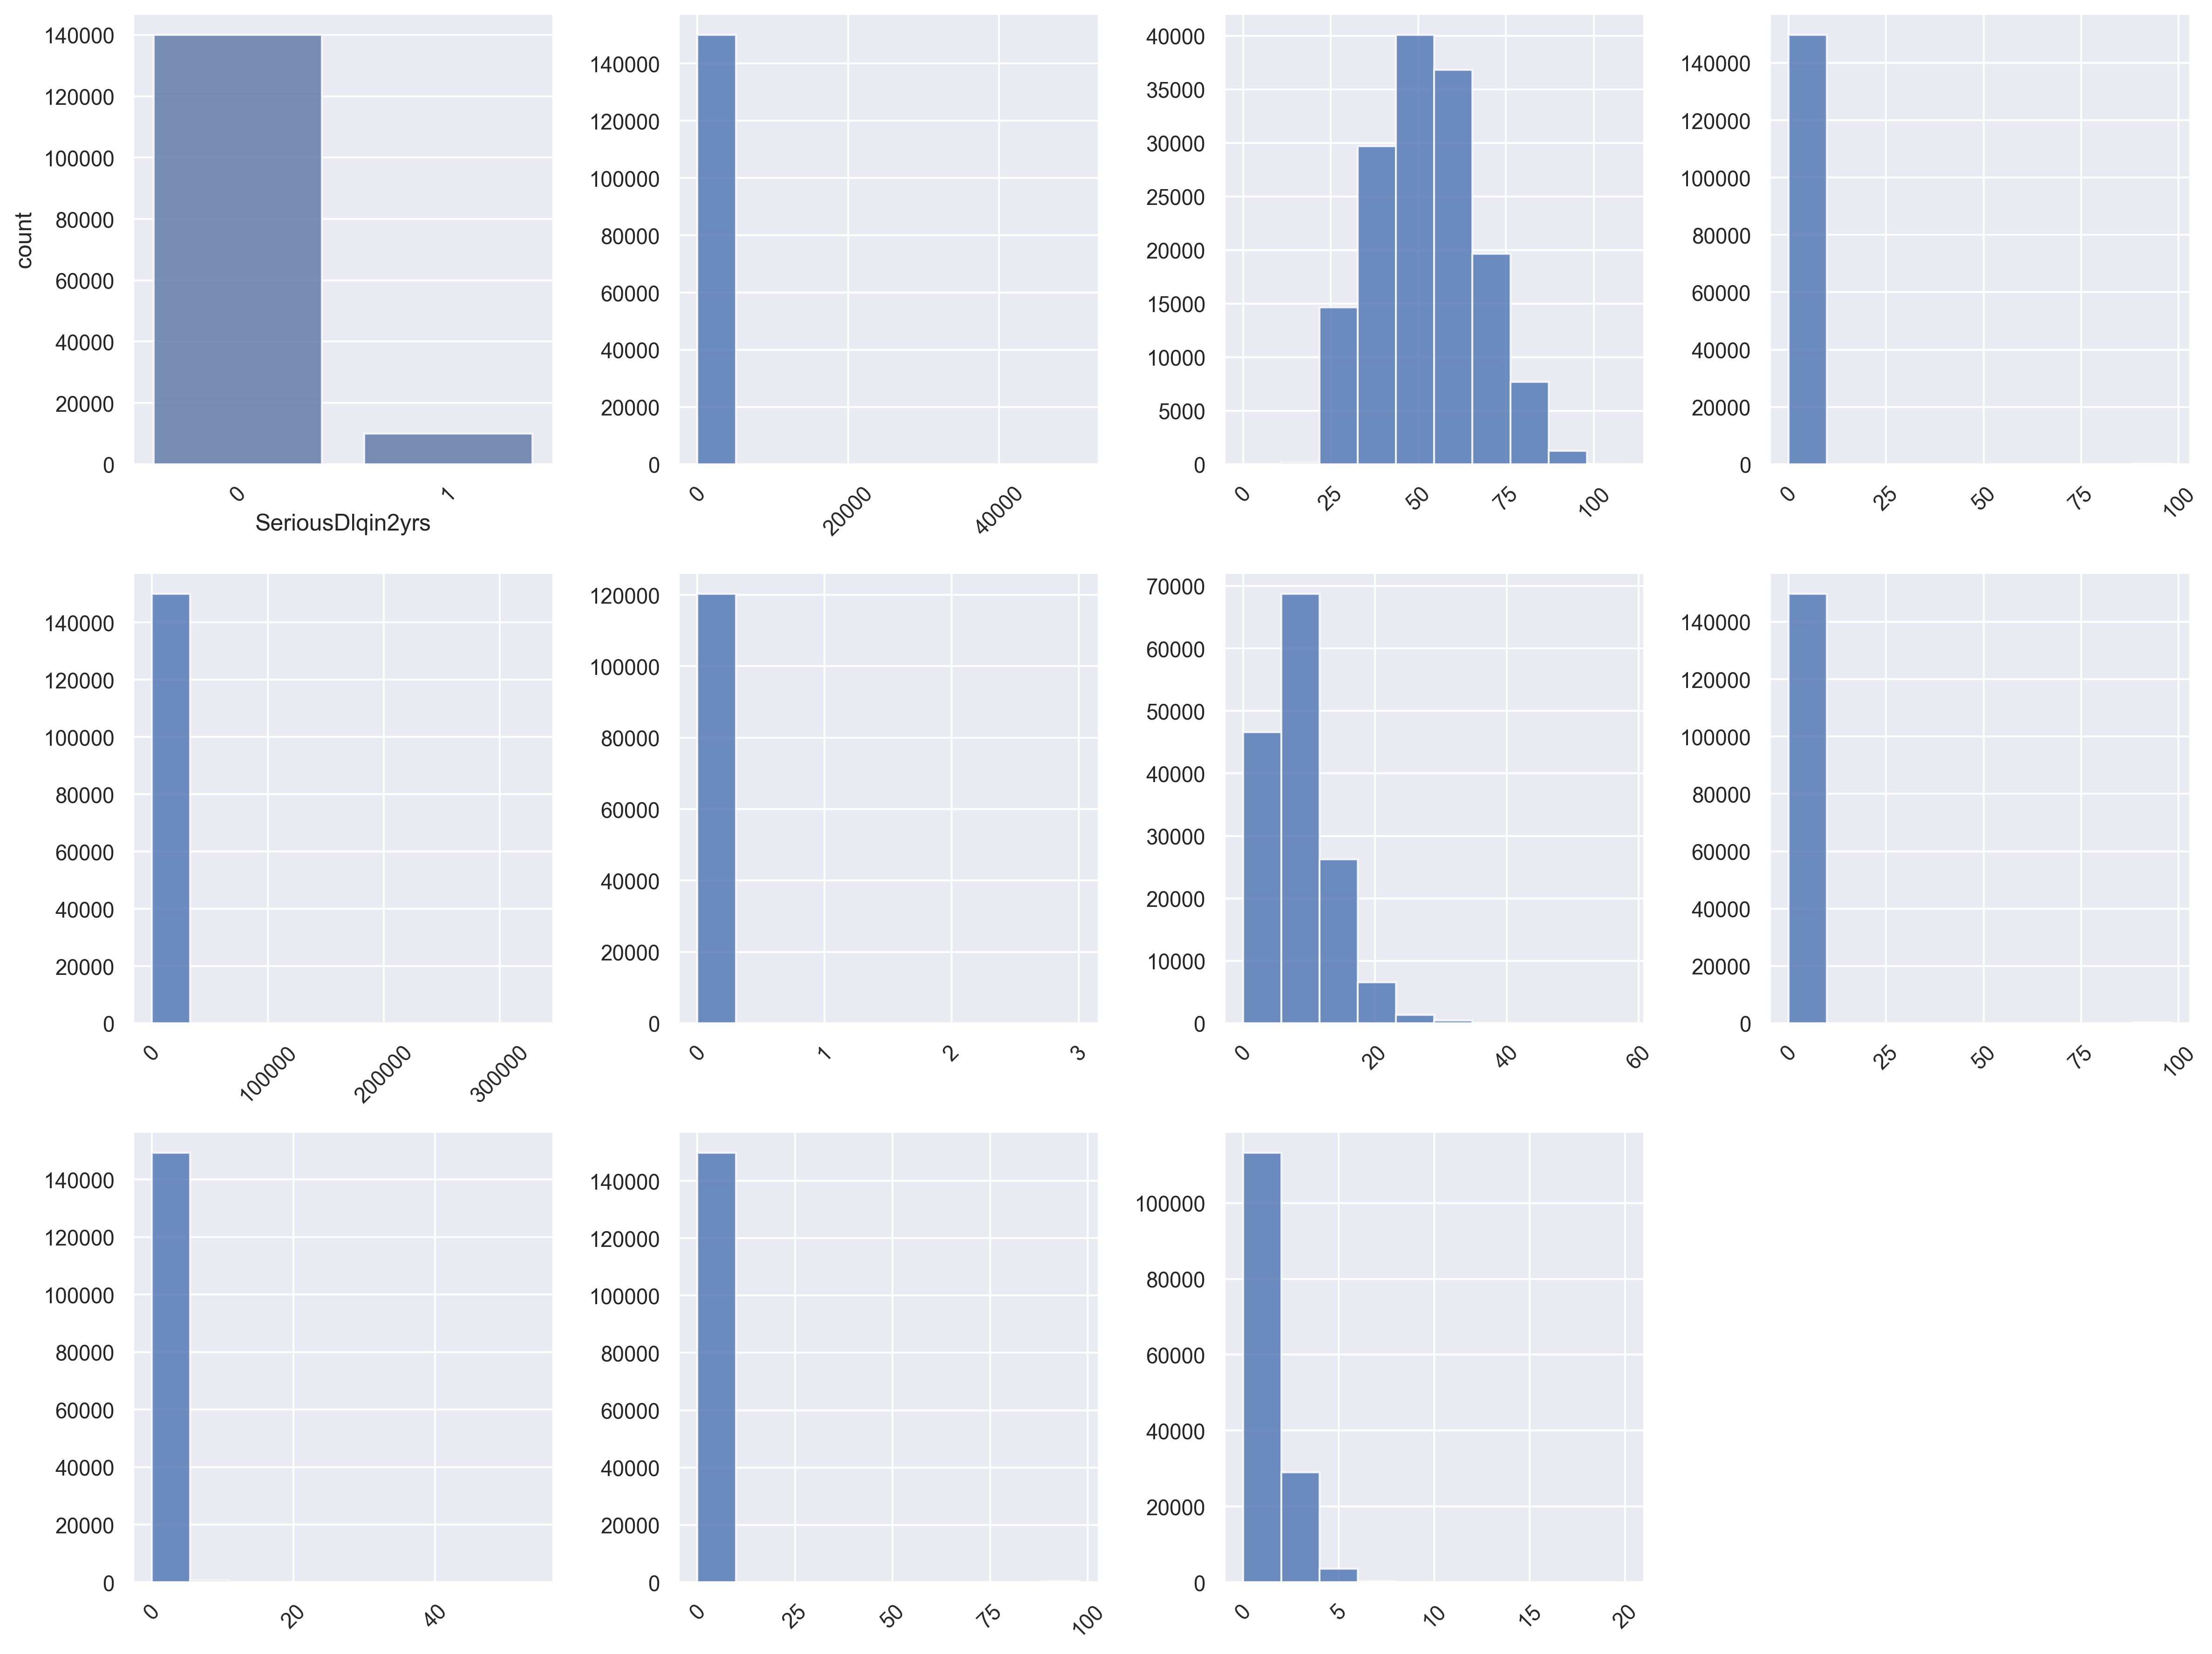

In [90]:
#--------------------------------2、数据探索--------------------------------#
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## 绘制全部指标的概览
sns.set_theme(font_scale=1)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12), dpi = 300)
axes = axes.flatten()

columns = ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines','age', 'NumberOfTime30-59DaysPastDueNotWorse',
           'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 
           'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

# 循环绘制每个子图
for i, column in enumerate(columns):
    if column in ['RevolvingUtilizationOfUnsecuredLines','age', 'NumberOfTime30-59DaysPastDueNotWorse','DebtRatio', 
                  'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 
                  'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']:
        # 对于连续数据，不再使用histplot，因为我发现对于数据量大sns库的运行速度慢，使用plt库的hist
         g = axes[i].hist(data=df_train, x=column, color='b', alpha=0.8)
    else:
        # 对于分类数据，使用countplot
        g = sns.countplot(data=df_train, x=column, color='b', alpha=0.8, ax=axes[i])

    locator = axes[i].get_xticks()
    axes[i].xaxis.set_major_locator(plt.FixedLocator(locator))
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

for j in range(len(columns), 12):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(fname="数据概览.png")

## 2.2 重要单指标的密度函数
输入变量均为数值型数据，共10个，绘制全部密度函数

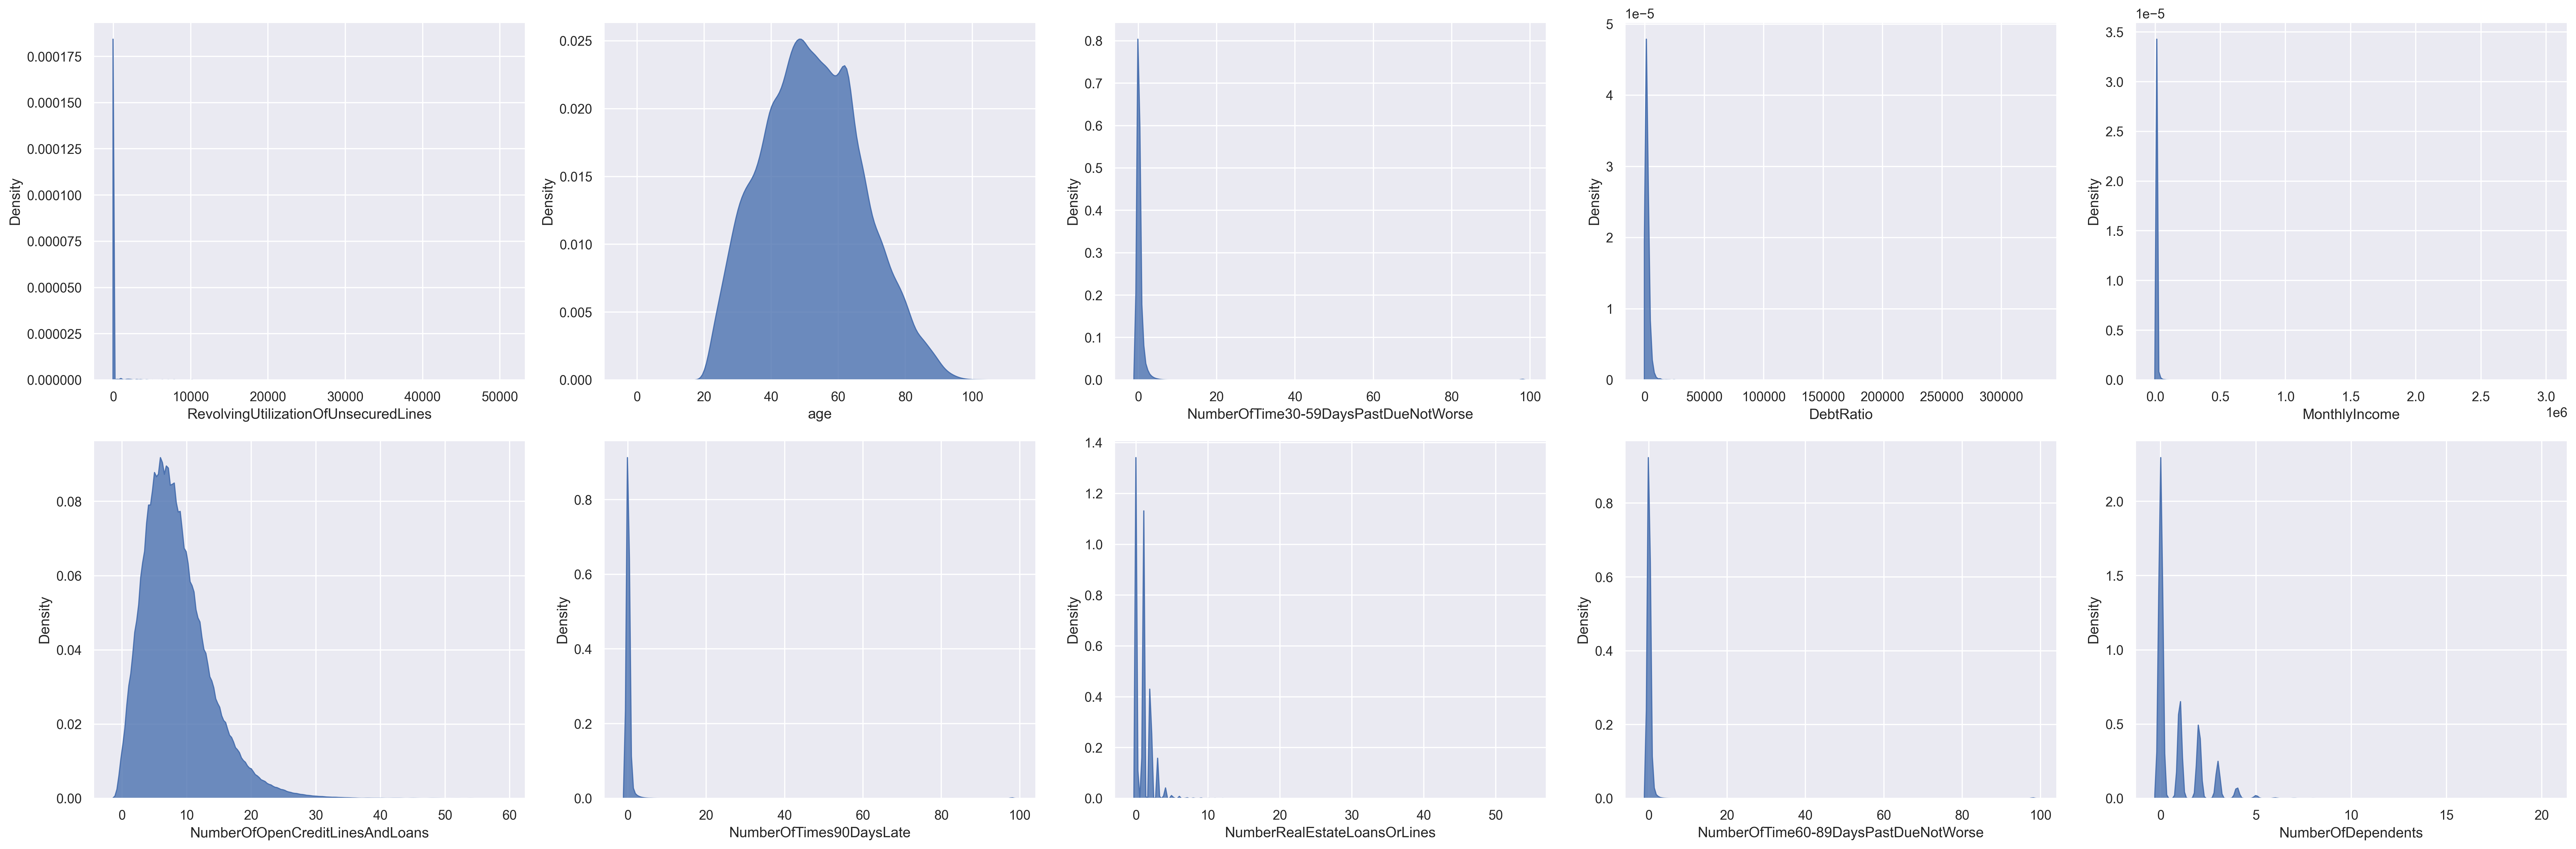

In [91]:
## 绘制重要单指标的密度函数
sns.set_theme(font_scale=1)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30, 10), dpi = 300)
axes = axes.flatten()

indicators = ['RevolvingUtilizationOfUnsecuredLines','age', 'NumberOfTime30-59DaysPastDueNotWorse','DebtRatio', 
              'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 
              'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

for i, indicator in enumerate(indicators):
    g_age_density = sns.kdeplot(data=df_train, x=indicator, fill=True, color='b', alpha=0.8, ax=axes[i])
    axes[i].set_xlabel(indicators[i])
    axes[i].set_ylabel("Density")

for j in range(len(indicators), 10):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(fname="指标密度函数图.png")

## 2.3 Box-Cox变换
观察到age大致正态分布的数据，RevolvingUtilizationOfUnsecuredLines、NumberOfOpenCreditLinesAndLoans可能通过Box-Cox变换，将非正态分布的数据转换为近似正态分布的数据。  
Box-Cox变换公式：
$$
y^{(\lambda)} = \left\{\begin{matrix} \frac{y^{\lambda}-1}{\lambda} &\lambda \neq 0 \\ ln(y) &\lambda = 0 \end{matrix}\right.
$$
变换需要满足：
$$
\frac{y_{max}}{y_{min}} > 2
$$

In [92]:
## BOX-COX变换
df_train['sqrt_RevolvingUtilizationOfUnsecuredLines'] = np.power(df_train['RevolvingUtilizationOfUnsecuredLines'], 1/4)
df_train['sqrt_NumberOfOpenCreditLinesAndLoans'] = np.power(df_train['NumberOfOpenCreditLinesAndLoans'], 1/4)

print('前五行数据：')
print(df_train.head())

前五行数据：
   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13            

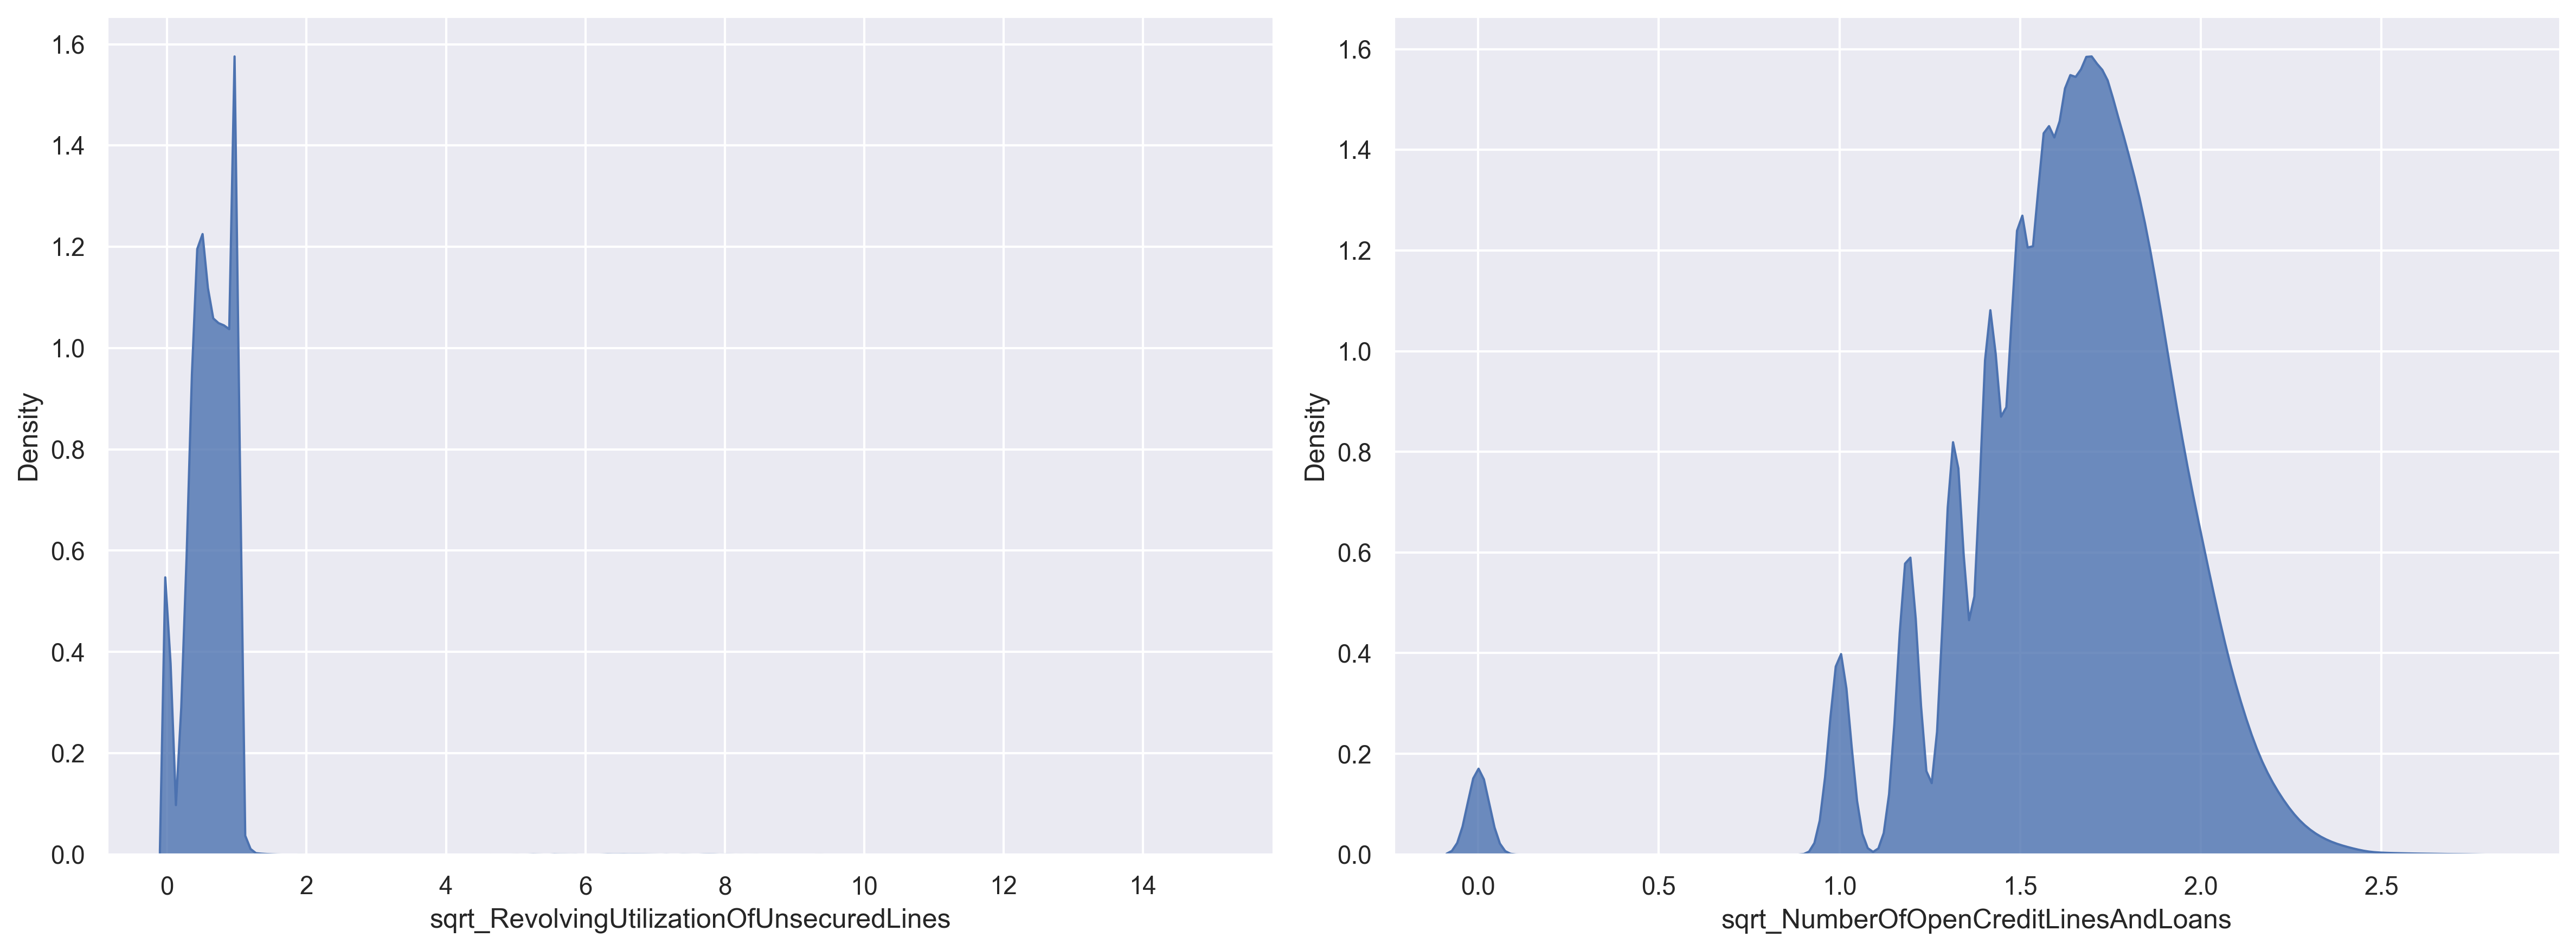

In [93]:
# 绘制变换后的密度函数
sns.set_theme(font_scale=1)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), dpi = 300)
axes = axes.flatten()

# 指标列表及对应的坐标轴标签
indicators = ['sqrt_RevolvingUtilizationOfUnsecuredLines', 'sqrt_NumberOfOpenCreditLinesAndLoans']

for i, indicator in enumerate(indicators):
    g_age_density = sns.kdeplot(data=df_train, x=indicator, fill=True, color='b', alpha=0.8, ax=axes[i])
    axes[i].set_xlabel(indicators[i])
    axes[i].set_ylabel("Density")

for j in range(len(indicators), 2):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(fname="变换后的密度函数图.png")

## 2.4 正态性检验
通过Q-Q图和直方图检验数据的正态性

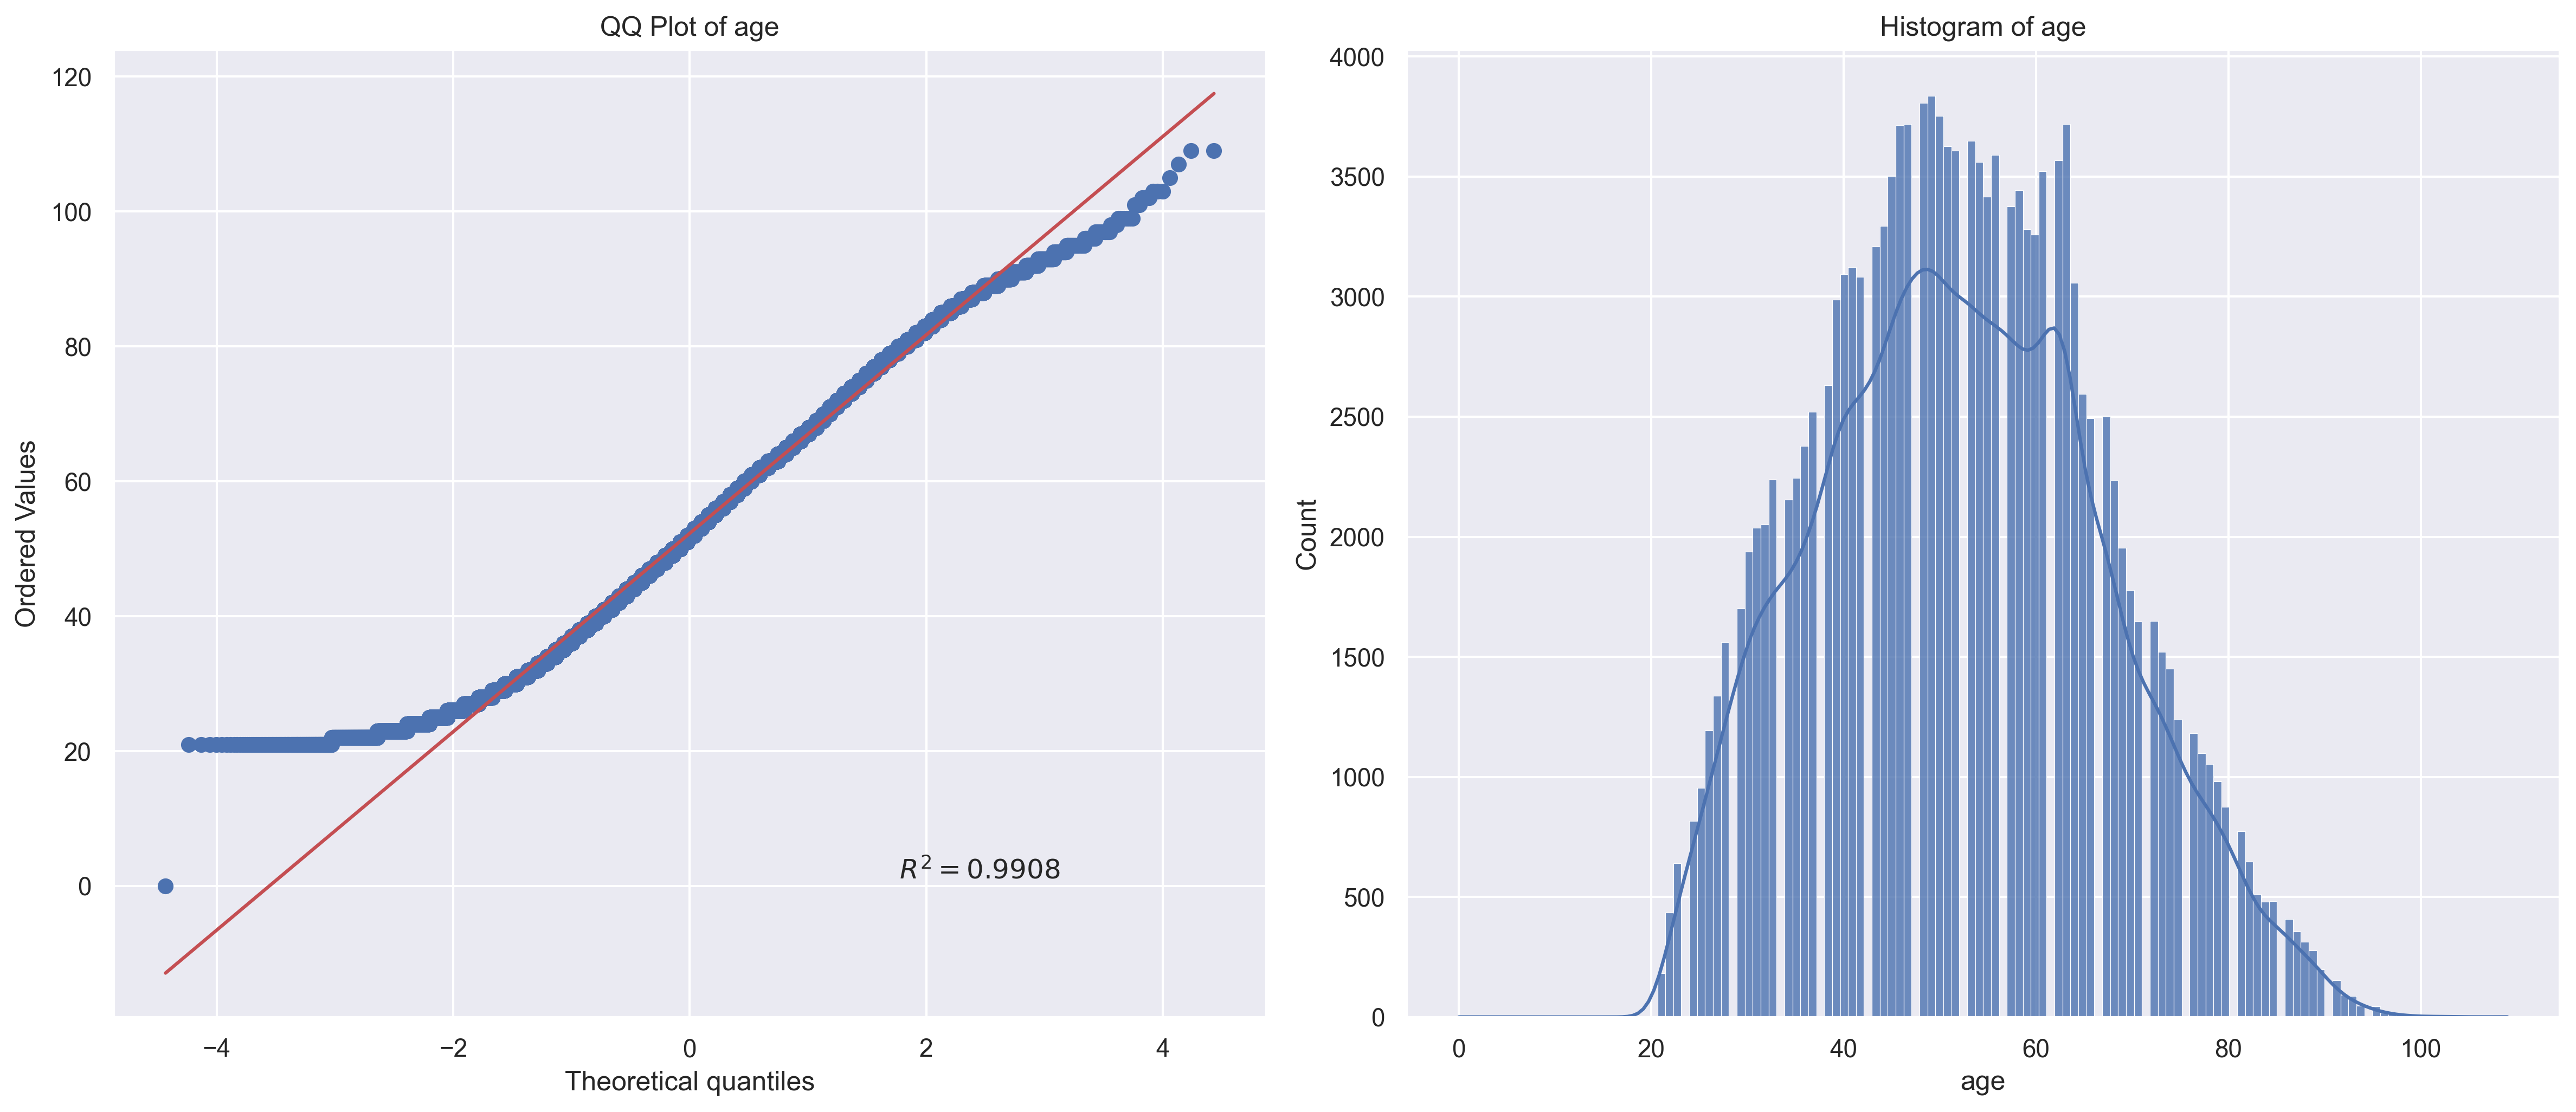

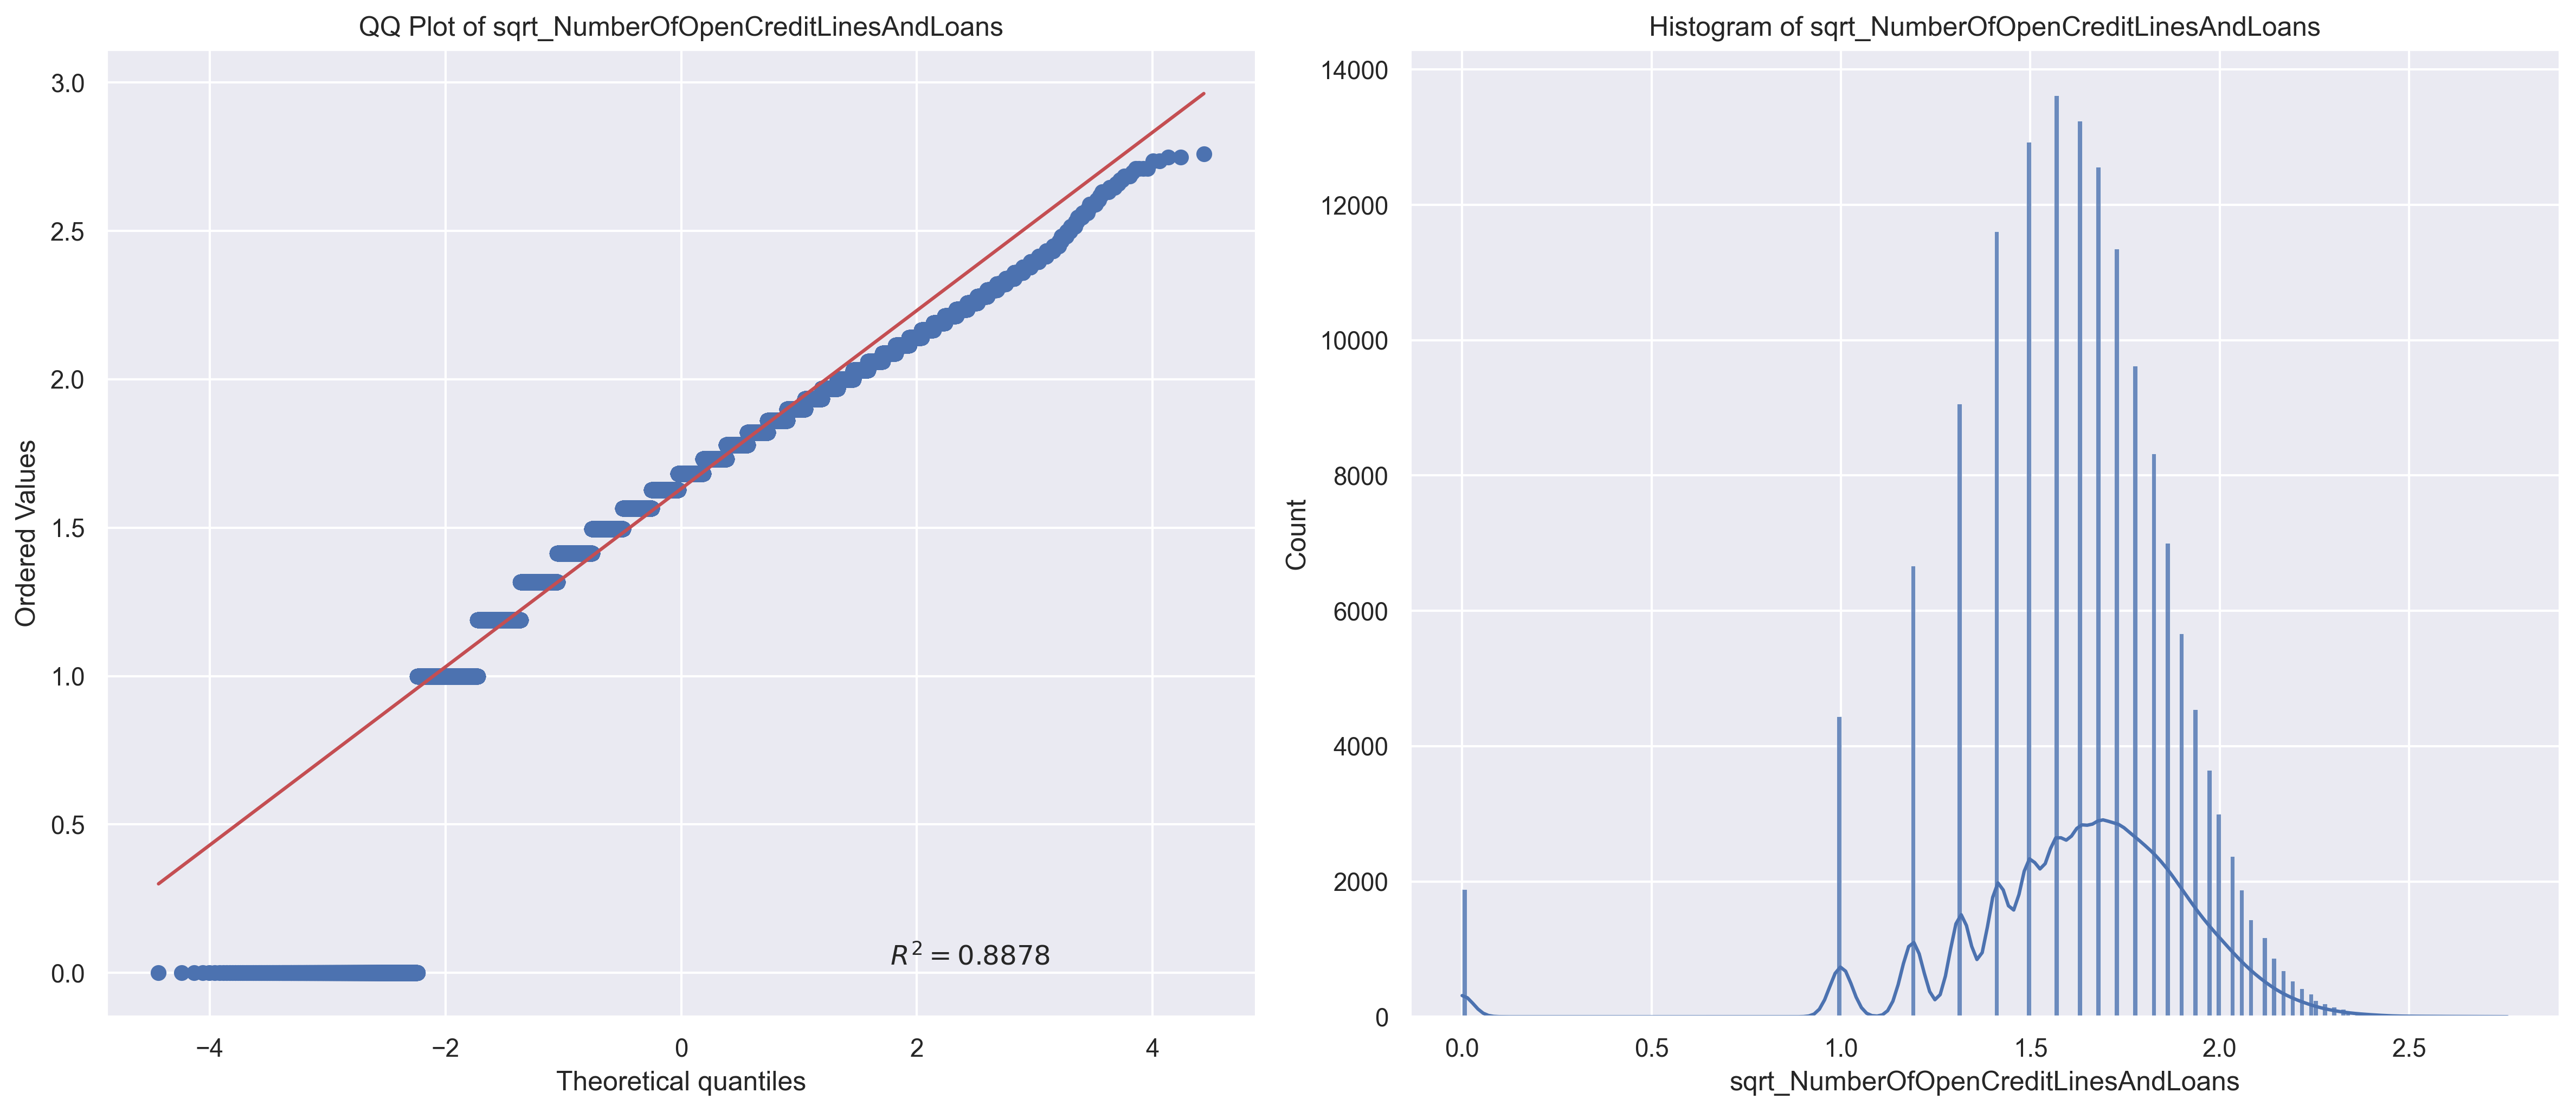

In [94]:
## 正态性检验
# age的图检验
sns.set_theme(font_scale=1)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7), dpi=300)

# Q-Q图
ax1 = axes[0]
stats.probplot(df_train['age'], plot=ax1, rvalue=True)
ax1.set_title('QQ Plot of age')

# 直方图
ax2 = axes[1]
sns.histplot(data=df_train, x='age', color='b', alpha=0.8, ax=ax2, kde=True)
ax2.set_title('Histogram of age')

plt.tight_layout()
plt.savefig(fname="age正态性检验图.png")

# sqrt_NumberOfOpenCreditLinesAndLoans
sns.set_theme(font_scale=1)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7), dpi=300)
# Q-Q图
ax1 = axes[0]
stats.probplot(df_train['sqrt_NumberOfOpenCreditLinesAndLoans'], plot=ax1, rvalue=True)
ax1.set_title('QQ Plot of sqrt_NumberOfOpenCreditLinesAndLoans')

# 直方图
ax2 = axes[1]
sns.histplot(data=df_train, x='sqrt_NumberOfOpenCreditLinesAndLoans', color='b', alpha=0.8, ax=ax2, kde=True)
ax2.set_title('Histogram of sqrt_NumberOfOpenCreditLinesAndLoans')

plt.tight_layout()
plt.savefig(fname="sqrt_NumberOfOpenCreditLinesAndLoans正态性检验图.png")

可以看出age服从正态分布、变换后的数据不服从正态分布

## 三、数据预处理
### 3.1 异常值检验与处理
#### 3.1.1 箱线图

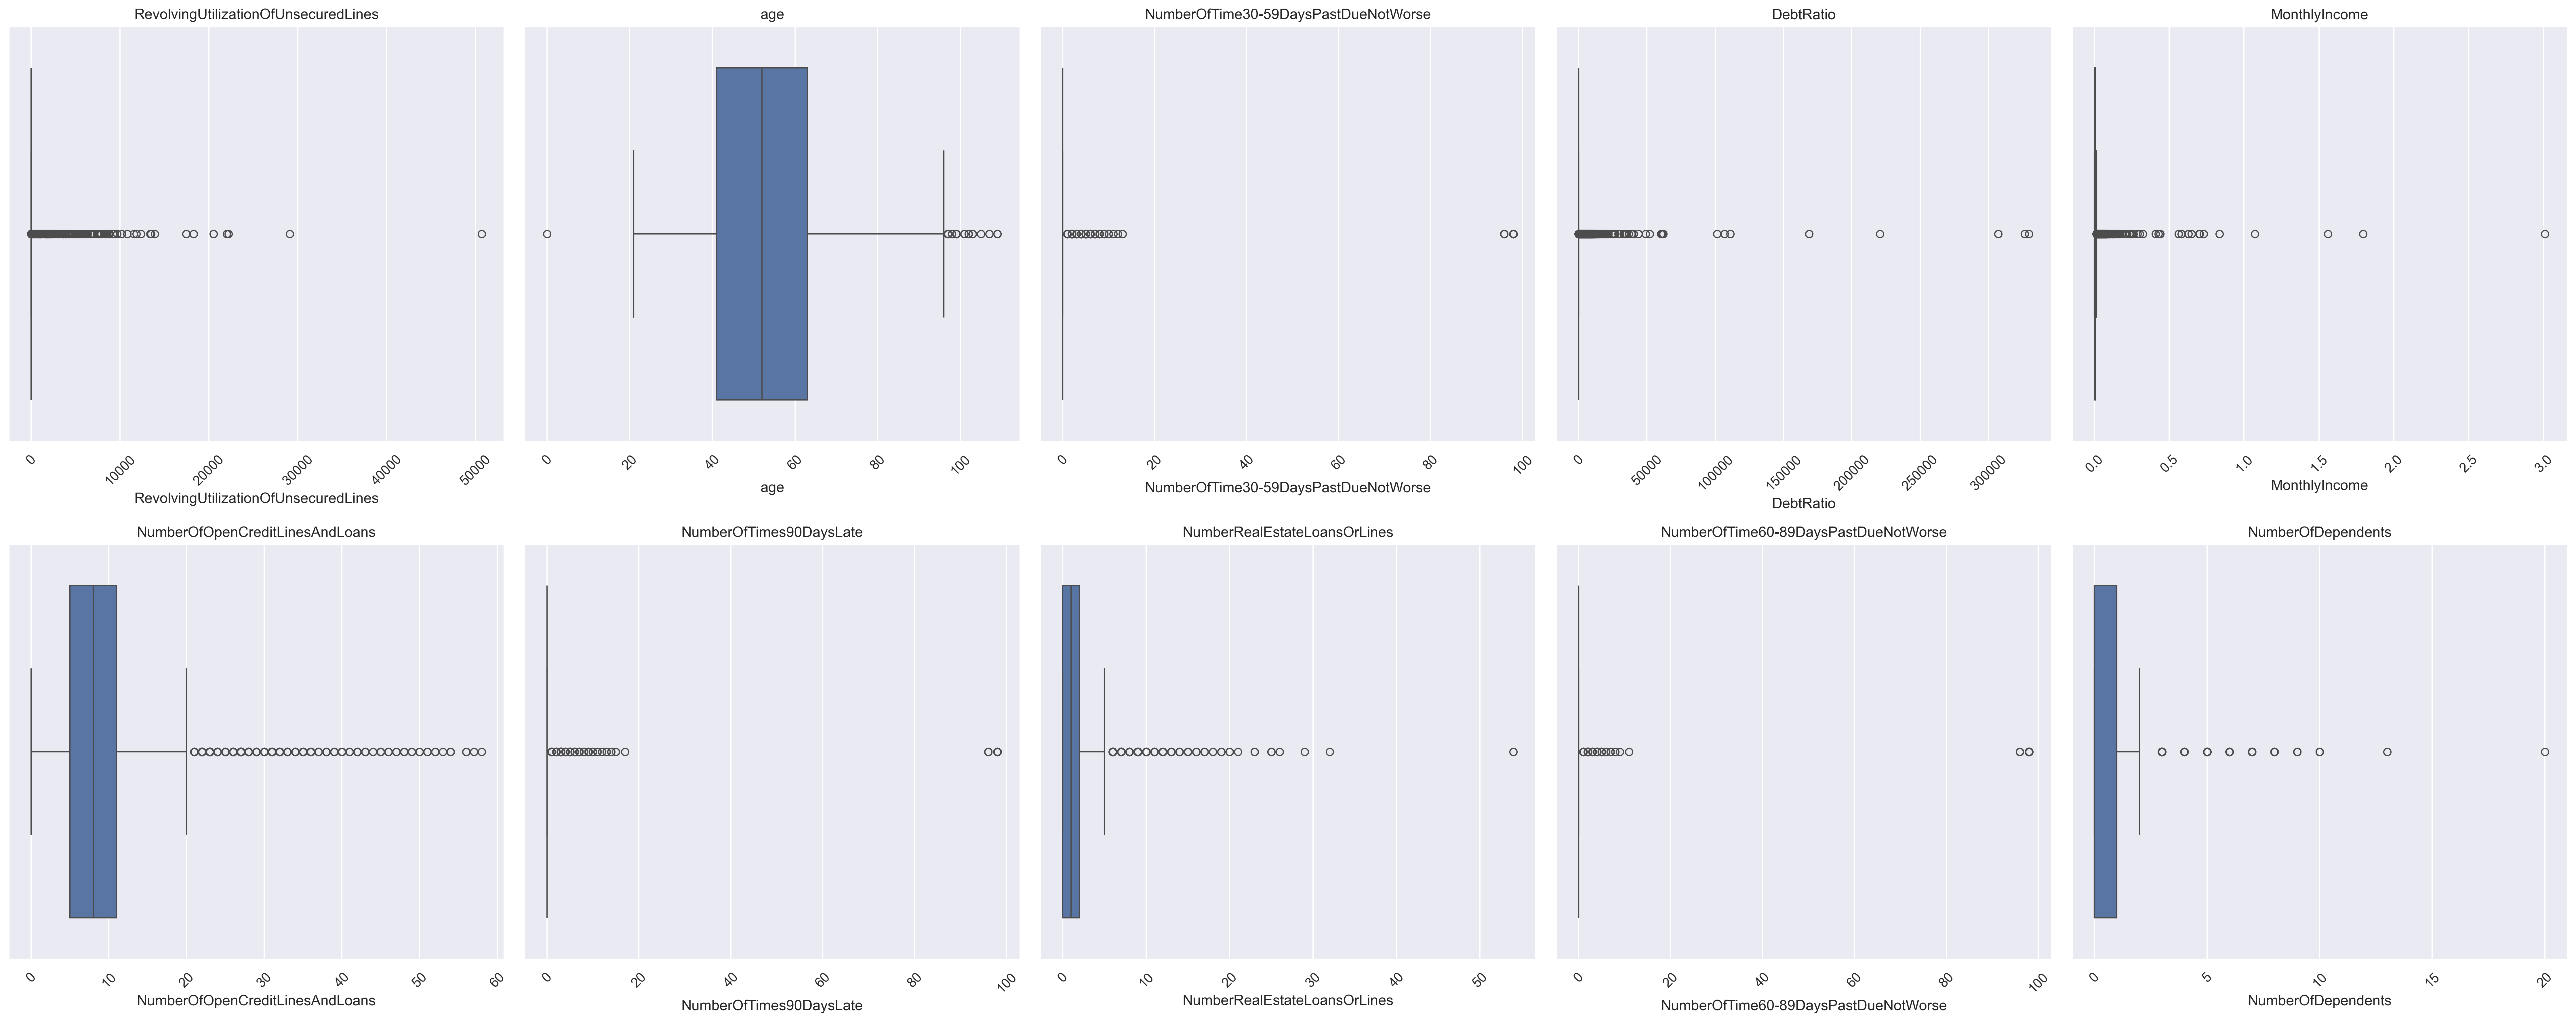

In [95]:
#--------------------------------3、数据预处理--------------------------------#

## 异常值检测与处理
# 箱线图
sns.set_theme(font_scale=1)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30, 12), dpi = 300)
axes = axes.flatten()

box_columns = ['RevolvingUtilizationOfUnsecuredLines','age', 'NumberOfTime30-59DaysPastDueNotWorse',
           'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 
           'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

# 循环绘制每个子图
for i, column in enumerate(box_columns):
    g_previous_box = sns.boxplot(data=df_train, x=column, ax=axes[i])
    axes[i].set_title(column)

    locator = axes[i].get_xticks()
    axes[i].xaxis.set_major_locator(plt.FixedLocator(locator))
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

for j in range(len(box_columns), 10):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(fname="箱线图.png")

#### 3.1.2 3$\sigma$法则

In [96]:
# 3sigma法则
for column in box_columns:
    mean_value = df_train[column].mean()
    std_value = df_train[column].std()
    lower_bound = mean_value - 3 * std_value
    upper_bound = mean_value + 3 * std_value
    outlier_count = df_train[(df_train[column] < lower_bound) | (df_train[column] > upper_bound)].shape[0]
    print(f"{column}列3sigma外离群值个数为: {outlier_count}")

RevolvingUtilizationOfUnsecuredLines列3sigma外离群值个数为: 191
age列3sigma外离群值个数为: 46
NumberOfTime30-59DaysPastDueNotWorse列3sigma外离群值个数为: 270
DebtRatio列3sigma外离群值个数为: 659
MonthlyIncome列3sigma外离群值个数为: 321
NumberOfOpenCreditLinesAndLoans列3sigma外离群值个数为: 1898
NumberOfTimes90DaysLate列3sigma外离群值个数为: 278
NumberRealEstateLoansOrLines列3sigma外离群值个数为: 1482
NumberOfTime60-89DaysPastDueNotWorse列3sigma外离群值个数为: 269
NumberOfDependents列3sigma外离群值个数为: 991


NumberOfOpenCreditLinesAndLoans以及NumberRealEstateLoansOrLines的异常值数量较大。  
从数据的角度而言这两个特征可以考虑剔除或删除有异常的数据，但从业务角度而言，这两个特征与逾期风险可能存在较大的关联，所以最终还是保留这两个特征。

#### 3.1.3 异常值处理
将异常值替换为空nan

In [97]:
# 异常值处理
# 3sigma法则处理异常值，将3sigma外的数据替换为nan
for column in box_columns:
    mean_value = df_train[column].mean()
    std_value = df_train[column].std()
    lower_bound = mean_value - 3 * std_value
    upper_bound = mean_value + 3 * std_value

    # 将3sigma外的数据替换为nan
    df_train.loc[(df_train[column] < lower_bound) | (df_train[column] > upper_bound), column] = np.nan

    outlier_count = df_train[(df_train[column] < lower_bound) | (df_train[column] > upper_bound)].shape[0]
    print(f"{column}列3sigma外离群值个数为: {outlier_count}")

RevolvingUtilizationOfUnsecuredLines列3sigma外离群值个数为: 0
age列3sigma外离群值个数为: 0
NumberOfTime30-59DaysPastDueNotWorse列3sigma外离群值个数为: 0
DebtRatio列3sigma外离群值个数为: 0
MonthlyIncome列3sigma外离群值个数为: 0
NumberOfOpenCreditLinesAndLoans列3sigma外离群值个数为: 0
NumberOfTimes90DaysLate列3sigma外离群值个数为: 0
NumberRealEstateLoansOrLines列3sigma外离群值个数为: 0
NumberOfTime60-89DaysPastDueNotWorse列3sigma外离群值个数为: 0
NumberOfDependents列3sigma外离群值个数为: 0


### 3.2 缺失值检验与处理
#### 3.2.1 缺失情况

In [98]:
## 缺失值检测与处理
# 缺失比例
print('缺失值情况及比例：')
total_rows = df_train.shape[0]
missing_value_sums = df_train.isnull().sum()
missing_value_proportions = (missing_value_sums / total_rows) * 100

for column, missing_count in missing_value_sums.items():
    proportion = missing_value_proportions[column]
    print(f"{column}: 缺失值数量为 {missing_count}，缺失值比例为 {proportion:.2f}%")

缺失值情况及比例：
Unnamed: 0: 缺失值数量为 0，缺失值比例为 0.00%
SeriousDlqin2yrs: 缺失值数量为 0，缺失值比例为 0.00%
RevolvingUtilizationOfUnsecuredLines: 缺失值数量为 191，缺失值比例为 0.13%
age: 缺失值数量为 46，缺失值比例为 0.03%
NumberOfTime30-59DaysPastDueNotWorse: 缺失值数量为 270，缺失值比例为 0.18%
DebtRatio: 缺失值数量为 659，缺失值比例为 0.44%
MonthlyIncome: 缺失值数量为 30052，缺失值比例为 20.03%
NumberOfOpenCreditLinesAndLoans: 缺失值数量为 1898，缺失值比例为 1.27%
NumberOfTimes90DaysLate: 缺失值数量为 278，缺失值比例为 0.19%
NumberRealEstateLoansOrLines: 缺失值数量为 1482，缺失值比例为 0.99%
NumberOfTime60-89DaysPastDueNotWorse: 缺失值数量为 269，缺失值比例为 0.18%
NumberOfDependents: 缺失值数量为 4915，缺失值比例为 3.28%
sqrt_RevolvingUtilizationOfUnsecuredLines: 缺失值数量为 0，缺失值比例为 0.00%
sqrt_NumberOfOpenCreditLinesAndLoans: 缺失值数量为 0，缺失值比例为 0.00%


#### 3.2.2 缺失比例小于5%的处理
直接中位数插补

In [99]:
# 对于缺失比例小于5%，采用中位数直接插补
variables_to_impute = ['RevolvingUtilizationOfUnsecuredLines','age', 'NumberOfTime30-59DaysPastDueNotWorse',
           'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 
           'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

for variable in variables_to_impute:
    missing_proportion = missing_value_proportions[variable]
    if missing_proportion < 5:
        median_value = df_train[variable].median()
        df_train[variable].fillna(median_value, inplace=True)

#### 3.2.3 缺失值比例在20%左右的处理
先按年龄分组（15个观测一组）   
再在组内进行中位数插补

In [100]:
# 对于缺失比例较高的MonthlyIncome，先分组，再在组内使用中位数插补
# 按年龄分组
min_age = df_train['age'].min()
max_age = df_train['age'].max()
num_groups = 10000

group_width = (max_age - min_age) / num_groups

group_labels = []
for i in range(num_groups):
    lower_bound = min_age + i * group_width
    upper_bound = min_age + (i + 1) * group_width
    group_labels.append(f'Group_{i + 1}: {lower_bound:.2f}-{upper_bound:.2f}')

df_train['age_group'] = pd.cut(df_train['age'], bins=num_groups, labels=group_labels)

# 中位数插补
for group in df_train['age_group'].unique():
    group_data = df_train[df_train['age_group'] == group]
    median_value = group_data['MonthlyIncome'].median()
    df_train.loc[(df_train['age_group'] == group) & (df_train['MonthlyIncome'].isnull()), 'MonthlyIncome'] = median_value

# 缺失比例
print('缺失值情况及比例：')
total_rows = df_train.shape[0]
missing_value_sums = df_train.isnull().sum()
missing_value_proportions = (missing_value_sums / total_rows) * 100

for column, missing_count in missing_value_sums.items():
    proportion = missing_value_proportions[column]
    print(f"{column}: 缺失值数量为 {missing_count}，缺失值比例为 {proportion:.2f}%")

df_train = df_train.drop(columns=['Unnamed: 0', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfOpenCreditLinesAndLoans', 'age_group'])

缺失值情况及比例：
Unnamed: 0: 缺失值数量为 0，缺失值比例为 0.00%
SeriousDlqin2yrs: 缺失值数量为 0，缺失值比例为 0.00%
RevolvingUtilizationOfUnsecuredLines: 缺失值数量为 0，缺失值比例为 0.00%
age: 缺失值数量为 0，缺失值比例为 0.00%
NumberOfTime30-59DaysPastDueNotWorse: 缺失值数量为 0，缺失值比例为 0.00%
DebtRatio: 缺失值数量为 0，缺失值比例为 0.00%
MonthlyIncome: 缺失值数量为 0，缺失值比例为 0.00%
NumberOfOpenCreditLinesAndLoans: 缺失值数量为 0，缺失值比例为 0.00%
NumberOfTimes90DaysLate: 缺失值数量为 0，缺失值比例为 0.00%
NumberRealEstateLoansOrLines: 缺失值数量为 0，缺失值比例为 0.00%
NumberOfTime60-89DaysPastDueNotWorse: 缺失值数量为 0，缺失值比例为 0.00%
NumberOfDependents: 缺失值数量为 0，缺失值比例为 0.00%
sqrt_RevolvingUtilizationOfUnsecuredLines: 缺失值数量为 0，缺失值比例为 0.00%
sqrt_NumberOfOpenCreditLinesAndLoans: 缺失值数量为 0，缺失值比例为 0.00%
age_group: 缺失值数量为 0，缺失值比例为 0.00%


### 3.3 变量过滤
#### 3.3.1 低方差过滤法

In [101]:
## 变量过滤
# 低方差过滤法
from sklearn.feature_selection import VarianceThreshold

threshold = 0.05 # 阈值

selector = VarianceThreshold(threshold=threshold)
selector.fit(df_train.drop('SeriousDlqin2yrs', axis=1))

selected_columns = df_train.drop('SeriousDlqin2yrs', axis=1).columns[selector.get_support()]

df_train_low_var = df_train[['SeriousDlqin2yrs'] + list(selected_columns)]

print("过滤前的数据形状：", df_train.shape)
print("经过低方差过滤后的数据形状：", df_train_low_var.shape)
print('所包含的变量', df_train_low_var.columns)

过滤前的数据形状： (150000, 11)
经过低方差过滤后的数据形状： (150000, 11)
所包含的变量 Index(['SeriousDlqin2yrs', 'age', 'NumberOfTime30-59DaysPastDueNotWorse',
       'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'sqrt_RevolvingUtilizationOfUnsecuredLines',
       'sqrt_NumberOfOpenCreditLinesAndLoans'],
      dtype='object')


结论：低方差过滤法没有过滤变量

#### 3.3.2 高相关过滤法

经过高相关过滤后的数据形状： (150000, 11)
所包含的变量 Index(['SeriousDlqin2yrs', 'age', 'NumberOfTime30-59DaysPastDueNotWorse',
       'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'sqrt_RevolvingUtilizationOfUnsecuredLines',
       'sqrt_NumberOfOpenCreditLinesAndLoans'],
      dtype='object')


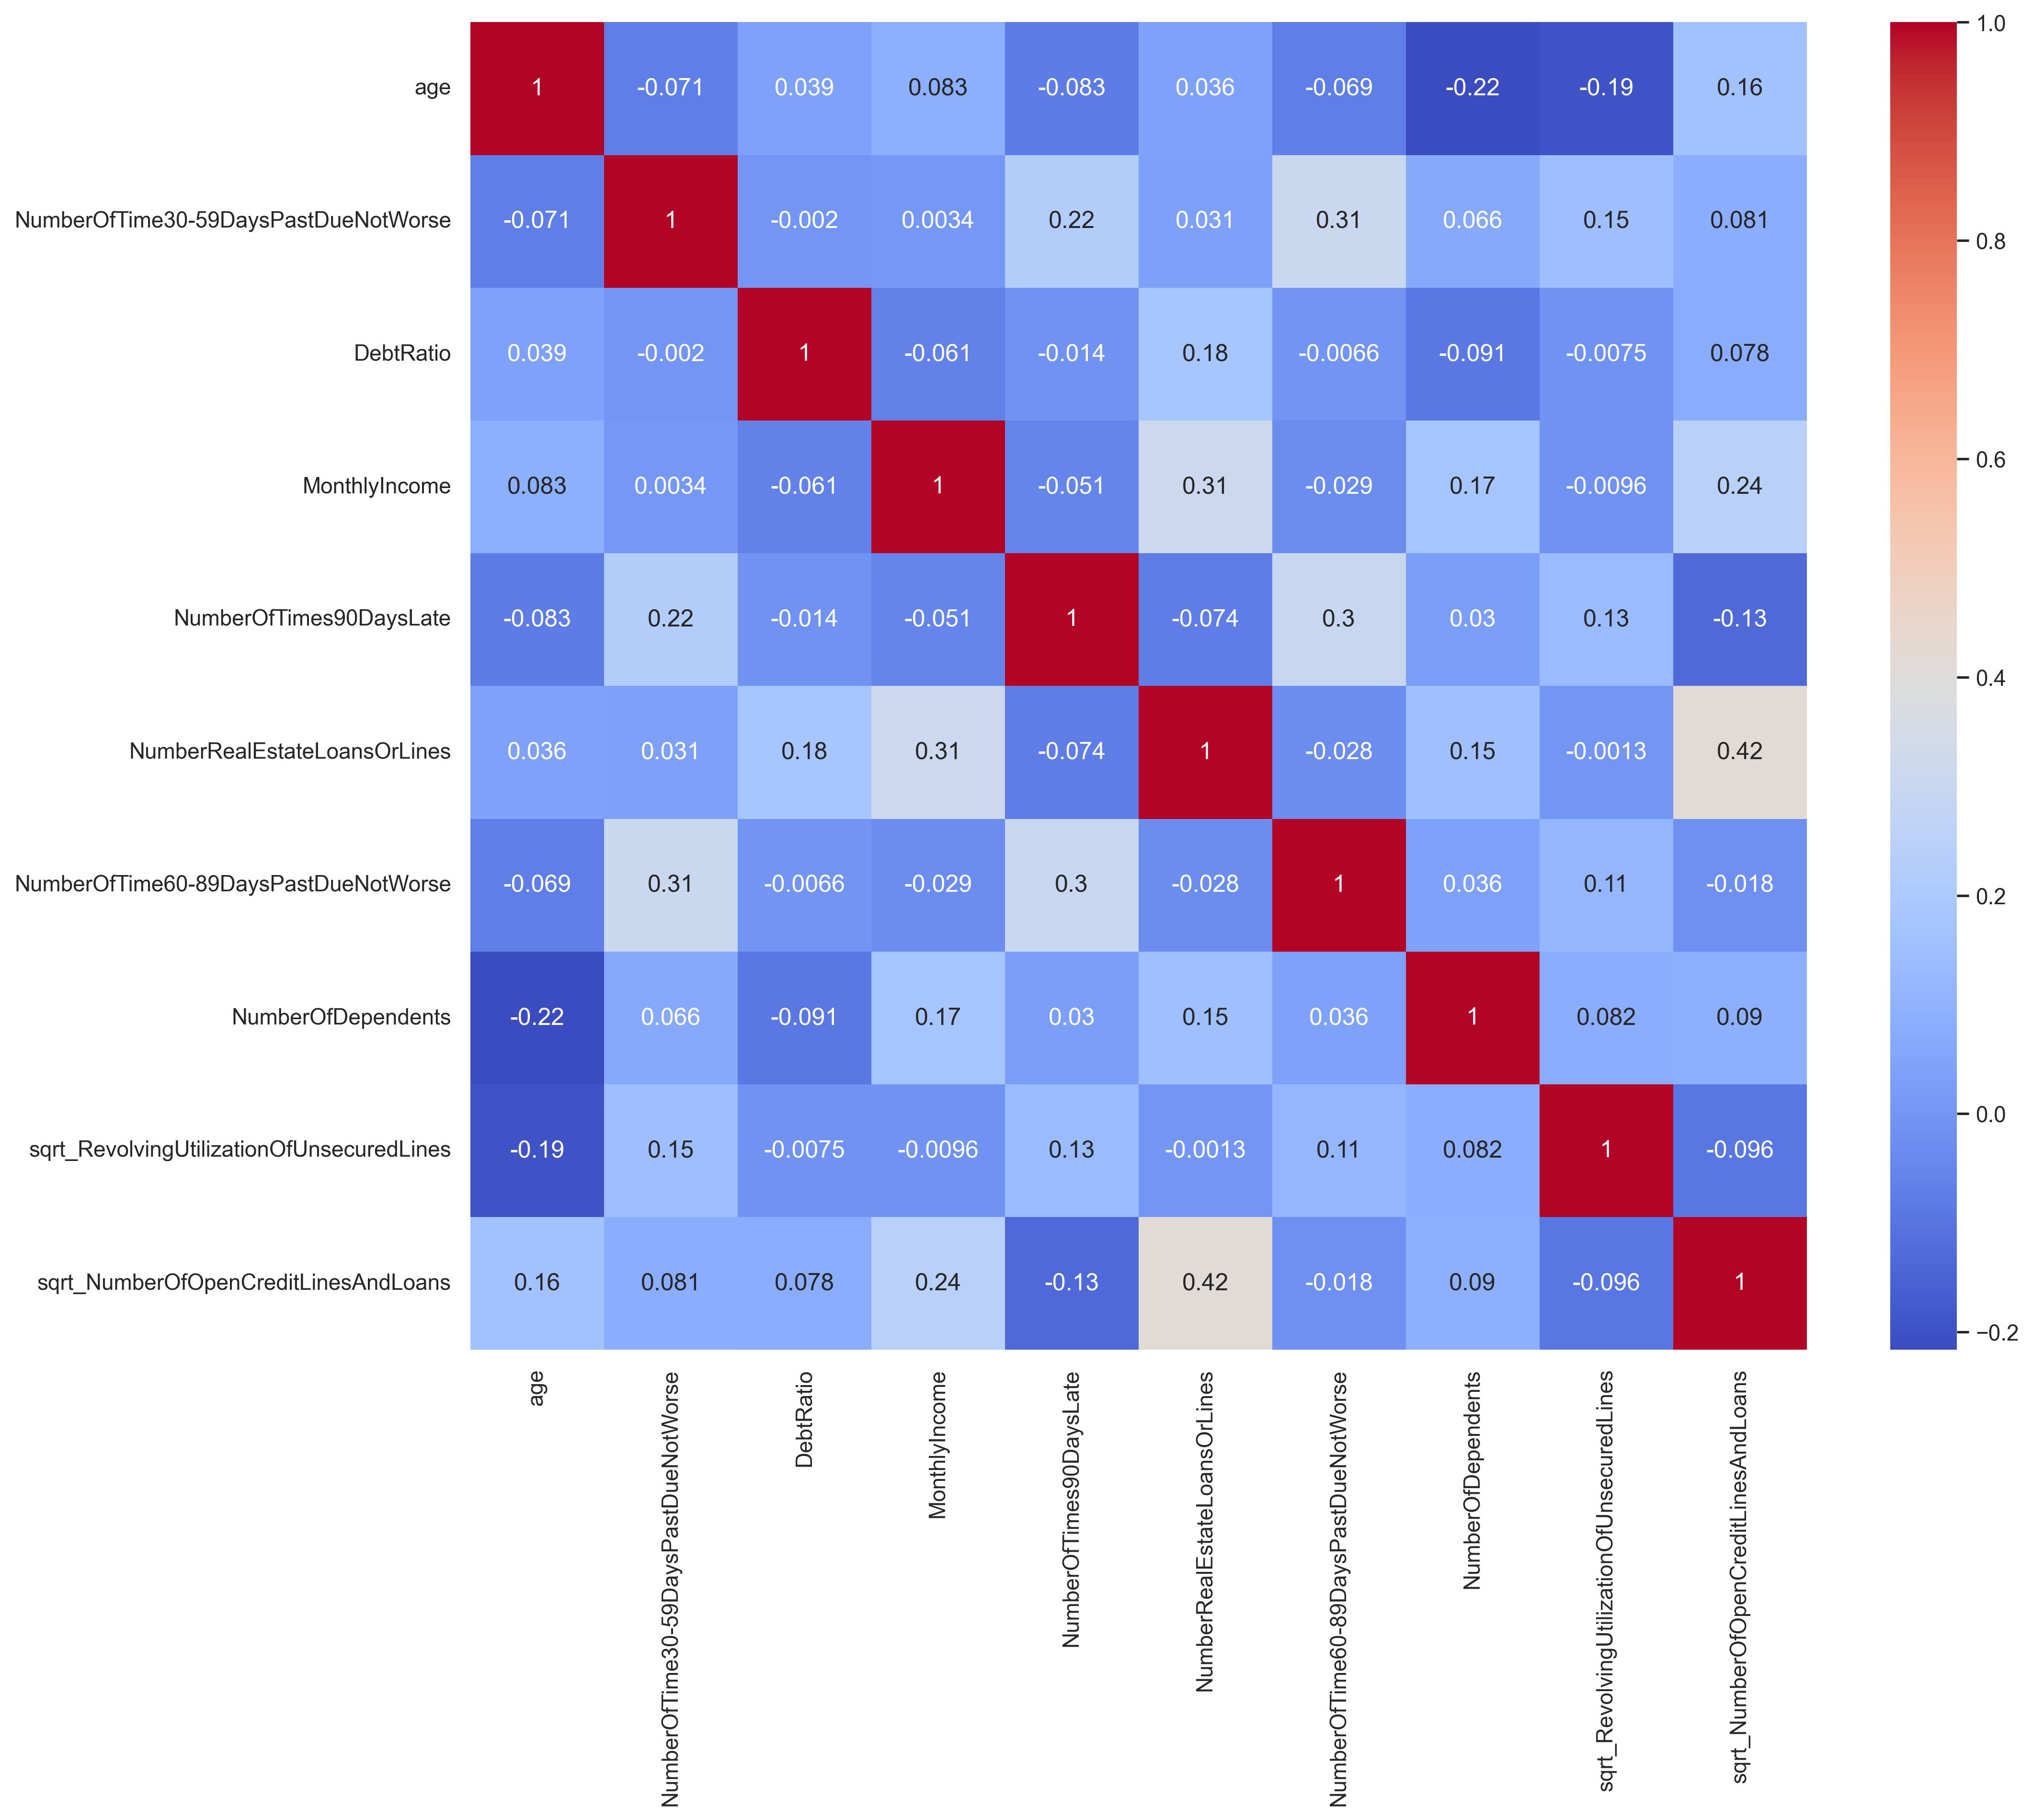

In [102]:
# 高相关过滤法
# 计算相关系数
input_vars = df_train.drop('SeriousDlqin2yrs', axis=1)
corr_matrix = input_vars.corr() # 皮尔森相关系数

# 绘制热图
plt.figure(figsize=(15, 12), dpi=300)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig(fname="输入变量相关系数热图.png")

# 过滤
corr_matrix = df_train_low_var.drop('SeriousDlqin2yrs', axis=1).corr()
corr_threshold = 0.8 # 阈值

columns_to_drop = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > corr_threshold:
            columns_to_drop.append(corr_matrix.columns[j])

columns_to_drop = list(set(columns_to_drop))

df_train = df_train_low_var.drop(columns=columns_to_drop)

print("经过高相关过滤后的数据形状：", df_train.shape)
print('所包含的变量', df_train.columns)

结论：高相关过滤法没有过滤变量，各变量之间相关性不强

### 3.4 特征分箱
使用决策树分箱  
这一部分参考代码：https://zhuanlan.zhihu.com/p/541021916  
其提供等距分箱、等频分箱、聚类分箱、卡方分箱、Best-KS分箱和决策树分箱的python实现

   SeriousDlqin2yrs   age  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  \
0                 1  45.0                                   2.0   0.802982   
1                 0  40.0                                   0.0   0.121876   
2                 0  38.0                                   1.0   0.085113   
3                 0  30.0                                   0.0   0.036050   
4                 0  49.0                                   1.0   0.024926   

   MonthlyIncome  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  \
0         9120.0                      0.0                           1.0   
1         2600.0                      0.0                           0.0   
2         3042.0                      1.0                           0.0   
3         3300.0                      0.0                           0.0   
4         6351.0                      0.0                           1.0   

   NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents  \
0                

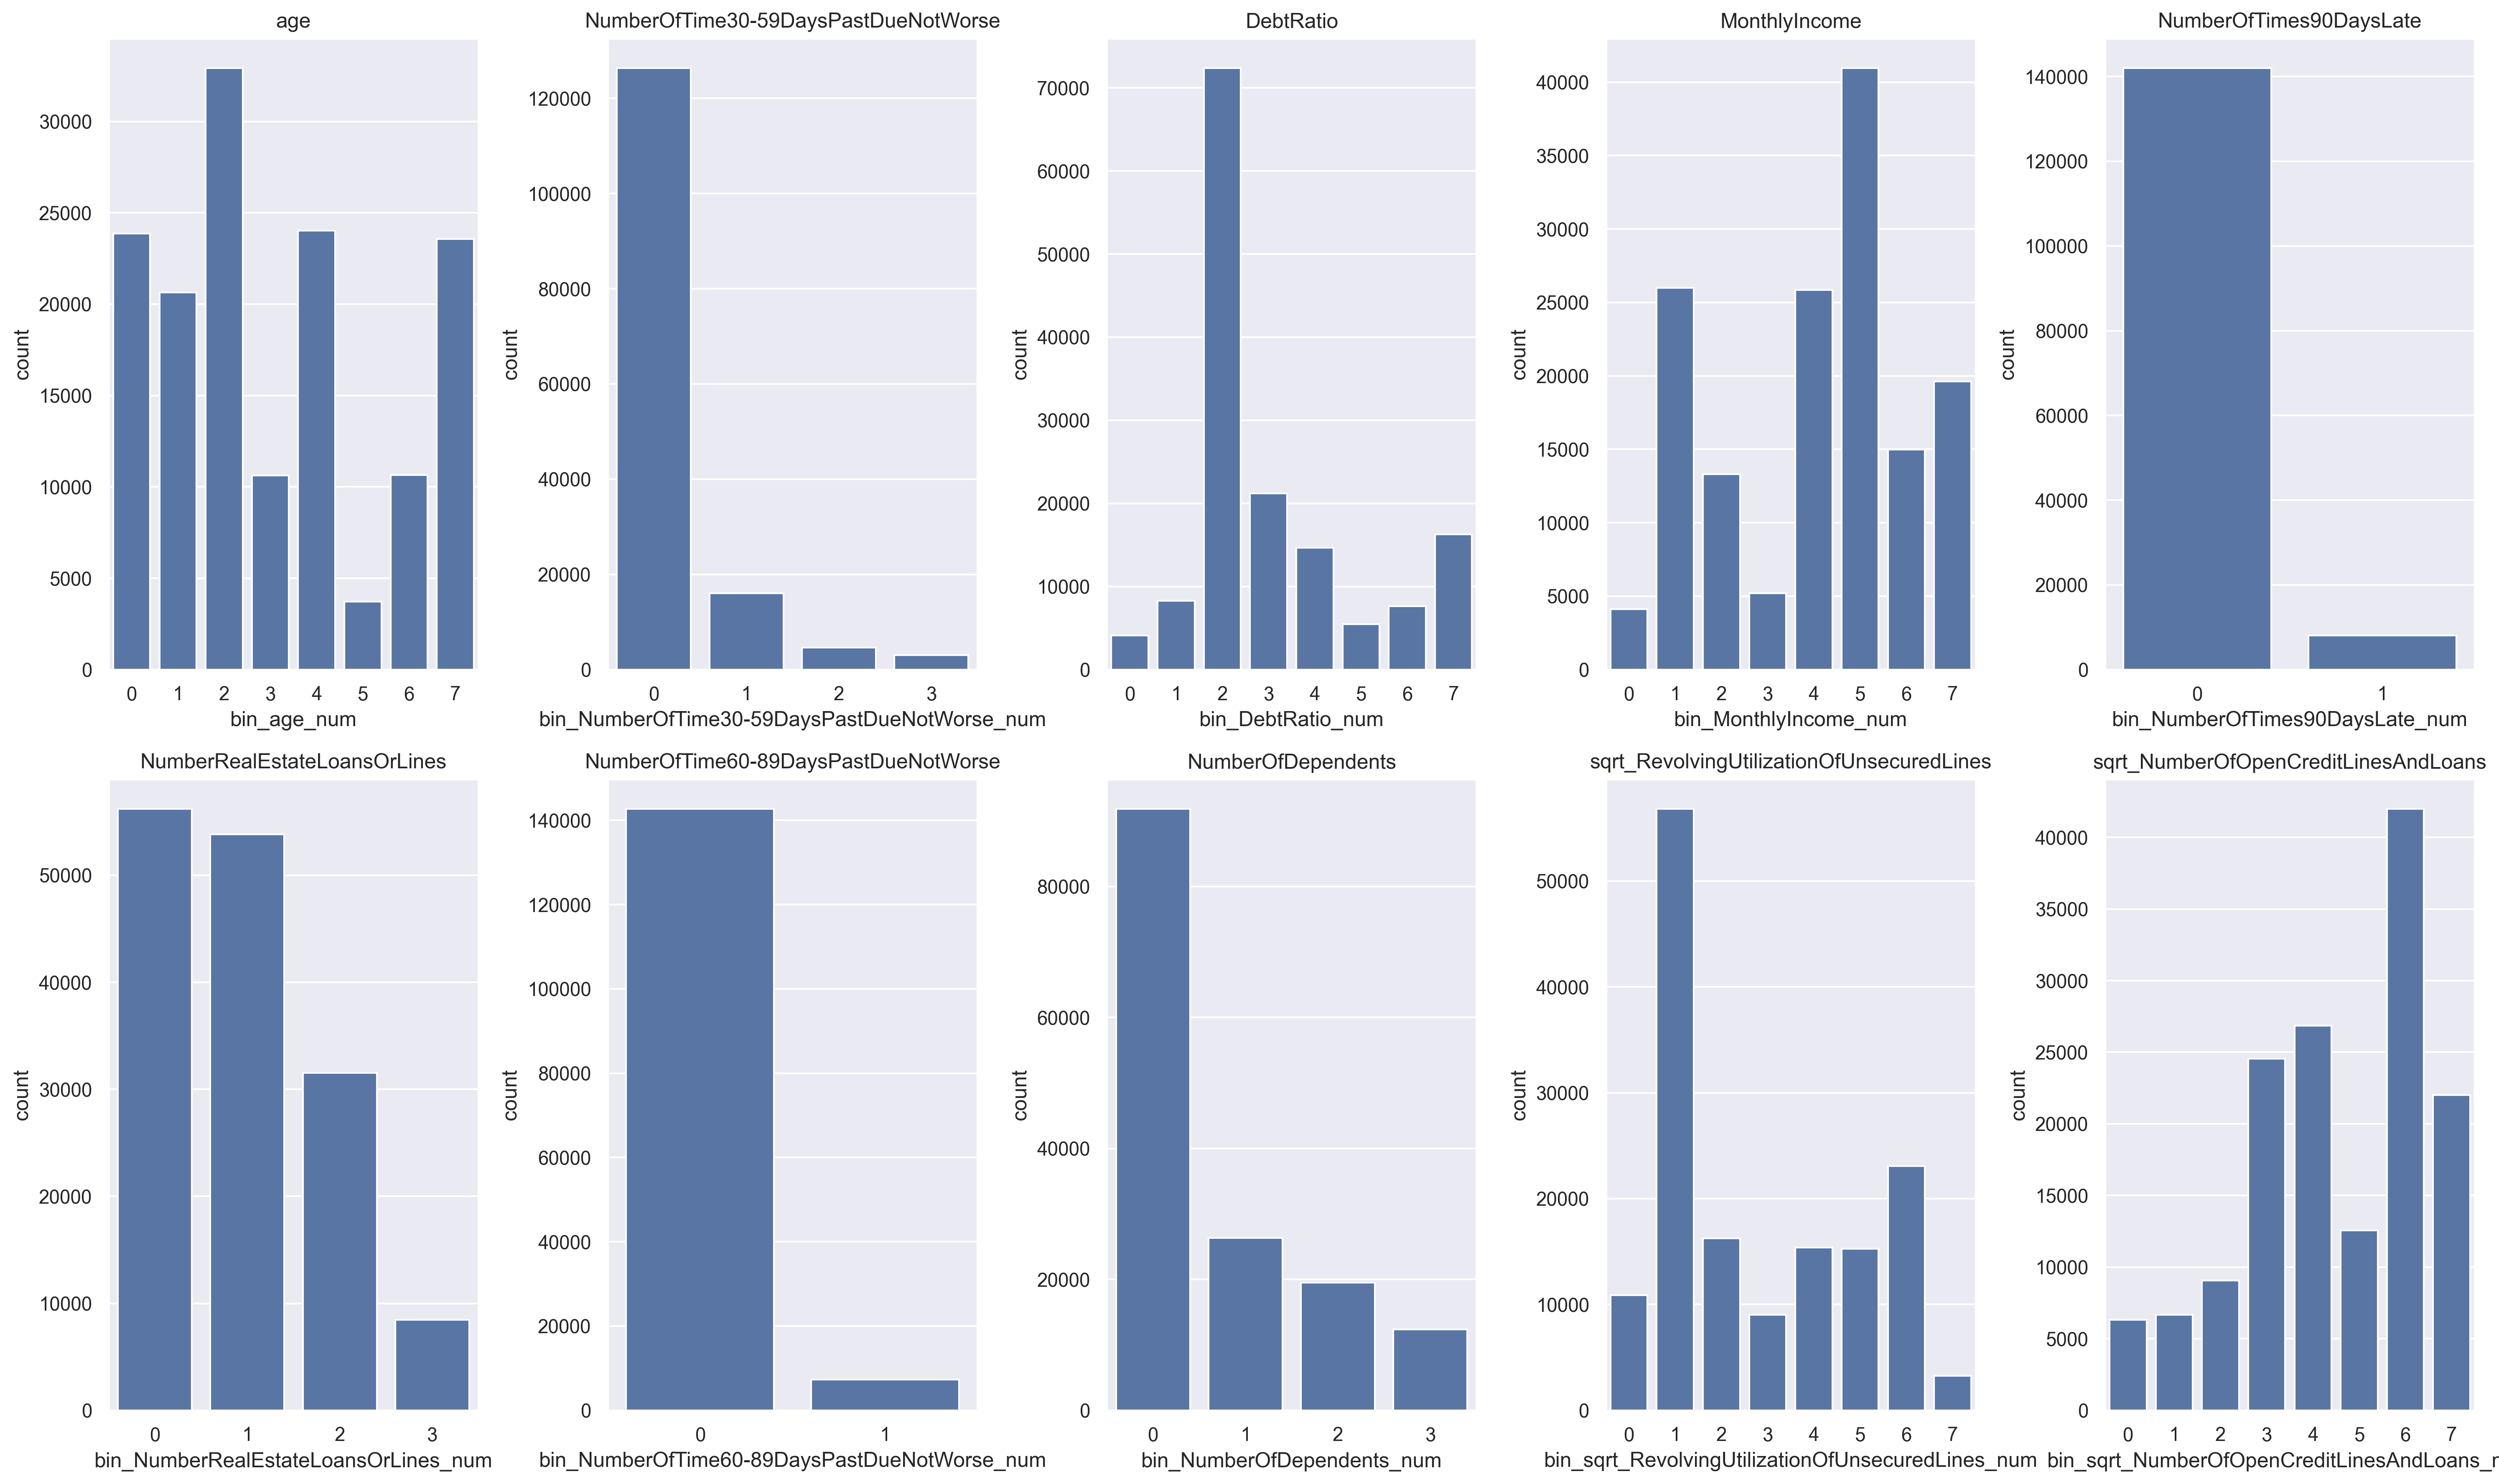

In [103]:
## 特征分箱--决策树分箱
# 这一部分参考：https://zhuanlan.zhihu.com/p/541021916
# 其提供等距分箱、等频分箱、聚类分箱、卡方分箱、Best-KS分箱和决策树分箱的python实现
from sklearn.tree import DecisionTreeClassifier

# 定义决策树分箱函数
train_bin_cutoffs = {}
def tree_bin(feature_column, target_column):
    """
    基于决策树进行特征分箱的函数

    参数:
        feature_column (str): 要进行分箱的特征列名
        target_column (str): 目标列名

    返回:
        list: 分箱的边界点列表
    """
    # 准备数据
    X = np.array(df_train[feature_column]).reshape(-1, 1)
    y = df_train[target_column]

    # 训练决策树模型
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=0.02, max_leaf_nodes=8)
    clf.fit(X, y)

    cut_points = []
    node_count = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    threshold = clf.tree_.threshold

    for i in range(node_count):
        # 该节点是叶子节点，不存在分支
        if children_left[i]!= children_right[i]:
            # 将分支节点加入分箱边界
            cut_points.append(threshold[i])

    cut_points.sort()
    cut_points = [df_train[feature_column].min() - 0.1] + cut_points + [df_train[feature_column].max() + 0.1]

    train_bin_cutoffs[feature_column] = cut_points

    return cut_points

# 要进行分箱的特征列名列表
features_to_bin = ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate',
                   'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',
                   'sqrt_RevolvingUtilizationOfUnsecuredLines', 'sqrt_NumberOfOpenCreditLinesAndLoans']

# 目标列名
target_column = 'SeriousDlqin2yrs'

# 对每个特征进行分箱操作
for feature in features_to_bin:
    cut_points = tree_bin(feature, target_column)
    df_train['bin_' + feature] = pd.cut(df_train[feature], bins=cut_points)

# 查看分箱后的数据集头部信息
print(df_train.head())

# 结果可视化
for feature in features_to_bin:
    df_train['bin_' + feature + '_num'] = df_train['bin_' + feature].cat.codes

sns.set_theme(font_scale=1)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 12), dpi=300)
axes = axes.flatten()

for i, feature in enumerate(features_to_bin):
    ax = axes[i]

    sns.countplot(data=df_train, x='bin_' + feature + '_num', ax=ax)

    ax.set_title(feature)

plt.tight_layout()
plt.savefig(fname="分箱结果.png")

### 3.5 WOE编码

In [104]:
## WOE编码
woe_dicts = {}
def woe_transformation(data, target_column, categorical_cols):
    """
    对指定的分类变量列进行WOE处理

    :param data: 包含数据的DataFrame
    :param target_column: 目标列名，用于区分好坏样本（在本题中为 'SeriousDlqin2yrs'）
    :param categorical_cols: 需要进行WOE处理的分类变量列名列表
    :return: 处理后的DataFrame
    """
    for col in categorical_cols:
        # 对分类变量进行分组并计算好坏样本数
        grouped = data.groupby([col, target_column]).size().reset_index(name='count')

        good_count_dict = {}
        bad_count_dict = {}
        total_count_dict = {}

        for value in data[col].unique():
            good_count = grouped[(grouped[col] == value) & (grouped[target_column] == 0)]['count'].sum()
            bad_count = grouped[(grouped[col] == value) & (grouped[target_column] == 1)]['count'].sum()
            total_count = good_count + bad_count

            good_count_dict[value] = good_count
            bad_count_dict[value] = bad_count
            total_count_dict[value] = total_count

        woe_df = pd.DataFrame({
            'good_count': pd.Series(good_count_dict),
            'bad_count': pd.Series(bad_count_dict),
            'total_count': pd.Series(total_count_dict)
        })

        # 计算每组的WOE值
        woe_df['p_good'] = woe_df['good_count'] / woe_df['good_count'].sum()
        woe_df['p_bad'] = woe_df['bad_count'] / woe_df['bad_count'].sum()
        woe_df['WOE'] = np.log(woe_df['p_good'] / woe_df['p_bad'])

        woe_dict = woe_df['WOE'].to_dict()
        woe_dicts[col] = woe_dict
        data[f'{col}_woe'] = data[col].map(woe_dict)

    return data

target_column = 'SeriousDlqin2yrs'
categorical_cols = ['bin_age_num',
       'bin_NumberOfTime30-59DaysPastDueNotWorse_num', 'bin_DebtRatio_num',
       'bin_MonthlyIncome_num', 'bin_NumberOfTimes90DaysLate_num',
       'bin_NumberRealEstateLoansOrLines_num',
       'bin_NumberOfTime60-89DaysPastDueNotWorse_num',
       'bin_NumberOfDependents_num',
       'bin_sqrt_RevolvingUtilizationOfUnsecuredLines_num',
       'bin_sqrt_NumberOfOpenCreditLinesAndLoans_num']

df_train = woe_transformation(df_train, target_column, categorical_cols)

# 丢弃无关信息并查看WOE值
df_train = df_train.drop(columns=['age', 'NumberOfTime30-59DaysPastDueNotWorse',
       'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'sqrt_RevolvingUtilizationOfUnsecuredLines',
       'sqrt_NumberOfOpenCreditLinesAndLoans', 'bin_age',
       'bin_NumberOfTime30-59DaysPastDueNotWorse', 'bin_DebtRatio',
       'bin_MonthlyIncome', 'bin_NumberOfTimes90DaysLate',
       'bin_NumberRealEstateLoansOrLines',
       'bin_NumberOfTime60-89DaysPastDueNotWorse', 'bin_NumberOfDependents',
       'bin_sqrt_RevolvingUtilizationOfUnsecuredLines',
       'bin_sqrt_NumberOfOpenCreditLinesAndLoans','bin_age_num',
       'bin_NumberOfTime30-59DaysPastDueNotWorse_num', 'bin_DebtRatio_num',
       'bin_MonthlyIncome_num', 'bin_NumberOfTimes90DaysLate_num',
       'bin_NumberRealEstateLoansOrLines_num',
       'bin_NumberOfTime60-89DaysPastDueNotWorse_num',
       'bin_NumberOfDependents_num',
       'bin_sqrt_RevolvingUtilizationOfUnsecuredLines_num',
       'bin_sqrt_NumberOfOpenCreditLinesAndLoans_num'])
print(df_train.head())

   SeriousDlqin2yrs  bin_age_num_woe  \
0                 1        -0.174966   
1                 0        -0.326797   
2                 0        -0.326797   
3                 0        -0.546800   
4                 0        -0.174966   

   bin_NumberOfTime30-59DaysPastDueNotWorse_num_woe  bin_DebtRatio_num_woe  \
0                                         -1.616726              -0.596973   
1                                          0.513792               0.105956   
2                                         -0.903654               0.105956   
3                                          0.513792               0.105956   
4                                         -0.903654               0.105956   

   bin_MonthlyIncome_num_woe  bin_NumberOfTimes90DaysLate_num_woe  \
0                   0.281425                             0.367886   
1                  -0.465313                             0.367886   
2                  -0.465313                            -2.280715   
3             

### 3.6 特征过滤（IV值）
#### 3.6.1 计算IV值

In [110]:
## 特征筛选（IV值）
# 定义IV值
def calculate_iv(data, target_column, feature_column):
    """
    计算指定特征的信息价值（IV）

    参数:
        data (DataFrame): 包含数据的DataFrame
        target_column (str): 目标列名，用于区分好坏样本（在本题中为 'SeriousDlqin2yrs'）
        feature_column (str): 要计算IV值的特征列名

    返回:
        float: 特征的信息价值（IV）值
    """
    grouped = data.groupby([feature_column, target_column]).size().reset_index(name='count')

    good_count_dict = {}
    bad_count_dict = {}
    total_count_dict = {}

    for value in data[feature_column].unique():
        good_count = grouped[(grouped[feature_column] == value) & (grouped[target_column] == 0)]['count'].sum()
        bad_count = grouped[(grouped[feature_column] == value) & (grouped[target_column] == 1)]['count'].sum()
        total_count = good_count + bad_count

        good_count_dict[value] = good_count
        bad_count_dict[value] = bad_count
        total_count_dict[value] = total_count

    iv_df = pd.DataFrame({
        'good_count': pd.Series(good_count_dict),
        'bad_count': pd.Series(bad_count_dict),
        'total_count': pd.Series(total_count_dict)
    })

    iv_df['p_good'] = iv_df['good_count'] / iv_df['good_count'].sum()
    iv_df['p_bad'] = iv_df['bad_count'] / iv_df['bad_count'].sum()
    iv_df['WOE'] = np.log(iv_df['p_good'] / iv_df['p_bad'])

    iv_df['IV'] = (iv_df['p_good'] - iv_df['p_bad']) * iv_df['WOE']

    return iv_df['IV'].sum()

# 计算IV值
woe_features = ['bin_age_num_woe',
                'bin_NumberOfTime30-59DaysPastDueNotWorse_num_woe', 'bin_DebtRatio_num_woe',
                'bin_MonthlyIncome_num_woe', 'bin_NumberOfTimes90DaysLate_num_woe',
                'bin_NumberRealEstateLoansOrLines_num_woe',
                'bin_NumberOfTime60-89DaysPastDueNotWorse_num_woe',
                'bin_NumberOfDependents_num_woe',
                'bin_sqrt_RevolvingUtilizationOfUnsecuredLines_num_woe',
                'bin_sqrt_NumberOfOpenCreditLinesAndLoans_num_woe']

for feature in woe_features:
    iv_value = calculate_iv(df_train, target_column, feature)
    print(f"{feature}的IV值为: {iv_value}")

bin_age_num_woe的IV值为: 0.26231500705983535
bin_NumberOfTime30-59DaysPastDueNotWorse_num_woe的IV值为: 0.7010714502234667
bin_DebtRatio_num_woe的IV值为: 0.09920151550612741
bin_MonthlyIncome_num_woe的IV值为: 0.09393345474459114
bin_NumberOfTimes90DaysLate_num_woe的IV值为: 0.7876473529944085
bin_NumberRealEstateLoansOrLines_num_woe的IV值为: 0.04403554483882638
bin_NumberOfTime60-89DaysPastDueNotWorse_num_woe的IV值为: 0.5287527360229303
bin_NumberOfDependents_num_woe的IV值为: 0.03115179393029955
bin_sqrt_RevolvingUtilizationOfUnsecuredLines_num_woe的IV值为: 1.1616008311235761
bin_sqrt_NumberOfOpenCreditLinesAndLoans_num_woe的IV值为: 0.09961148878136175


#### 3.6.2 过滤
-----IV值---------效果----   
--- <0.02 --- 效果几乎没有-     
--- 0.02至0.1  效果弱------   
--- 0.1至0.3 - 效果中等----    
--- 0.3至0.5 - 效果强------   
--- >0.5 ---- 效果非常强---    
剔除IV小于0.1

In [111]:
# 剔除IV值小于0.1的特征
df_train = df_train.drop(columns=['bin_DebtRatio_num_woe', 'bin_MonthlyIncome_num_woe', 'bin_NumberRealEstateLoansOrLines_num_woe',
                                  'bin_NumberOfDependents_num_woe', 'bin_sqrt_NumberOfOpenCreditLinesAndLoans_num_woe'])


## 四、不平稳数据处理
### 4.1 数据比例情况
可以看到数据存在不平衡的情况

In [112]:
#--------------------------------4、不平稳数据处理--------------------------------#
from imblearn.over_sampling import SMOTE

## 比例计算
label_counts = df_train['SeriousDlqin2yrs'].value_counts()
total_samples = label_counts.sum()
proportion_0 = label_counts[0] / total_samples
proportion_1 = label_counts[1] / total_samples

print(f"SeriousDlqin2yrs中【未逾期】的比例为: {proportion_0:.2f}")
print(f"SeriousDlqin2yrs中【逾期】的比例为: {proportion_1:.2f}")

SeriousDlqin2yrs中【未逾期】的比例为: 0.93
SeriousDlqin2yrs中【逾期】的比例为: 0.07


### 4.2 SMOTE过采样

In [113]:
## 过采样SMOTE
X = df_train.drop('SeriousDlqin2yrs', axis=1)
y = df_train['SeriousDlqin2yrs']

smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X, y)

df_train_resampled = pd.concat([X_resampled, y_resampled], axis=1)

label_counts_resampled = df_train_resampled['SeriousDlqin2yrs'].value_counts()
total_samples_resampled = label_counts_resampled.sum()
proportion_0_resampled = label_counts_resampled[0] / total_samples_resampled
proportion_1_resampled = label_counts_resampled[1] / total_samples_resampled

print(f"过采样后SeriousDlqin2yrs中【未逾期】的比例为: {proportion_0_resampled:.2f}")
print(f"过采样后SeriousDlqin2yrs中【逾期】的比例为: {proportion_1_resampled:.2f}")

print("过采样前数据形状:", df_train.shape)
print("过采样后数据形状:", df_train_resampled.shape)
print('所包含的变量', df_train_resampled.columns)
print(df_train_resampled.head())

过采样后SeriousDlqin2yrs中【未逾期】的比例为: 0.50
过采样后SeriousDlqin2yrs中【逾期】的比例为: 0.50
过采样前数据形状: (150000, 6)
过采样后数据形状: (279948, 6)
所包含的变量 Index(['bin_age_num_woe', 'bin_NumberOfTime30-59DaysPastDueNotWorse_num_woe',
       'bin_NumberOfTimes90DaysLate_num_woe',
       'bin_NumberOfTime60-89DaysPastDueNotWorse_num_woe',
       'bin_sqrt_RevolvingUtilizationOfUnsecuredLines_num_woe',
       'SeriousDlqin2yrs'],
      dtype='object')
   bin_age_num_woe  bin_NumberOfTime30-59DaysPastDueNotWorse_num_woe  \
0        -0.174966                                         -1.616726   
1        -0.326797                                          0.513792   
2        -0.326797                                         -0.903654   
3        -0.546800                                          0.513792   
4        -0.174966                                         -0.903654   

   bin_NumberOfTimes90DaysLate_num_woe  \
0                             0.367886   
1                             0.367886   
2                   

## 五、模型评估与选择
共考虑了以下四种模型：Logistic回归、决策树、SVM分类和KNN分类模型
### 5.1 划分数据
将数据分为训练集70%和测试集30%

In [114]:
#--------------------------------5、模型选择与评估--------------------------------#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

## 划分数据
X = df_train_resampled.drop('SeriousDlqin2yrs', axis=1)
y = df_train_resampled['SeriousDlqin2yrs']

# 训练集70% 测试集30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("训练集特征形状:", X_train.shape)
print("训练集标签形状:", y_train.shape)
print("测试集特征形状:", X_test.shape)
print("测试集标签形状:", y_test.shape)

训练集特征形状: (195963, 5)
训练集标签形状: (195963,)
测试集特征形状: (83985, 5)
测试集标签形状: (83985,)


### 5.2 Logistic回归
#### 5.2.1 模型调参与拟合
考虑penalty=为l2或没有的情况，最终选择【l2】    
考虑正则化系数C=从0.0001到10，最终选择【0.1】  
考虑solver=为'lbfgs'、'liblinear'两种情况，最终选择【lbfgs】  
选择标准为F1得分和Lift曲线  
具体选择流程不做赘述

In [25]:
## logistic回归离散选择
logistic_model = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs')  # 调参后相对好的组合
logistic_model.fit(X_train, y_train)

y_logistic_pred = logistic_model.predict(X_test)

#### 5.2.2 模型评估
##### 准确率Accuracy
正确分类的样本数占总样本数的比例
$$
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
$$
##### 精确率precision
被分类器预测为正类的样本中，真正为正类的样本所占的比例
$$Precision = \frac{TP}{TP+FP}$$
##### 召回率recall
真正为正类的样本中，被分类器预测为正类的样本所占的比例
$$Recall = \frac{TP}{TP+FN}$$
##### F1值f1score
综合考虑精确率和召回率，精确率和召回率的调和平均数
$$F1 = \frac{2 Precision Recall}{Precision+Recall}$$

In [26]:
# 准确率Accuracy--正确分类的样本数占总样本数的比例
accuracy = accuracy_score(y_test, y_logistic_pred)
print("逻辑回归模型预测准确率:", accuracy)

# 精确率precision--被分类器预测为正类的样本中，真正为正类的样本所占的比例
# 召回率recall--真正为正类的样本中，被分类器预测为正类的样本所占的比例
# F1值f1score--综合考虑精确率和召回率，精确率和召回率的调和平均数
print(classification_report(y_test, y_logistic_pred))


逻辑回归模型预测准确率: 0.7743763767339406
              precision    recall  f1-score   support

           0       0.75      0.82      0.78     41838
           1       0.80      0.73      0.76     42147

    accuracy                           0.77     83985
   macro avg       0.78      0.77      0.77     83985
weighted avg       0.78      0.77      0.77     83985



#### 5.2.3 混淆矩阵

[[34342  7496]
 [11453 30694]]


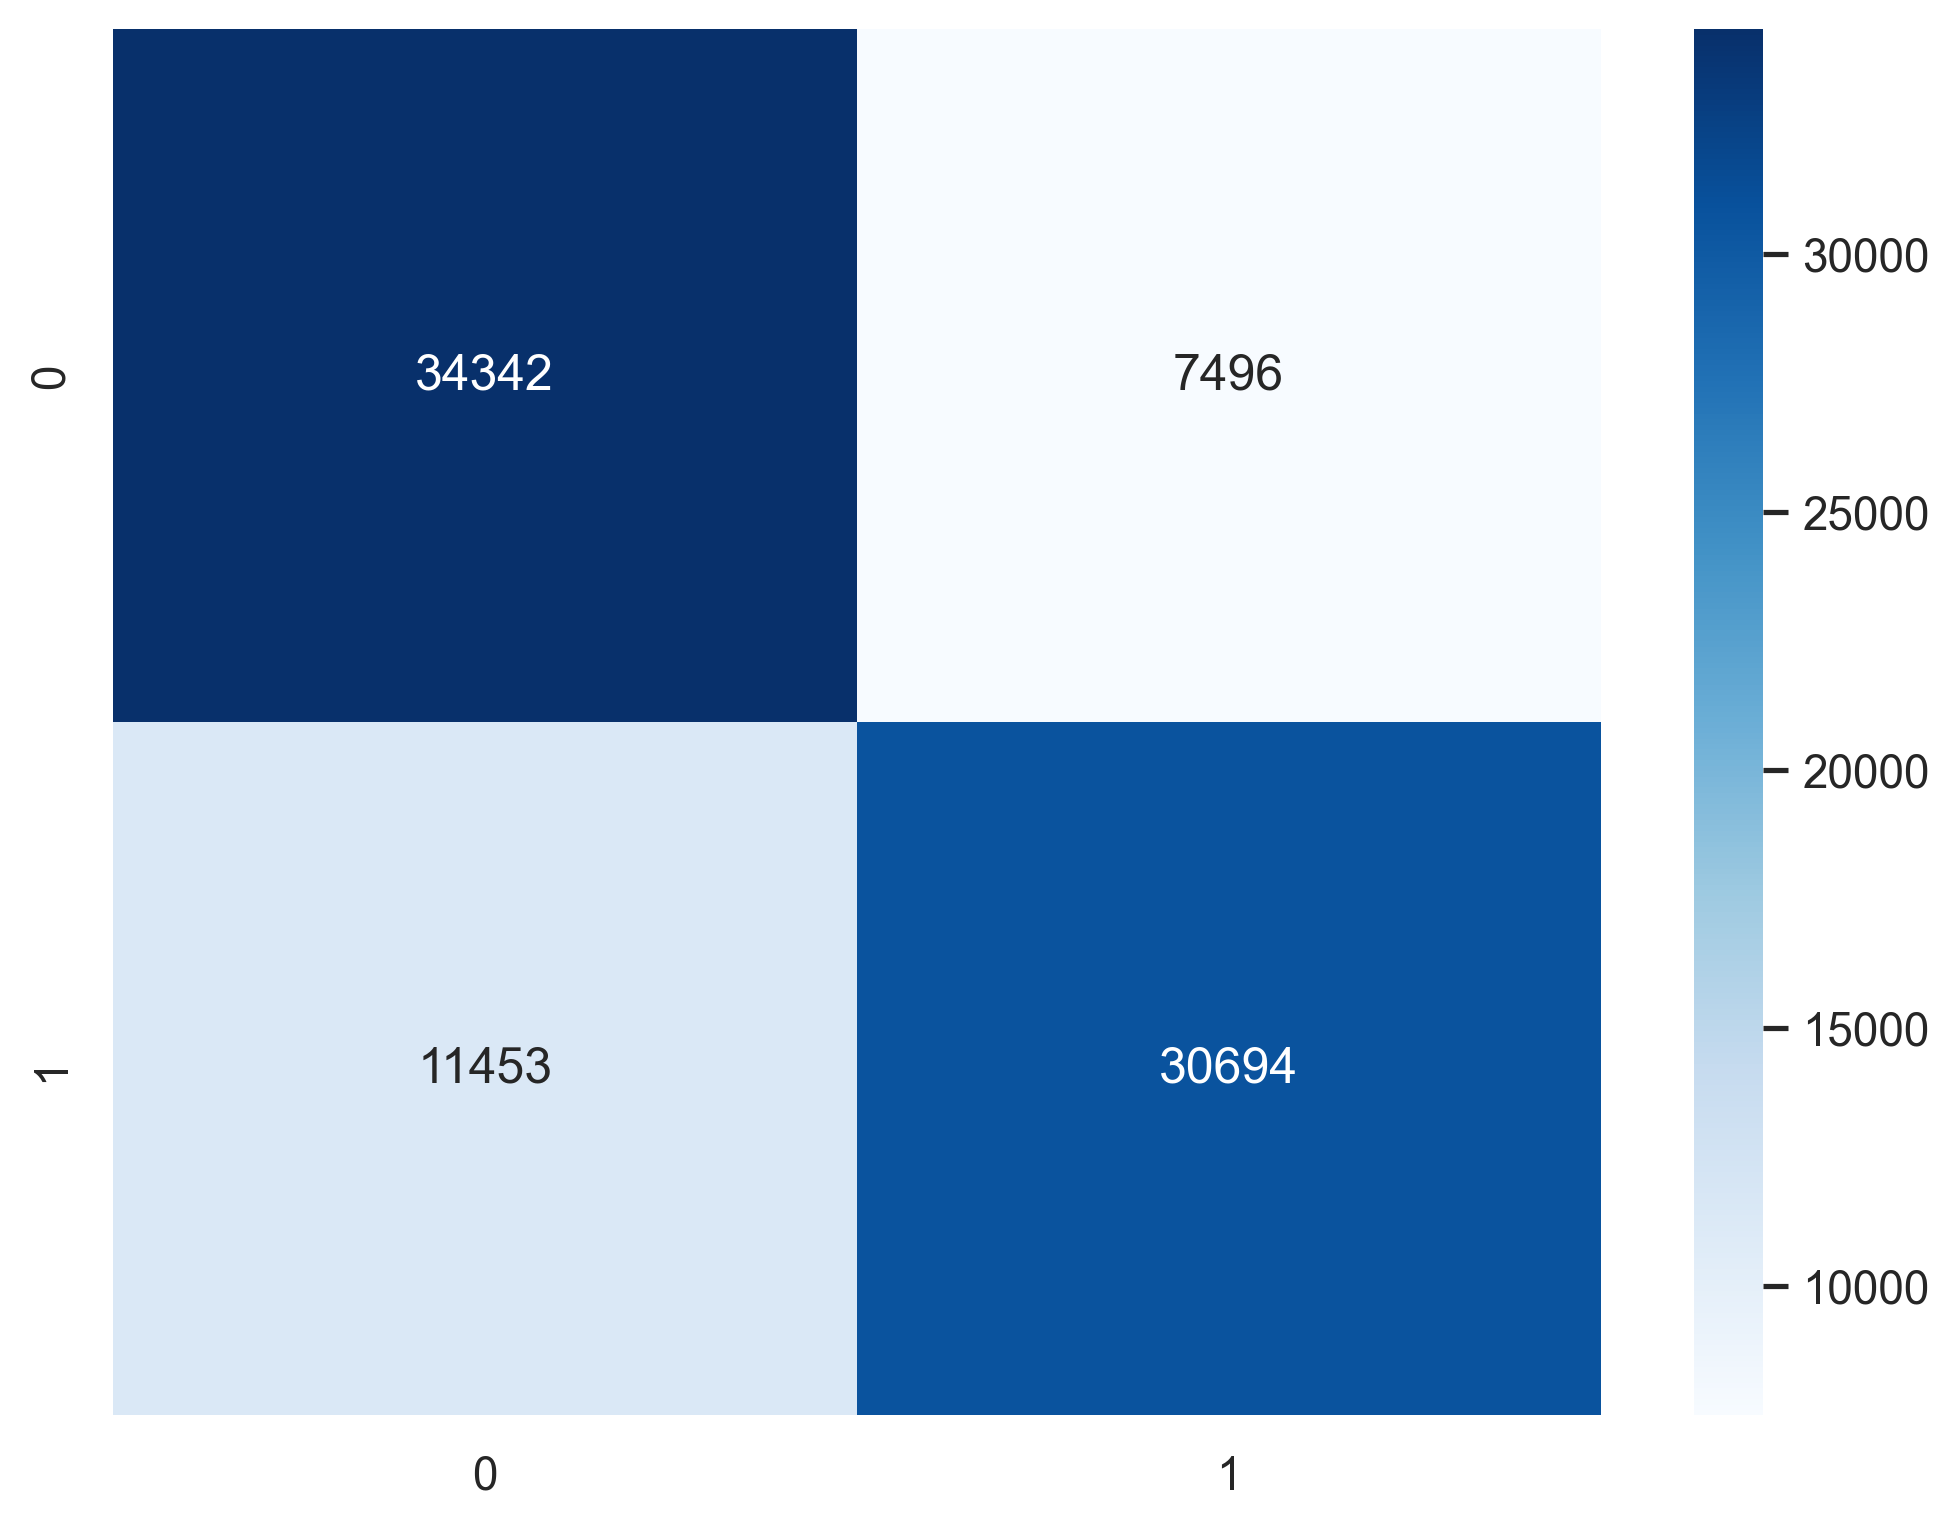

In [27]:
## 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_logistic_pred)
print(conf_matrix)

# 使用seaborn绘制混淆矩阵热图
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.savefig(fname="Logistic回归混淆矩阵.png")

#### 5.2.4 ROC曲线&AUC值

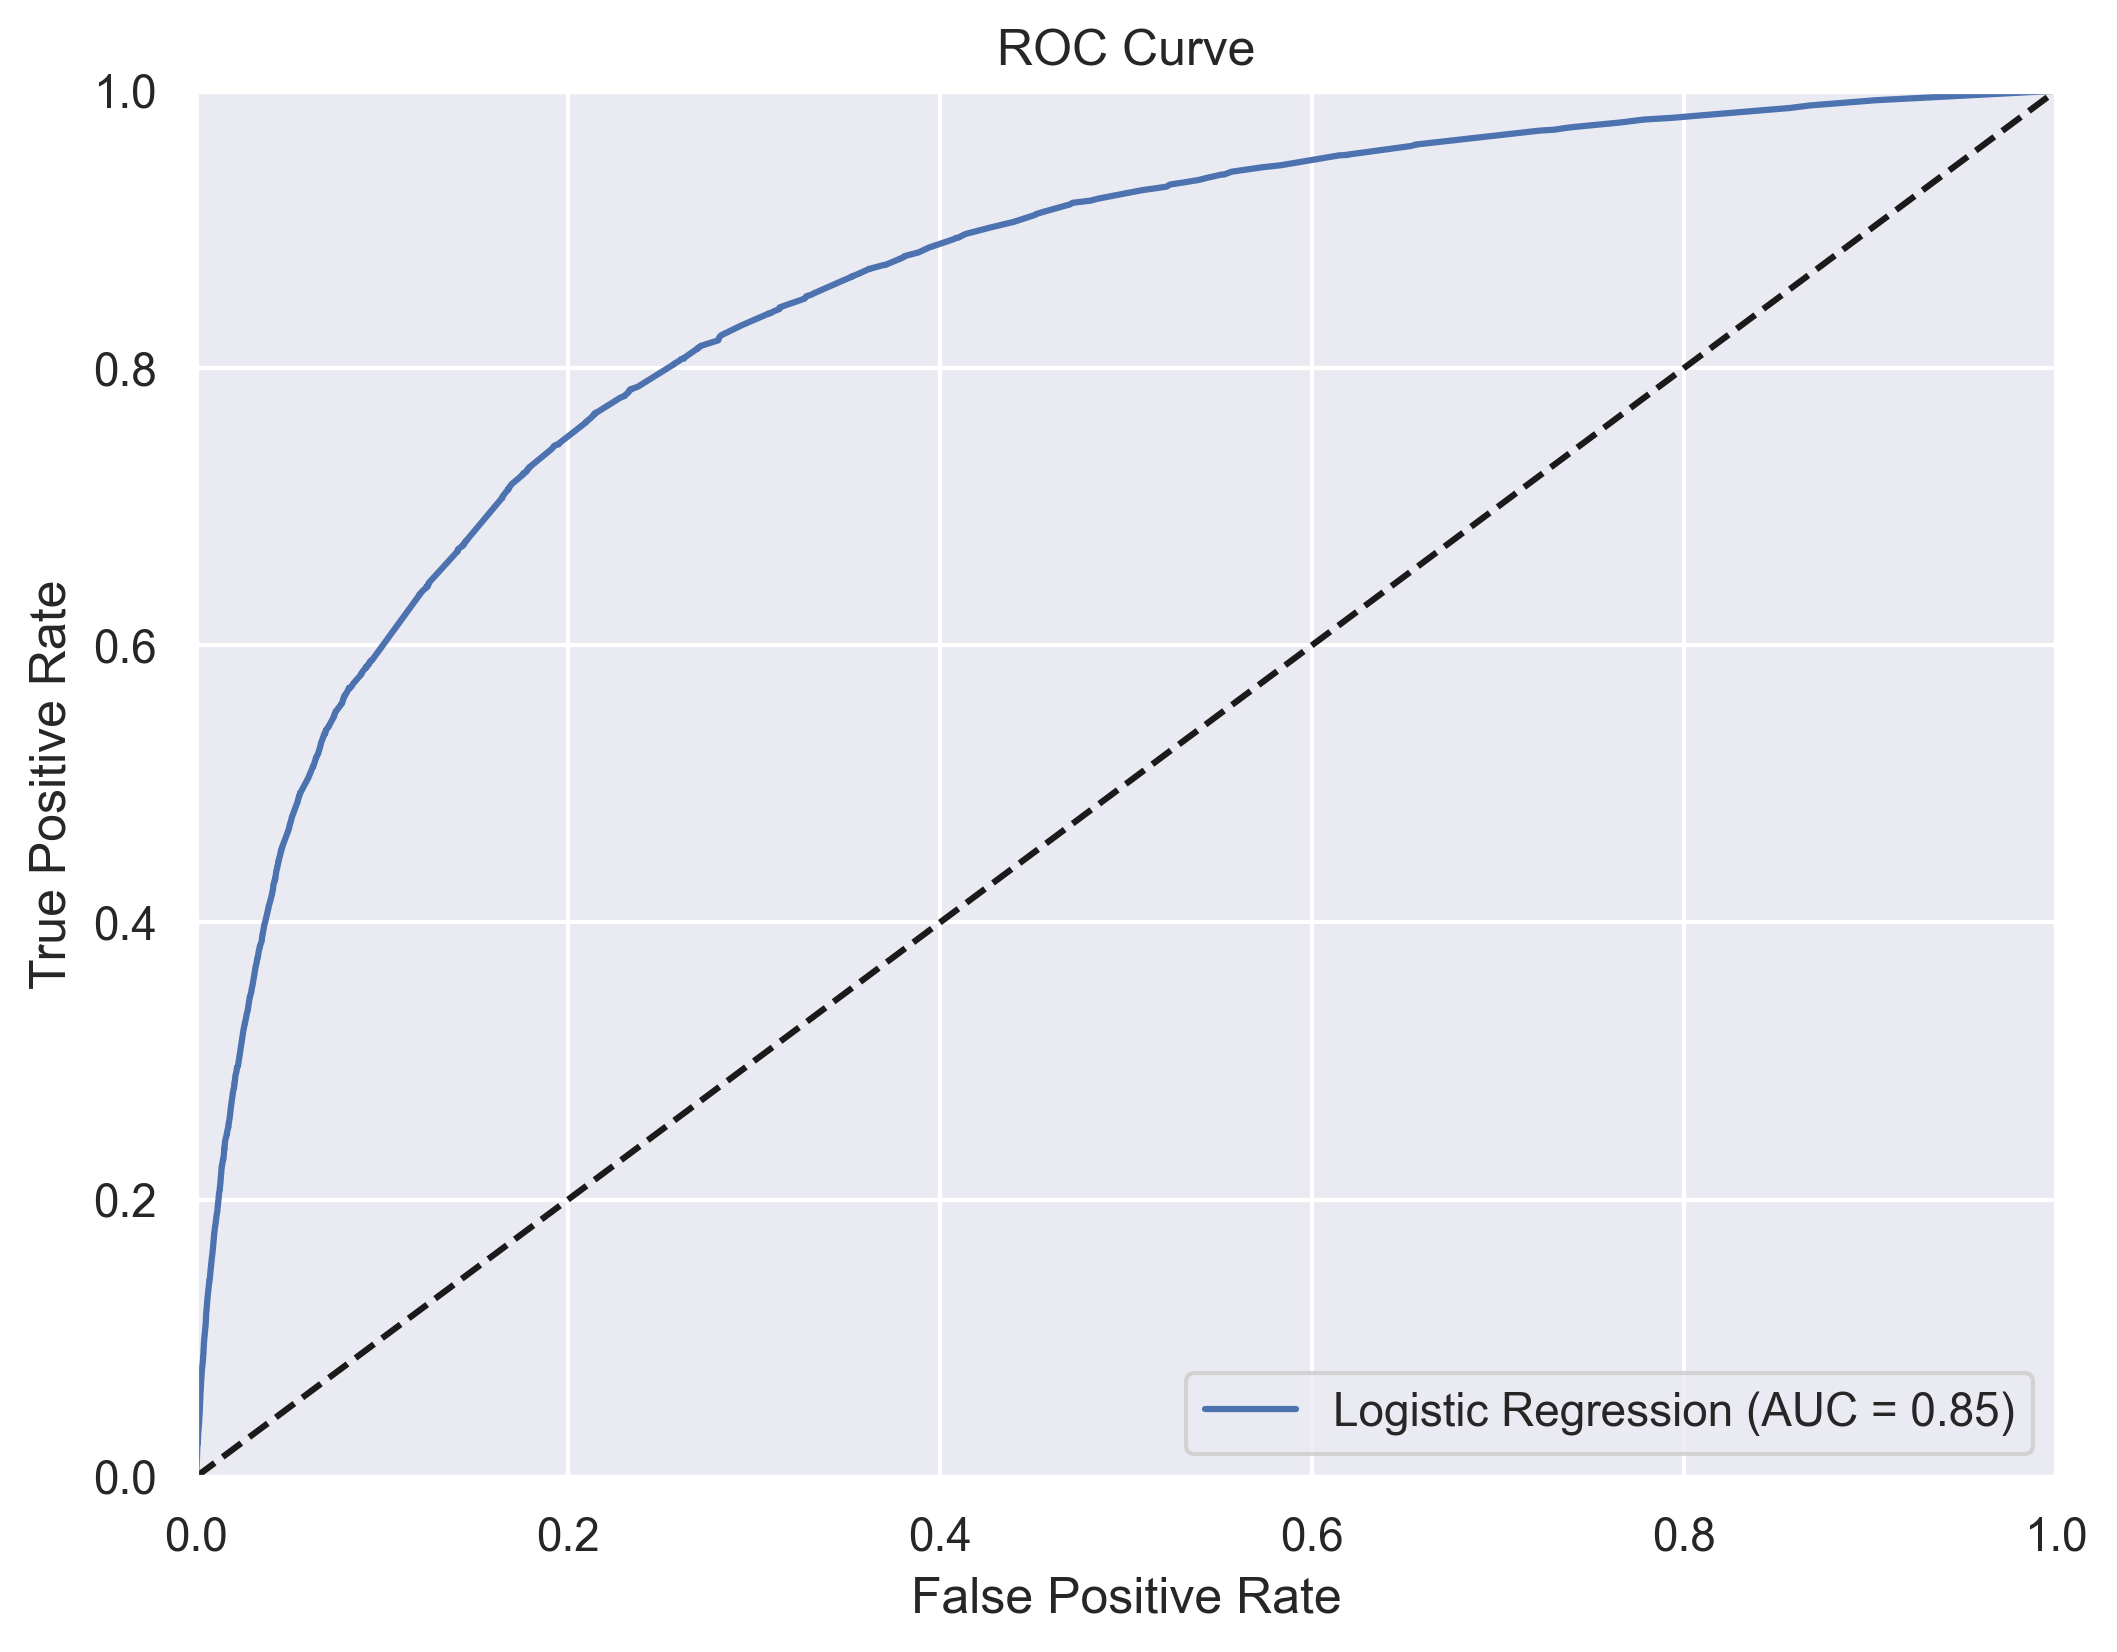

In [28]:
## ROC曲线&AUC值
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
auc_logistic = auc(fpr_logistic, tpr_logistic)

plt.figure(figsize=(8, 6), dpi=300)
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (AUC = {:.2f})'.format(auc_logistic))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig(fname="Logistic回归ROC曲线.png")

### 5.3 决策树
#### 5.3.1 模型调参与拟合
criterion考虑'gini'、'entropy'、'log_loss'，最终选择【'gini'】  
拆分内部节点min_samples_split考虑从100到1000，最总选择【200】   
选择标准为F1得分和Lift曲线  
具体选择流程不做赘述

In [29]:
## 决策树
DecisionTree_model = DecisionTreeClassifier(criterion='gini', min_samples_split=200)
DecisionTree_model.fit(X_train, y_train)

y_DecisionTree_pred = DecisionTree_model.predict(X_test)

#### 5.3.2 模型评估
##### 准确率Accuracy
正确分类的样本数占总样本数的比例
$$
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
$$
##### 精确率precision
被分类器预测为正类的样本中，真正为正类的样本所占的比例
$$Precision = \frac{TP}{TP+FP}$$
##### 召回率recall
真正为正类的样本中，被分类器预测为正类的样本所占的比例
$$Recall = \frac{TP}{TP+FN}$$
##### F1值f1score
综合考虑精确率和召回率，精确率和召回率的调和平均数
$$F1 = \frac{2 Precision Recall}{Precision+Recall}$$

In [30]:
# 准确率Accuracy--正确分类的样本数占总样本数的比例
accuracy = accuracy_score(y_test, y_DecisionTree_pred)
print("决策树模型预测准确率:", accuracy)

# 精确率precision--被分类器预测为正类的样本中，真正为正类的样本所占的比例
# 召回率recall--真正为正类的样本中，被分类器预测为正类的样本所占的比例
# F1值f1score--综合考虑精确率和召回率，精确率和召回率的调和平均数
print(classification_report(y_test, y_DecisionTree_pred))

决策树模型预测准确率: 0.7814609751741383
              precision    recall  f1-score   support

           0       0.78      0.78      0.78     41838
           1       0.78      0.78      0.78     42147

    accuracy                           0.78     83985
   macro avg       0.78      0.78      0.78     83985
weighted avg       0.78      0.78      0.78     83985



#### 5.3.3 混淆矩阵

[[32732  9106]
 [ 9248 32899]]


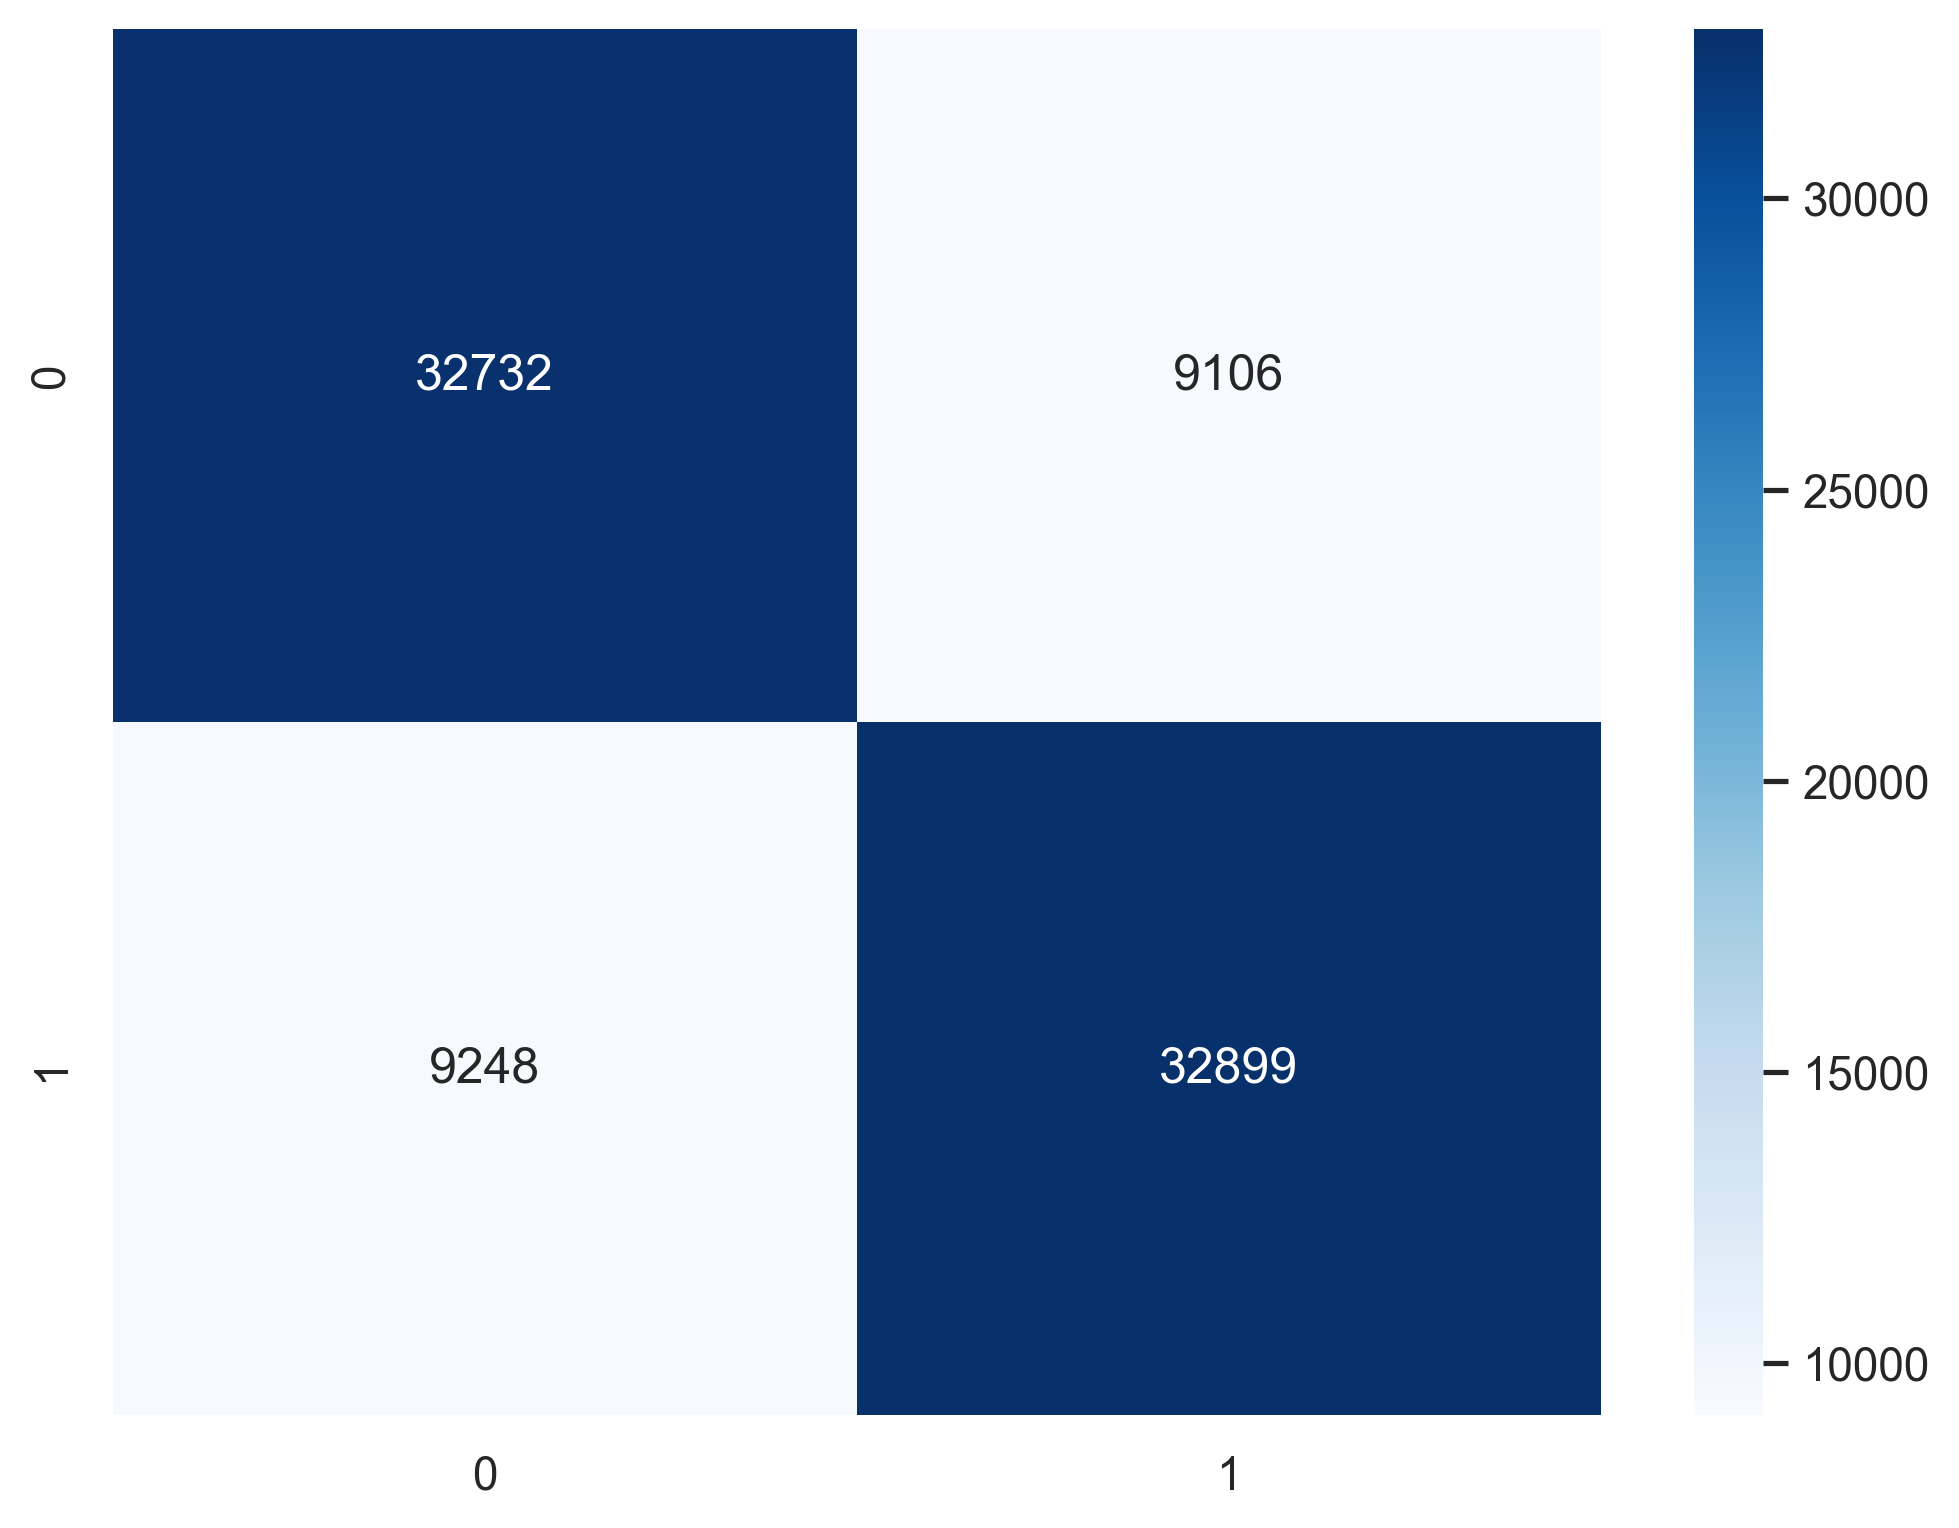

In [31]:
## 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_DecisionTree_pred)
print(conf_matrix)

# 使用seaborn绘制混淆矩阵热图
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.savefig(fname="DecisionTree混淆矩阵.png")

#### 5.3.4 ROC曲线&AUC值
绘制决策树与Logistic回归的ROC曲线&AUC值对比

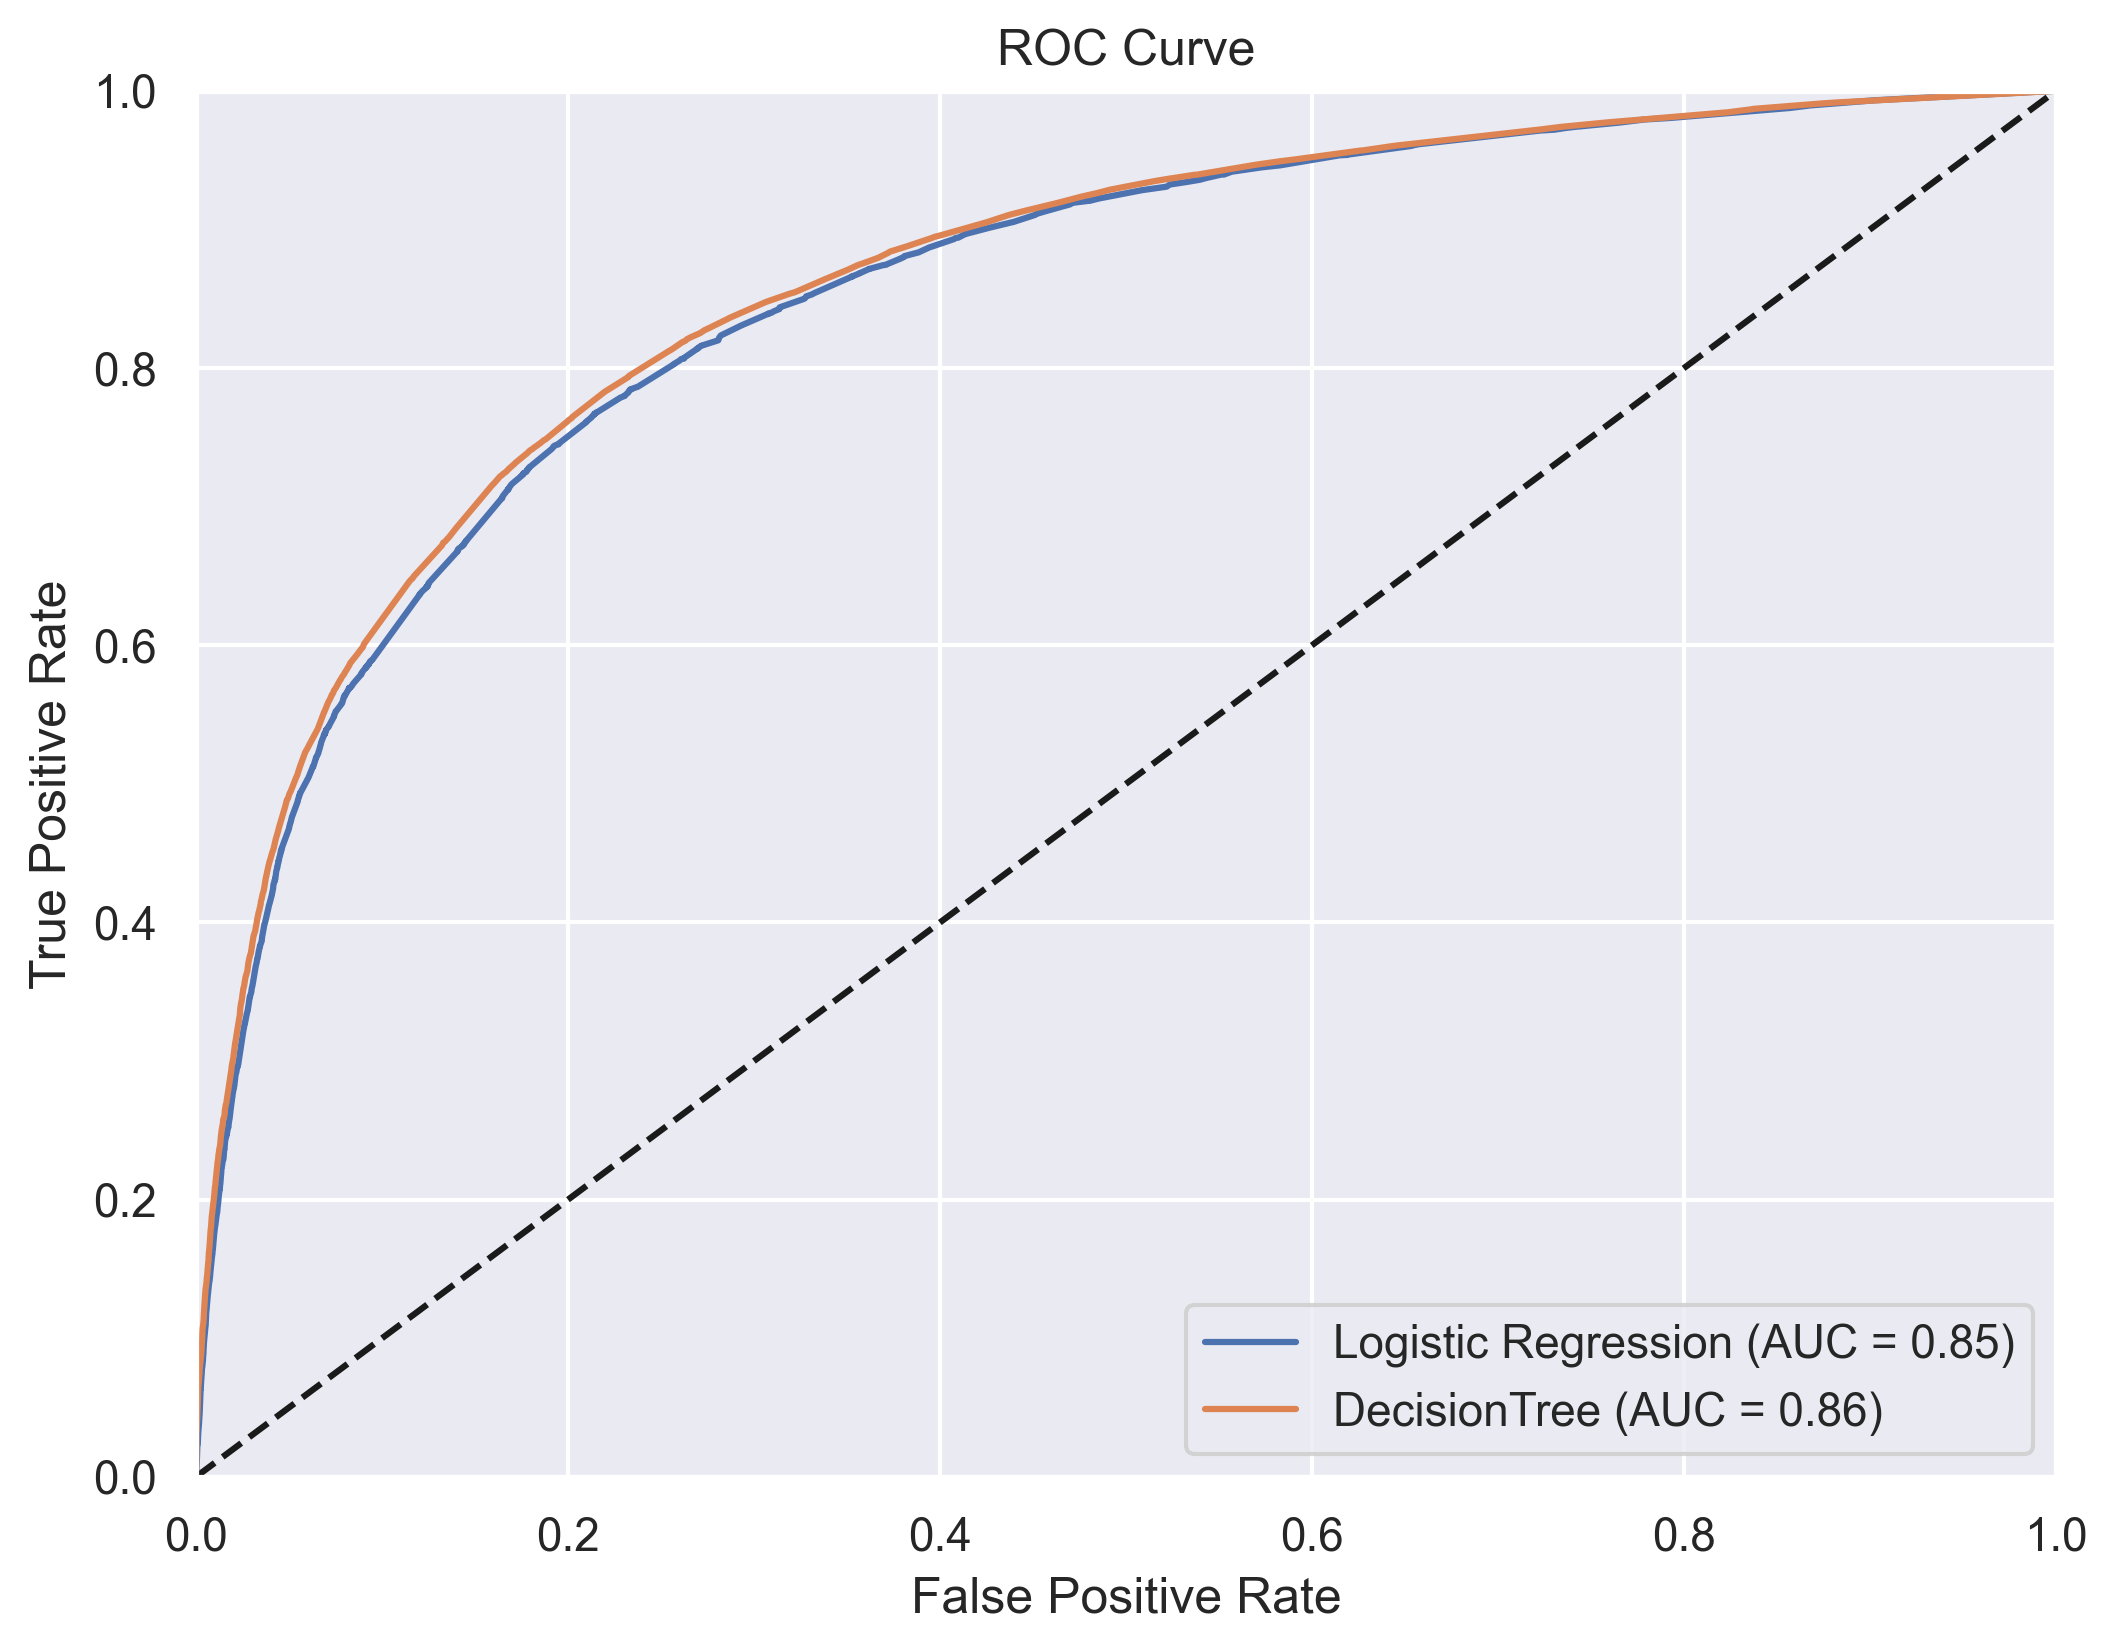

In [32]:
##  ROC曲线&AUC值
fpr_DecisionTree, tpr_DecisionTree, thresholds_DecisionTree = roc_curve(y_test, DecisionTree_model.predict_proba(X_test)[:, 1])
auc_DecisionTree = auc(fpr_DecisionTree, tpr_DecisionTree)

plt.figure(figsize=(8, 6), dpi=300)
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (AUC = {:.2f})'.format(auc_logistic))
plt.plot(fpr_DecisionTree, tpr_DecisionTree, label='DecisionTree (AUC = {:.2f})'.format(auc_DecisionTree))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig(fname="DecisionTree回归ROC曲线.png")

### 5.4 SVM分类
#### 5.4.1 模型调参与拟合
核函数根据数据性质选择kernel=【'rbf'】    
gamma考虑从1到100，最终选择【10】  
正则化系数C考虑0.01到10，最终选择【1】  
选择标准为F1得分和Lift曲线  
具体选择流程不做赘述

In [36]:
## SVM分类
# SVM计算时间需要二十多分钟
import time
start_time = time.time()

SVM_model = svm.SVC(kernel='rbf' ,gamma=10, C=1, probability=True)
SVM_model.fit(X_train, y_train)

y_SVM_pred = SVM_model.predict(X_test)

end_time = time.time()
print(f"SVM运行耗时: {end_time - start_time} 秒")

SVM运行耗时: 1843.7592458724976 秒


#### 5.4.2 模型评估
##### 准确率Accuracy
正确分类的样本数占总样本数的比例
$$
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
$$
##### 精确率precision
被分类器预测为正类的样本中，真正为正类的样本所占的比例
$$Precision = \frac{TP}{TP+FP}$$
##### 召回率recall
真正为正类的样本中，被分类器预测为正类的样本所占的比例
$$Recall = \frac{TP}{TP+FN}$$
##### F1值f1score
综合考虑精确率和召回率，精确率和召回率的调和平均数
$$F1 = \frac{2 Precision Recall}{Precision+Recall}$$

In [37]:
# 准确率Accuracy--正确分类的样本数占总样本数的比例
accuracy = accuracy_score(y_test, y_SVM_pred)
print("SVM分类模型预测准确率:", accuracy)

# 精确率precision--被分类器预测为正类的样本中，真正为正类的样本所占的比例
# 召回率recall--真正为正类的样本中，被分类器预测为正类的样本所占的比例
# F1值f1score--综合考虑精确率和召回率，精确率和召回率的调和平均数
print(classification_report(y_test, y_SVM_pred))

SVM分类模型预测准确率: 0.7811513960826338
              precision    recall  f1-score   support

           0       0.78      0.78      0.78     41838
           1       0.78      0.78      0.78     42147

    accuracy                           0.78     83985
   macro avg       0.78      0.78      0.78     83985
weighted avg       0.78      0.78      0.78     83985



#### 5.4.3 混淆矩阵

[[32687  9151]
 [ 9229 32918]]


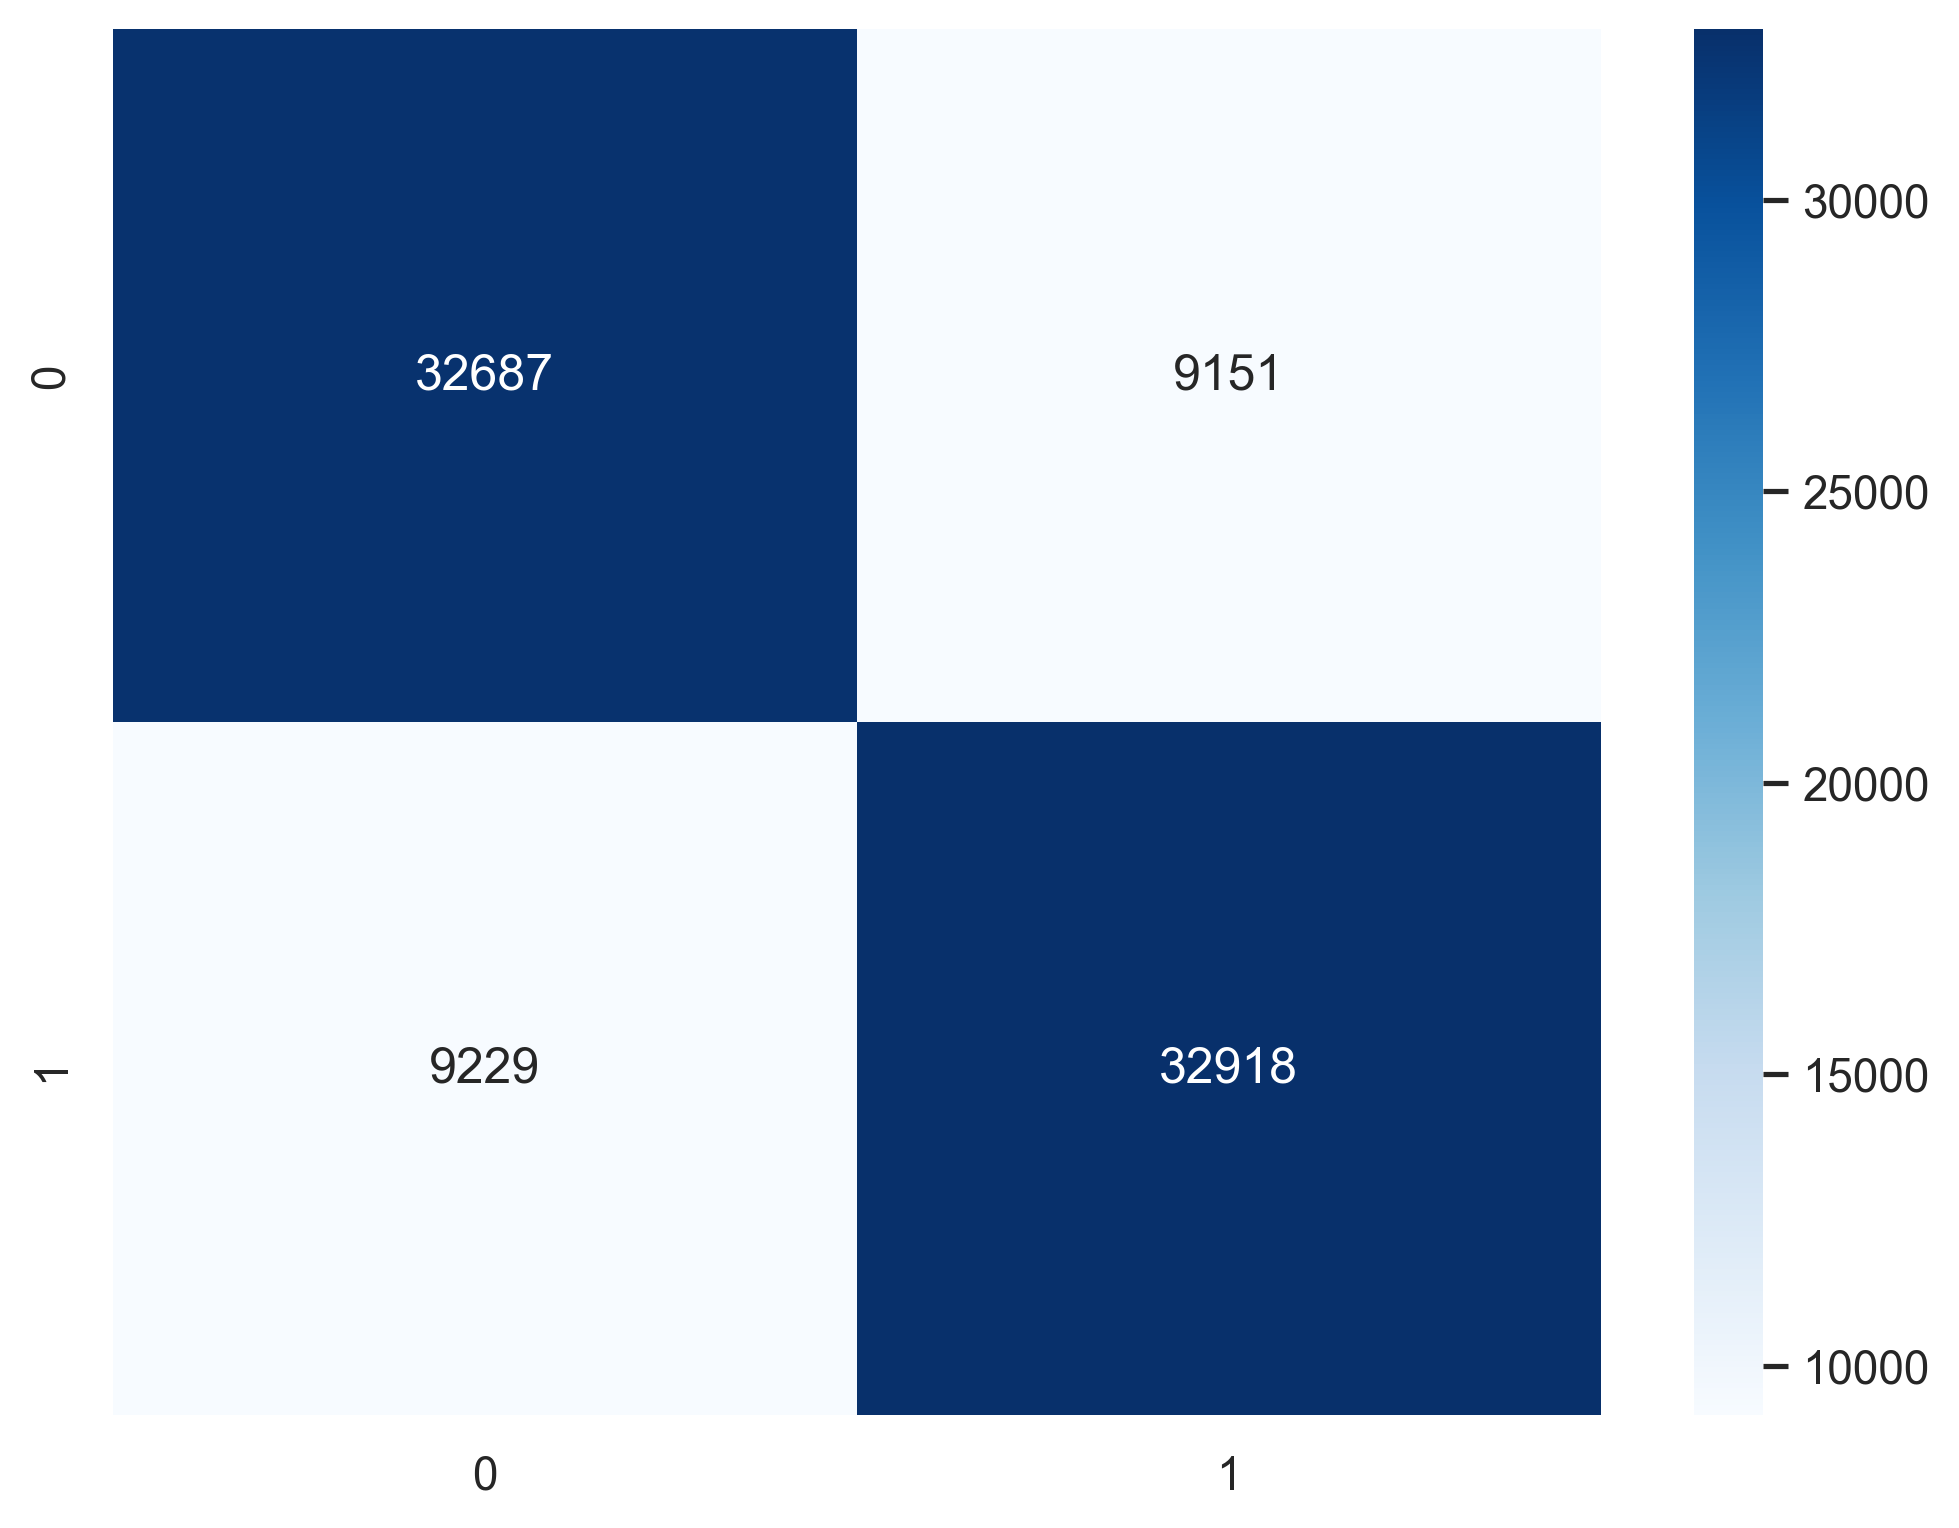

In [38]:
## 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_SVM_pred)
print(conf_matrix)

# 使用seaborn绘制混淆矩阵热图
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.savefig(fname="SVM混淆矩阵.png")

#### 5.4.4 ROC曲线&AUC值
绘制SVM、决策树与Logistic回归的ROC曲线&AUC值对比

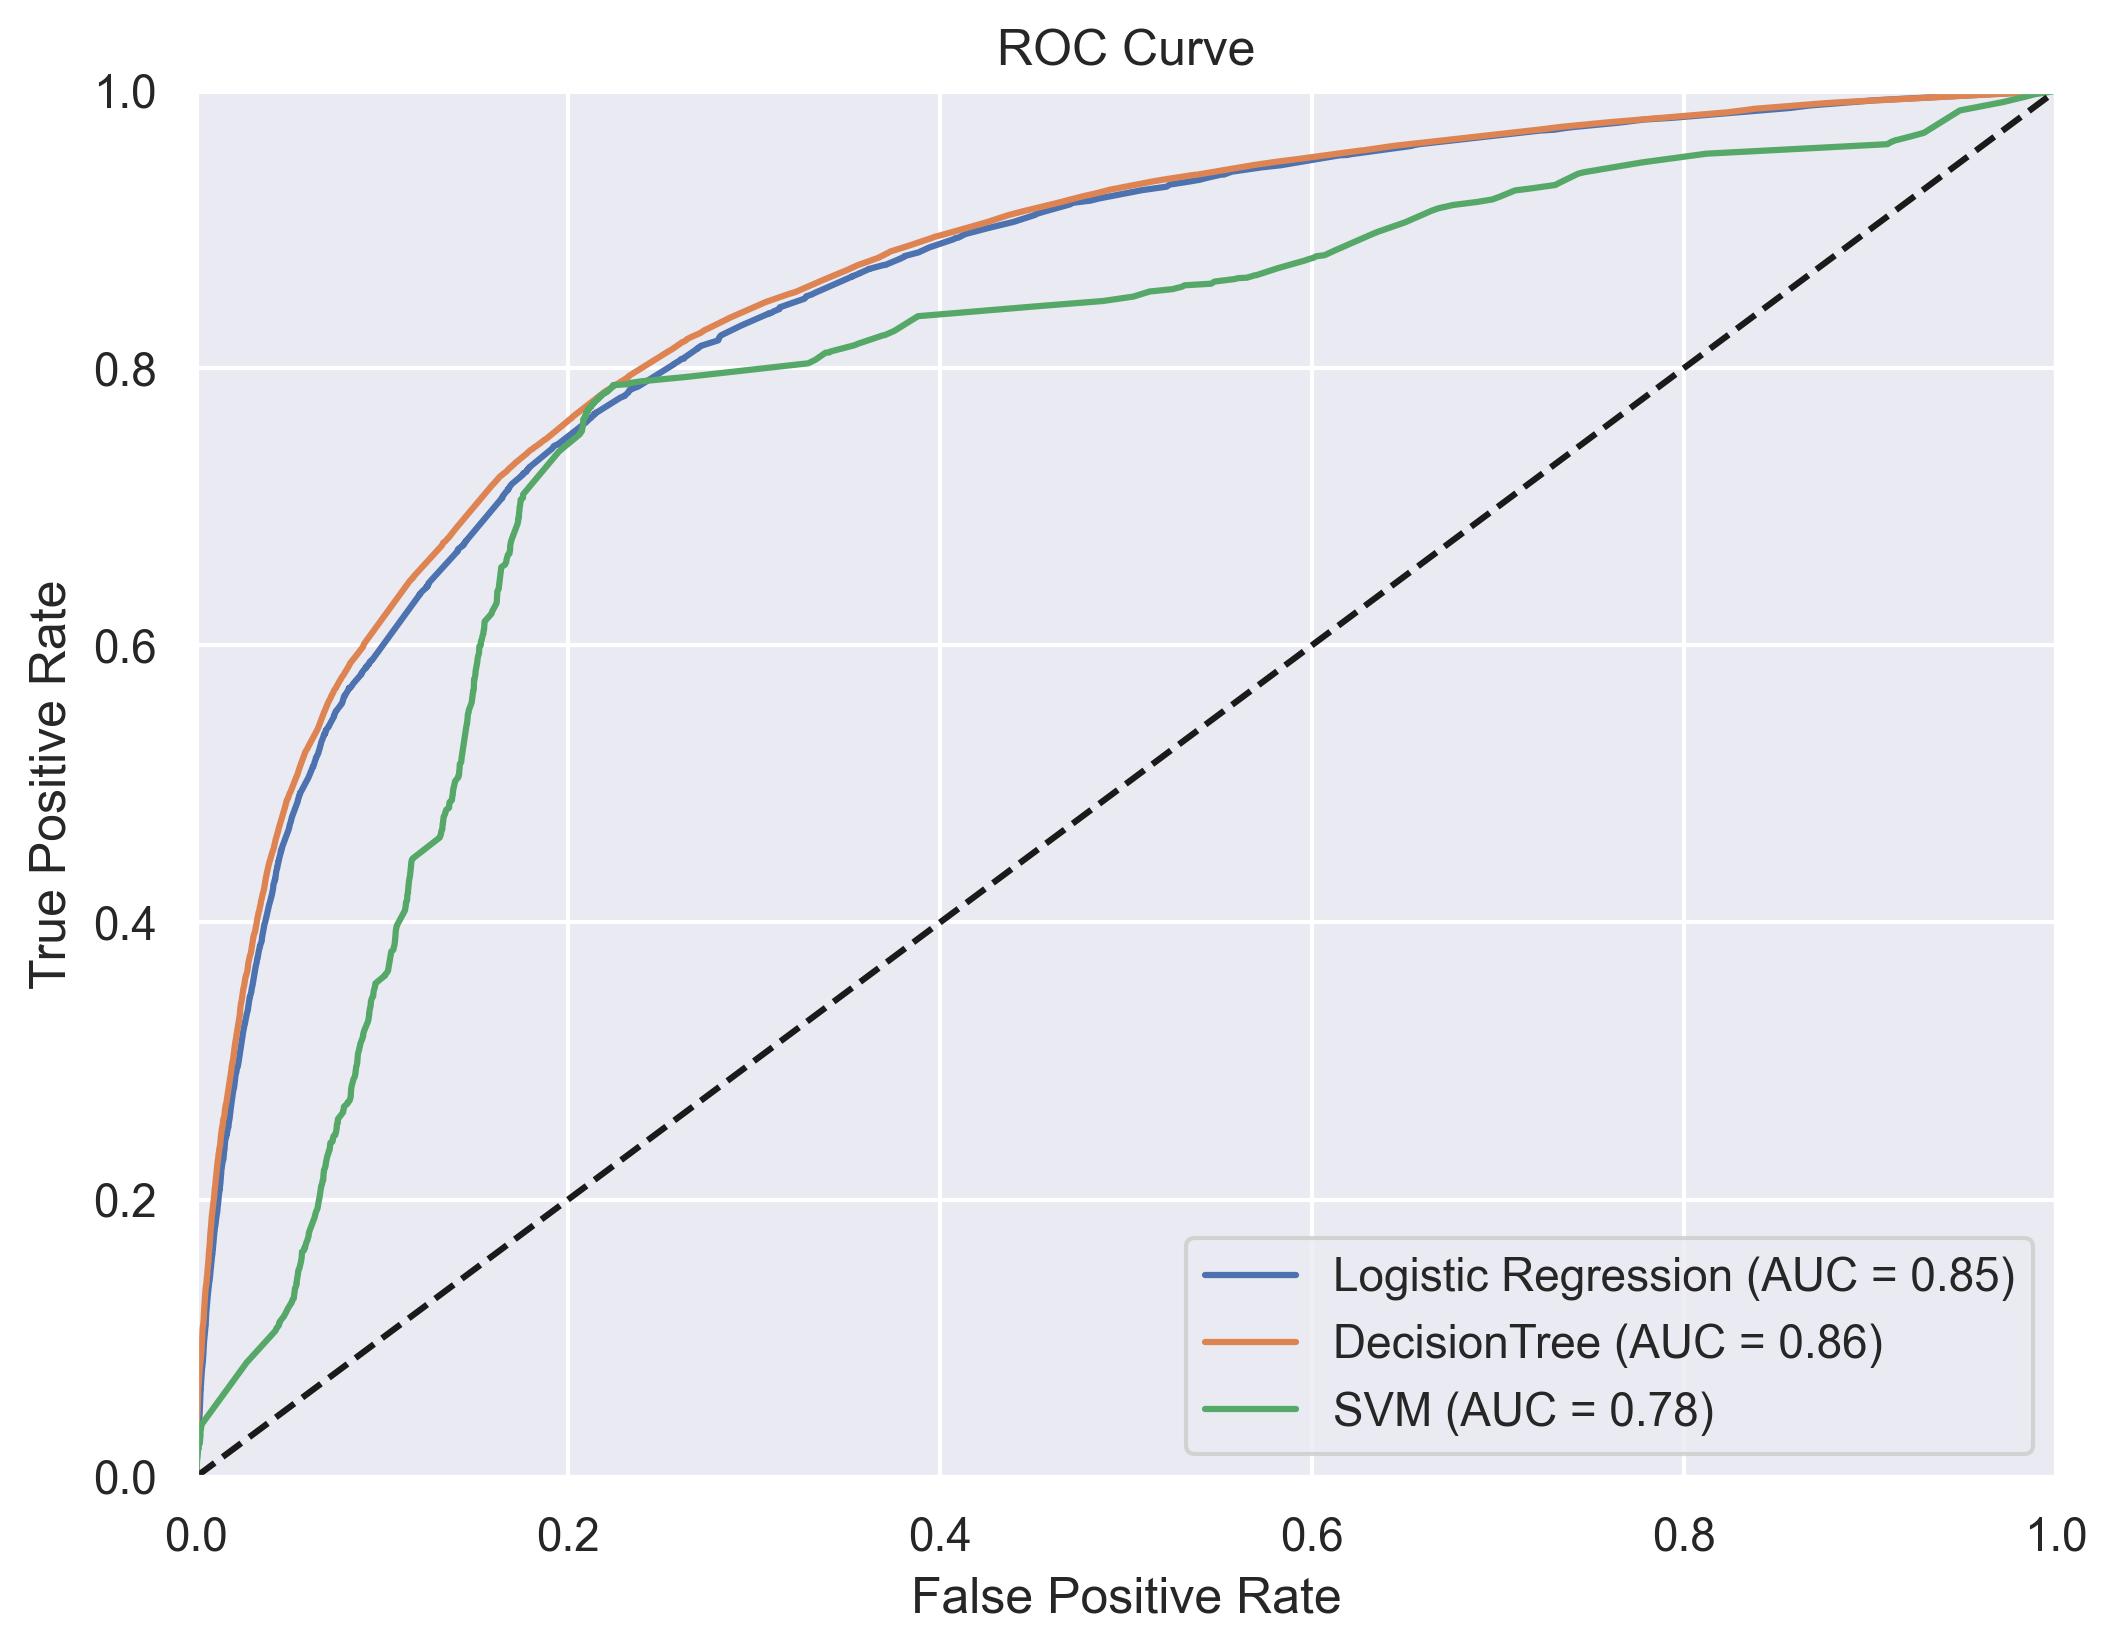

In [39]:
##  ROC曲线&AUC值
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test, SVM_model.predict_proba(X_test)[:, 1])
auc_SVM = auc(fpr_SVM, tpr_SVM)

plt.figure(figsize=(8, 6), dpi=300)
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (AUC = {:.2f})'.format(auc_logistic))
plt.plot(fpr_DecisionTree, tpr_DecisionTree, label='DecisionTree (AUC = {:.2f})'.format(auc_DecisionTree))
plt.plot(fpr_SVM, tpr_SVM, label='SVM (AUC = {:.2f})'.format(auc_SVM))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig(fname="SVM回归ROC曲线.png")

### 5.5 KNN分类
#### 5.5.1 模型调参与拟合
n_neighbors考虑从2到50，最终选择【2】  
计算距离的方式选择metric=【'minkowski'】  
权重选择weights=【'distance'】  
选择标准为F1得分和Lift曲线  
具体选择流程不做赘述

In [40]:
## KNN分类
KNN_model = KNeighborsClassifier(n_neighbors=2, metric='minkowski', weights='distance') 
KNN_model.fit(X_train, y_train)

y_KNN_pred = KNN_model.predict(X_test)

#### 5.5.2 模型评估
##### 准确率Accuracy
正确分类的样本数占总样本数的比例
$$
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
$$
##### 精确率precision
被分类器预测为正类的样本中，真正为正类的样本所占的比例
$$Precision = \frac{TP}{TP+FP}$$
##### 召回率recall
真正为正类的样本中，被分类器预测为正类的样本所占的比例
$$Recall = \frac{TP}{TP+FN}$$
##### F1值f1score
综合考虑精确率和召回率，精确率和召回率的调和平均数
$$F1 = \frac{2 Precision Recall}{Precision+Recall}$$

In [41]:
# 准确率Accuracy--正确分类的样本数占总样本数的比例
accuracy = accuracy_score(y_test, y_KNN_pred)
print("KNN模型预测准确率:", accuracy)

# 精确率precision--被分类器预测为正类的样本中，真正为正类的样本所占的比例
# 召回率recall--真正为正类的样本中，被分类器预测为正类的样本所占的比例
# F1值f1score--综合考虑精确率和召回率，精确率和召回率的调和平均数
print(classification_report(y_test, y_KNN_pred))

KNN模型预测准确率: 0.7212716556527952
              precision    recall  f1-score   support

           0       0.69      0.81      0.74     41838
           1       0.77      0.63      0.70     42147

    accuracy                           0.72     83985
   macro avg       0.73      0.72      0.72     83985
weighted avg       0.73      0.72      0.72     83985



#### 5.5.3 混淆矩阵

[[33828  8010]
 [15399 26748]]


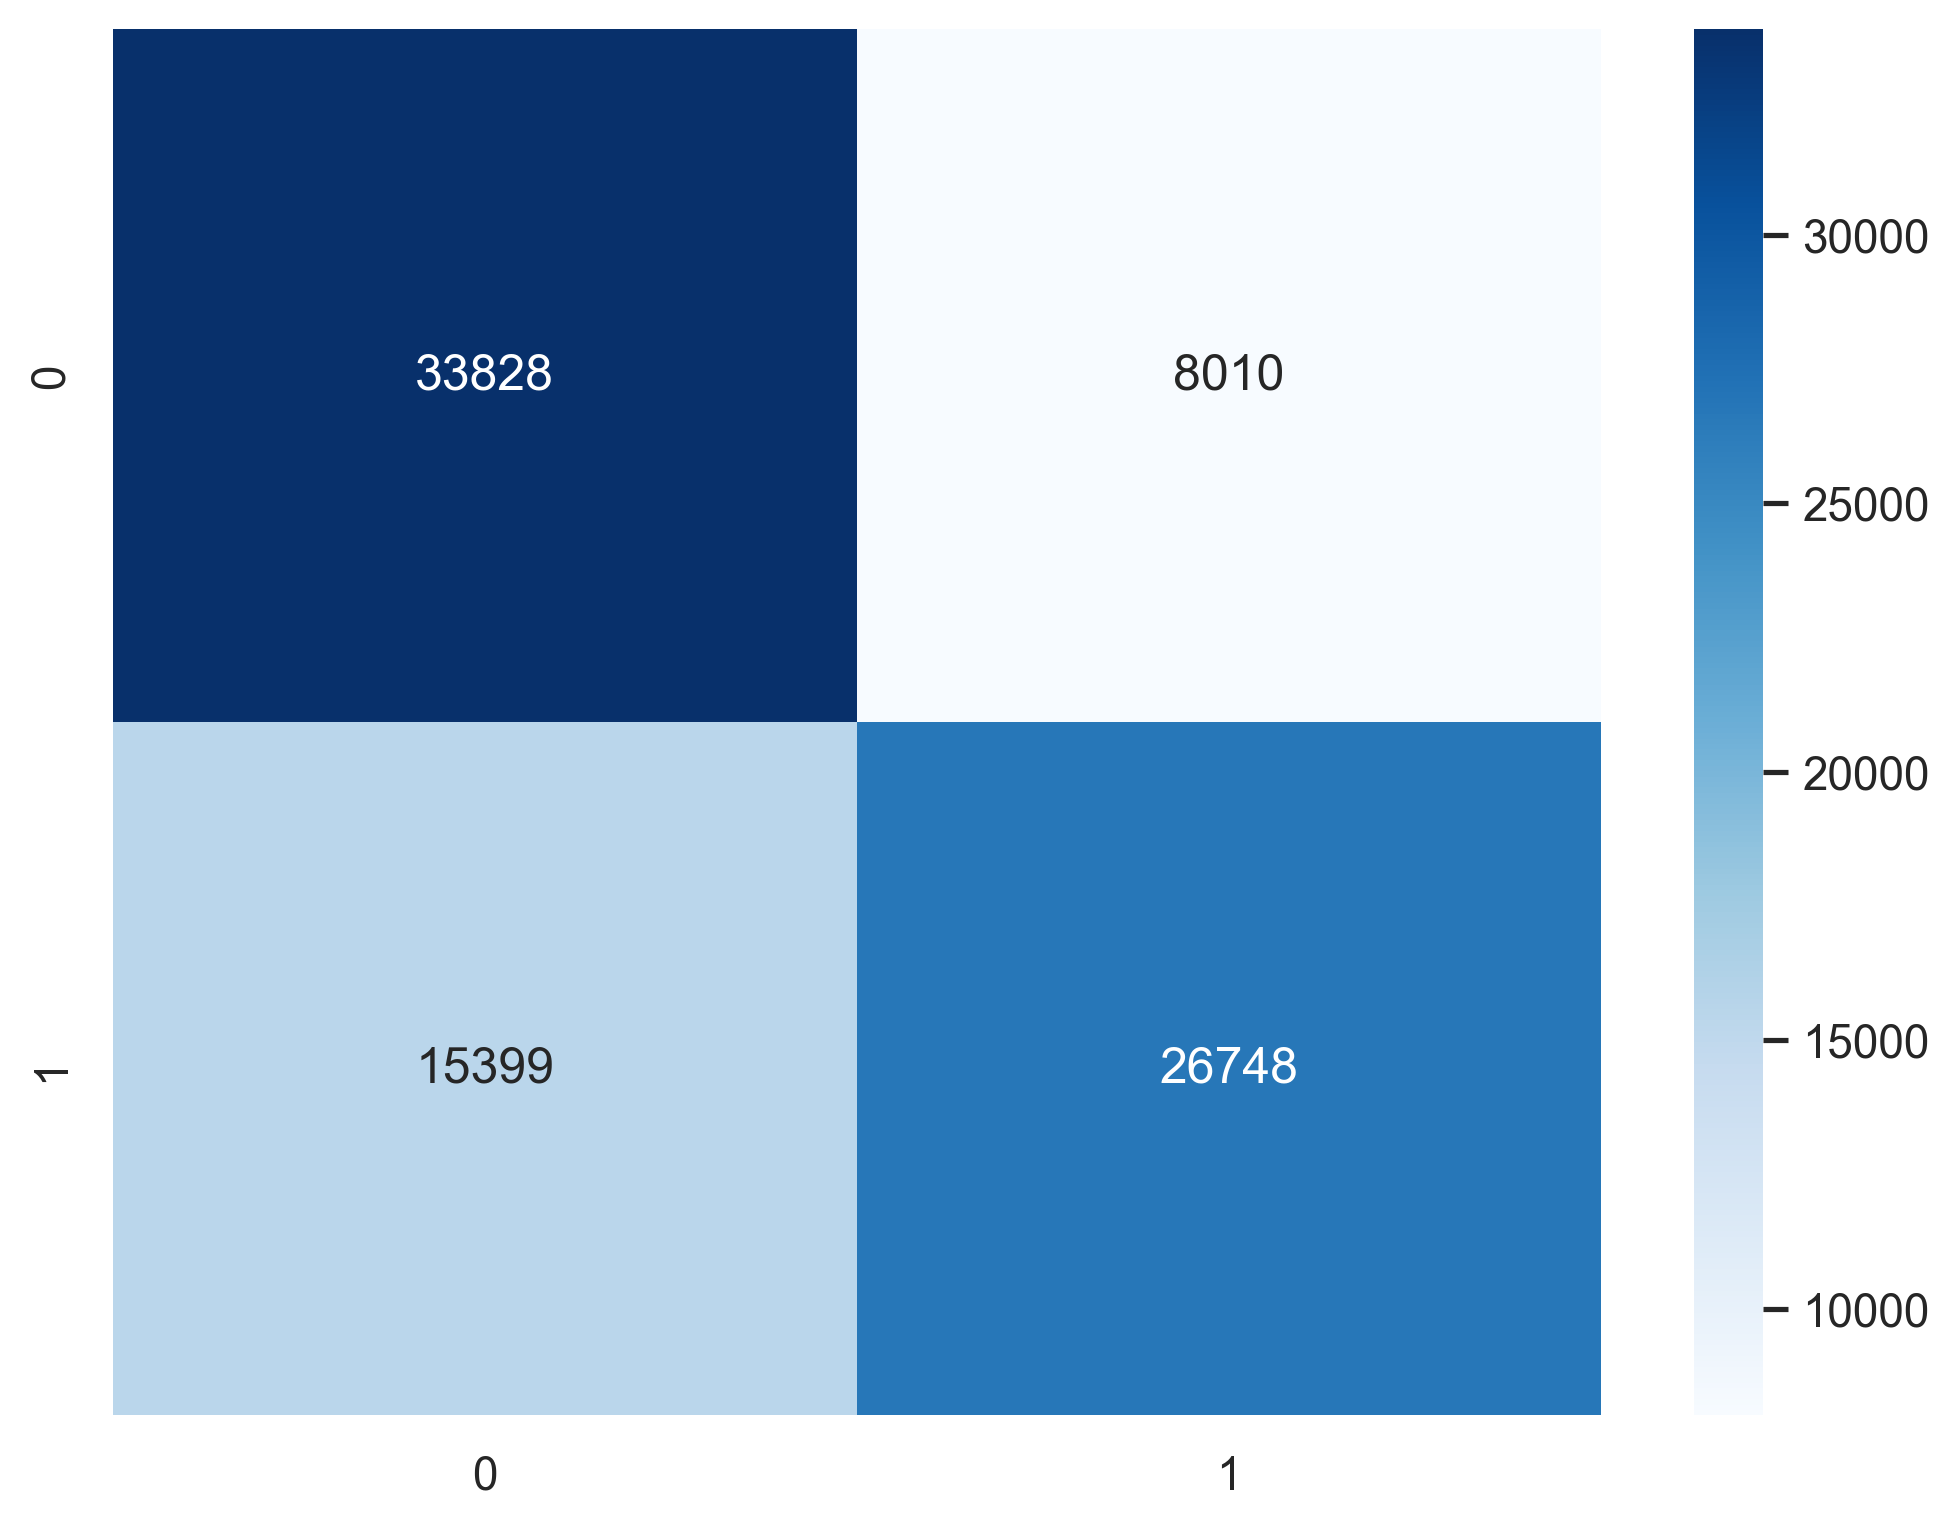

In [42]:
## 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_KNN_pred)
print(conf_matrix)

# 使用seaborn绘制混淆矩阵热图
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.savefig(fname="KNN混淆矩阵.png")


#### 5.5.4  ROC曲线&AUC值
绘制KNN、SVM、决策树与Logistic回归的 ROC曲线&AUC值对比

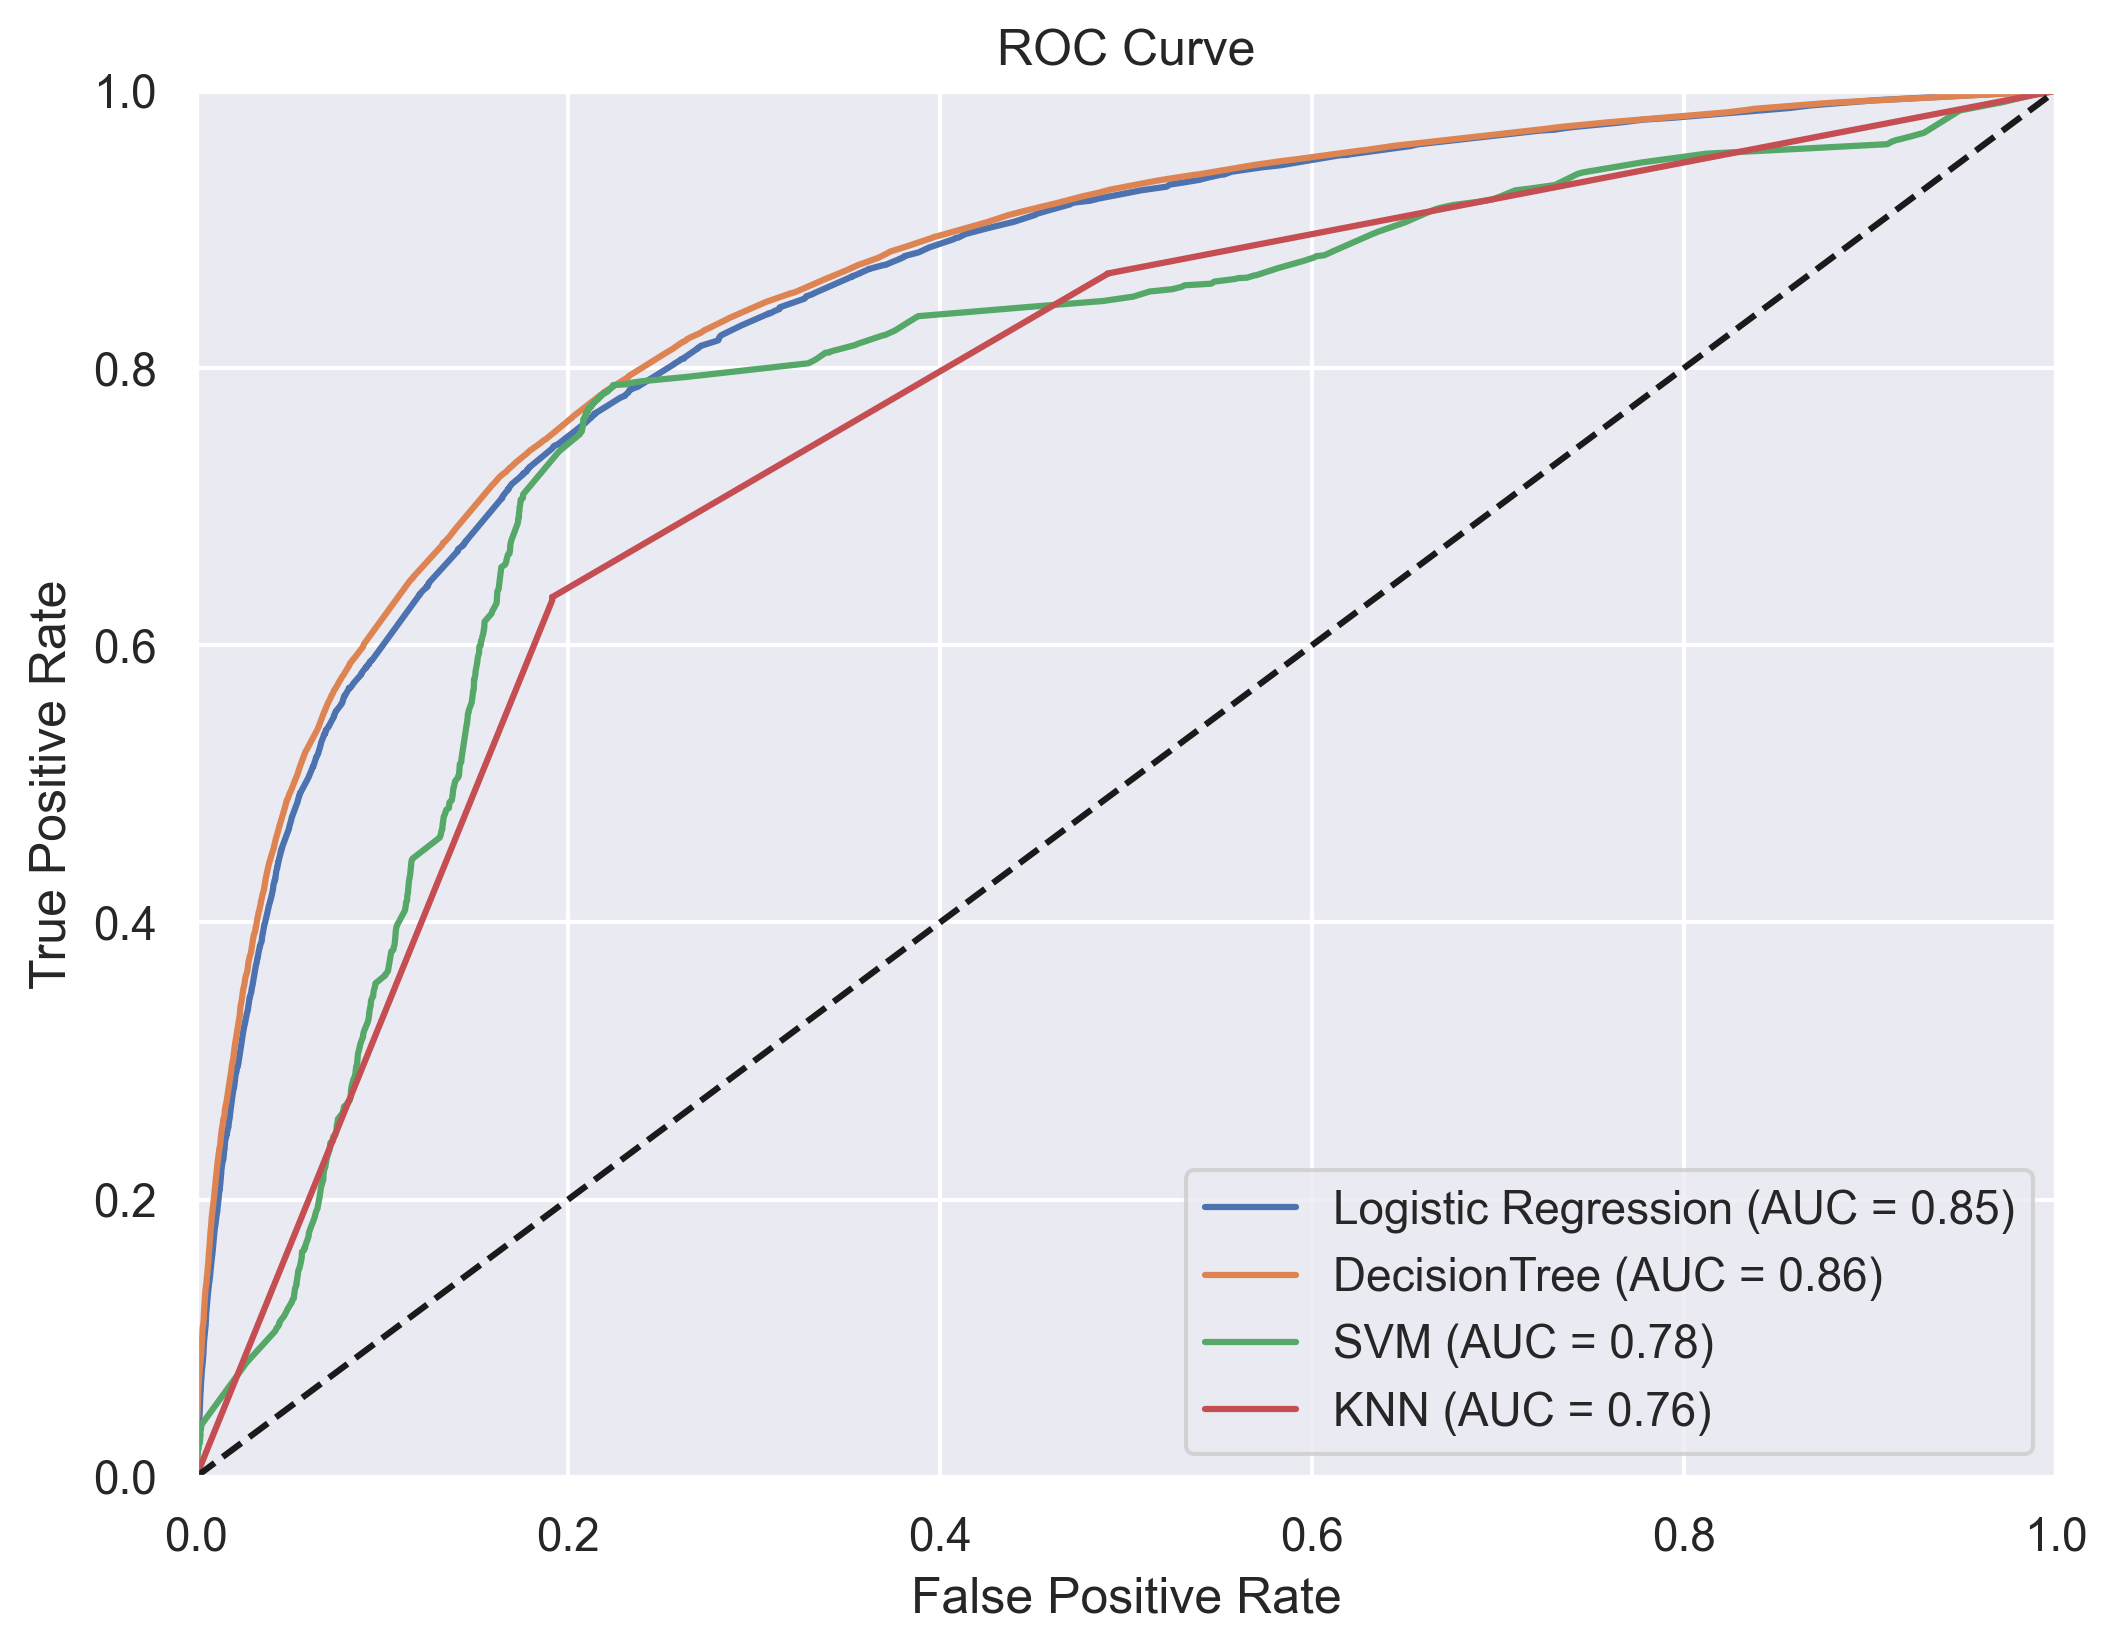

In [65]:
##  ROC曲线&AUC值
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, KNN_model.predict_proba(X_test)[:, 1])
auc_KNN = auc(fpr_KNN, tpr_KNN)

plt.figure(figsize=(8, 6), dpi=300)
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (AUC = {:.2f})'.format(auc_logistic))
plt.plot(fpr_DecisionTree, tpr_DecisionTree, label='DecisionTree (AUC = {:.2f})'.format(auc_DecisionTree))
plt.plot(fpr_SVM, tpr_SVM, label='SVM (AUC = {:.2f})'.format(auc_SVM))
plt.plot(fpr_KNN, tpr_KNN, label='KNN (AUC = {:.2f})'.format(auc_KNN))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig(fname="KNN回归ROC曲线.png")

### 5.6 模型选择
对比ROC曲线&AUC值发现：模型拟合效果：决策树>Logistic回归>SVM>KNN    
但决策树和Logistic回归效果基本一致    
考虑模型的稳健性，使用Logistic回归  
## 六、模型运用
cs-test.csv用于模型运用
### 6.1 剔除无关变量

In [115]:
#--------------------------------6、模型运用--------------------------------#
## cs-test.csv用于模型运用
# 展示前五行数据
print('前五行数据：')
print(df_test.head())

print('所包含的变量', df_test.columns)
df_test = df_test.drop(columns=['DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 'NumberOfDependents'])


前五行数据：
   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1               NaN                              0.885519   43   
1           2               NaN                              0.463295   57   
2           3               NaN                              0.043275   59   
3           4               NaN                              0.280308   38   
4           5               NaN                              1.000000   27   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     0   0.177513         5700.0   
1                                     0   0.527237         9141.0   
2                                     0   0.687648         5083.0   
3                                     1   0.925961         3200.0   
4                                     0   0.019917         3865.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                                4            

### 6.2 数据转换

In [116]:
## 数据变换
# BOX-COX变换
df_test['sqrt_RevolvingUtilizationOfUnsecuredLines'] = np.power(df_test['RevolvingUtilizationOfUnsecuredLines'], 1/4)

### 6.3 异常值检测与处理
这个异常值处理就需要根据业务经验了：  
对于age的异常值，根据箱线图可以看出，年龄过大，不借，判定为【逾期】1；  
对于NumberOfTime30-59DaysPastDueNotWorse、NumberOfTimes90DaysLate和NumberOfTime60-89DaysPastDueNotWorse的异常值，根据箱箱图可以看出存在异常大，根据业务经验，这三者逾期次数过多，直接不用进模型，判定为【逾期】1  
对于sqrt_RevolvingUtilizationOfUnsecuredLines，根据箱箱图可以看出存在异常大，根据业务经验，直接不用进模型，判定为【逾期】1  

age列3sigma外离群值个数为: 21
NumberOfTime30-59DaysPastDueNotWorse列3sigma外离群值个数为: 215
NumberOfTimes90DaysLate列3sigma外离群值个数为: 217
NumberOfTime60-89DaysPastDueNotWorse列3sigma外离群值个数为: 214
sqrt_RevolvingUtilizationOfUnsecuredLines列3sigma外离群值个数为: 153
SeriousDlqin2yrs
1.0    392
Name: count, dtype: int64
用于后续模型预测的DataFrame形状: (101111, 8)


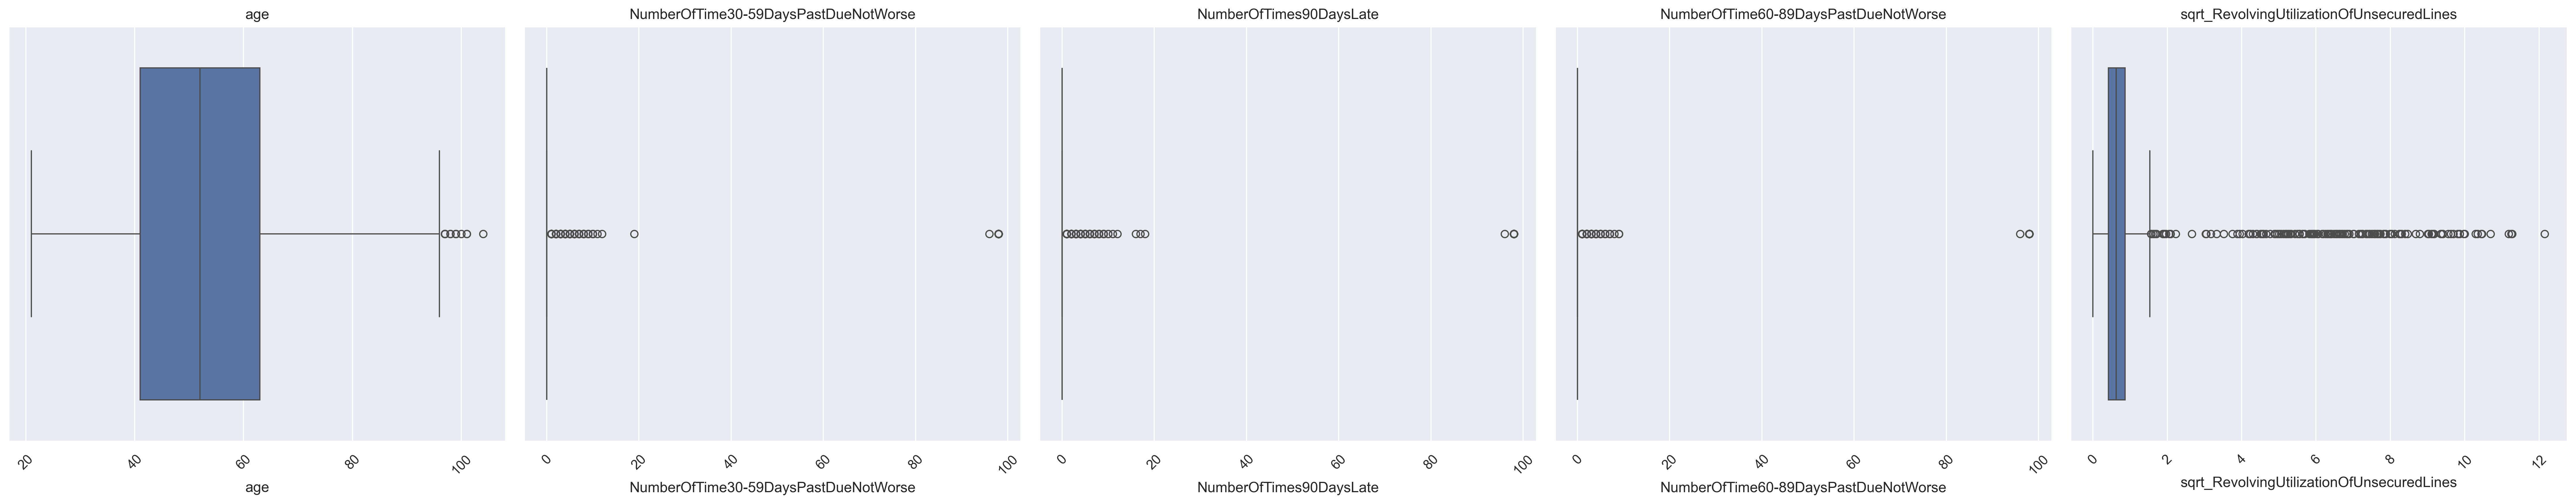

In [131]:
## 异常值检测与处理
# 箱线图
sns.set_theme(font_scale=1)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30, 6), dpi = 300)
axes = axes.flatten()

box_columns = ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
               'NumberOfTime60-89DaysPastDueNotWorse','sqrt_RevolvingUtilizationOfUnsecuredLines']

for i, column in enumerate(box_columns):
    g_previous_box = sns.boxplot(data=df_test, x=column, ax=axes[i])
    axes[i].set_title(column)

    locator = axes[i].get_xticks()
    axes[i].xaxis.set_major_locator(plt.FixedLocator(locator))
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.savefig(fname="预测数据箱线图.png")

# 3sigma法则
for column in box_columns:
    mean_value = df_test[column].mean()
    std_value = df_test[column].std()
    lower_bound = mean_value - 3 * std_value
    upper_bound = mean_value + 3 * std_value
    outlier_count = df_test[(df_test[column] < lower_bound) | (df_test[column] > upper_bound)].shape[0]
    print(f"{column}列3sigma外离群值个数为: {outlier_count}")

# 异常值处理
'''
这个异常值处理就需要根据业务经验了：
对于age的异常值，根据箱线图可以看出，年龄过大，不借，判定为【逾期】1；
对于NumberOfTime30-59DaysPastDueNotWorse、NumberOfTimes90DaysLate和NumberOfTime60-89DaysPastDueNotWorse的异常值，根据箱箱图可以看出存在异常大，根据业务经验，这三者逾期次数过多，直接不用进模型，判定为【逾期】1
对于sqrt_RevolvingUtilizationOfUnsecuredLines，根据箱箱图可以看出存在异常大，根据业务经验，直接不用进模型，判定为【逾期】1
'''

for column in box_columns:
    mean_value = df_test[column].mean()
    std_value = df_test[column].std()
    upper_bound_3sigma = mean_value + 3 * std_value

    if column == 'age':
        df_test.loc[df_test[column] > upper_bound_3sigma, 'SeriousDlqin2yrs'] = 1

    elif column in ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']:
        df_test.loc[df_test[column] > upper_bound_3sigma, 'SeriousDlqin2yrs'] = 1

    elif column =='sqrt_RevolvingUtilizationOfUnsecuredLines':
        df_test.loc[df_test[column] > upper_bound_3sigma, 'SeriousDlqin2yrs'] = 1

print(df_test['SeriousDlqin2yrs'].value_counts())

# 构建新的DataFrame，只保留SeriousDlqin2yrs为空值的行
df_forecast = df_test[df_test['SeriousDlqin2yrs'].isnull()]

print("用于后续模型预测的DataFrame形状:", df_forecast.shape)

### 6.4 缺失值检测与处理

In [132]:
## 缺失值检测
# 缺失情况
print('缺失值情况及比例：')
total_rows = df_forecast.shape[0]
missing_value_sums = df_forecast.isnull().sum()
missing_value_proportions = (missing_value_sums / total_rows) * 100

for column, missing_count in missing_value_sums.items():
    proportion = missing_value_proportions[column]
    print(f"{column}: 缺失值数量为 {missing_count}，缺失值比例为 {proportion:.2f}%")

缺失值情况及比例：
Unnamed: 0: 缺失值数量为 0，缺失值比例为 0.00%
SeriousDlqin2yrs: 缺失值数量为 101111，缺失值比例为 100.00%
RevolvingUtilizationOfUnsecuredLines: 缺失值数量为 0，缺失值比例为 0.00%
age: 缺失值数量为 0，缺失值比例为 0.00%
NumberOfTime30-59DaysPastDueNotWorse: 缺失值数量为 0，缺失值比例为 0.00%
NumberOfTimes90DaysLate: 缺失值数量为 0，缺失值比例为 0.00%
NumberOfTime60-89DaysPastDueNotWorse: 缺失值数量为 0，缺失值比例为 0.00%
sqrt_RevolvingUtilizationOfUnsecuredLines: 缺失值数量为 0，缺失值比例为 0.00%


### 6.5 基于训练模型的cutoff分箱

   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1               NaN                              0.885519   43   
1           2               NaN                              0.463295   57   
2           3               NaN                              0.043275   59   
3           4               NaN                              0.280308   38   
4           5               NaN                              1.000000   27   

   NumberOfTime30-59DaysPastDueNotWorse  NumberOfTimes90DaysLate  \
0                                     0                        0   
1                                     0                        0   
2                                     0                        0   
3                                     1                        0   
4                                     0                        0   

   NumberOfTime60-89DaysPastDueNotWorse  \
0                                     0   
1                                   

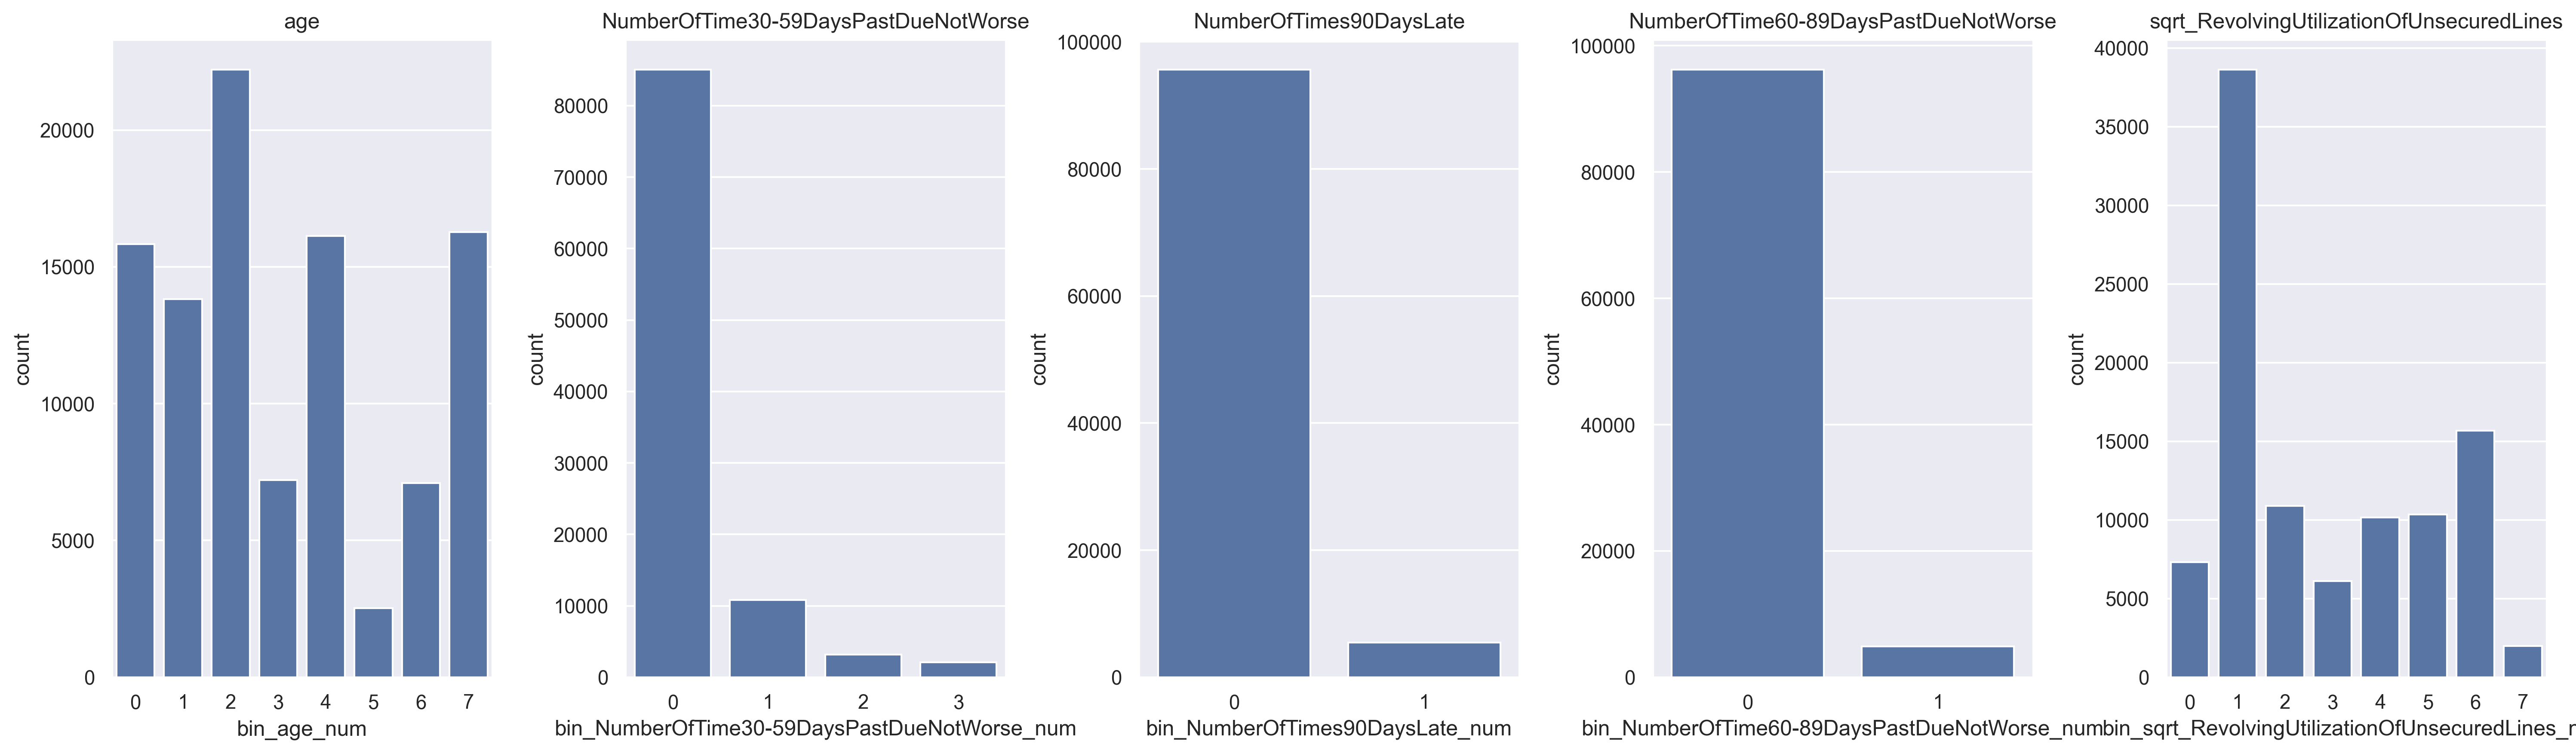

In [134]:
## 决策树分箱
forecast_features_to_bin = ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
                            'NumberOfTime60-89DaysPastDueNotWorse','sqrt_RevolvingUtilizationOfUnsecuredLines']

forecast_target_column = 'SeriousDlqin2yrs'

for feature in forecast_features_to_bin:
    cut_points = train_bin_cutoffs[feature]
    df_forecast.loc[:, 'bin_' + feature] = pd.cut(df_forecast[feature], bins=cut_points)
    df_forecast.loc[:, 'bin_' + feature + '_num'] = df_forecast['bin_' + feature].cat.codes

print(df_forecast.head())

# 分箱结果可视化
sns.set_theme(font_scale=1)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6), dpi=300)
axes = axes.flatten()

for i, feature in enumerate(forecast_features_to_bin):
    ax = axes[i]

    sns.countplot(data=df_forecast, x='bin_' + feature + '_num', ax=ax)

    ax.set_title(feature)

plt.tight_layout()
plt.savefig(fname="预测数据分箱结果.png")

### 6.5 基于训练模型的WOE字典编码

In [135]:
# WOE编码
print(woe_dicts)
def woe_transformation_prediction(data, categorical_cols, woe_dicts):
    """
    在预测阶段对指定的分类变量列进行WOE处理，使用已有的WOE字典

    :param data: 包含数据的DataFrame，这里是预测数据df_forecast
    :param categorical_cols: 需要进行WOE处理的分类变量列名列表，如['bin_age_num',...]
    :param woe_dicts: 训练阶段计算得到的各个分类变量对应的WOE字典，例如{'bin_age_num': {...}, 'bin_NumberOfTime30-59DaysPastDueNotWorse_num': {...},...}
    :return: 处理后的DataFrame
    """
    for col in categorical_cols:
        woe_dict = woe_dicts[col]
        data.loc[:, f'{col}_woe'] = data[col].map(woe_dict)

    return data

forecast_categorical_cols = ['bin_age_num',
                    'bin_NumberOfTime30-59DaysPastDueNotWorse_num',
                    'bin_NumberOfTimes90DaysLate_num',
                    'bin_NumberOfTime60-89DaysPastDueNotWorse_num',
                    'bin_sqrt_RevolvingUtilizationOfUnsecuredLines_num']

df_forecast_woe_encoded = woe_transformation_prediction(df_forecast, forecast_categorical_cols, woe_dicts)

# 丢弃无关信息
df_forecast = df_forecast.drop(columns=['age', 'RevolvingUtilizationOfUnsecuredLines', 
       'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse',
       'sqrt_RevolvingUtilizationOfUnsecuredLines',
       'bin_age',
       'bin_NumberOfTime30-59DaysPastDueNotWorse',
       'bin_NumberOfTimes90DaysLate',
       'bin_NumberOfTime60-89DaysPastDueNotWorse',
       'bin_sqrt_RevolvingUtilizationOfUnsecuredLines',
       'bin_age_num',
       'bin_NumberOfTime30-59DaysPastDueNotWorse_num',
       'bin_NumberOfTimes90DaysLate_num',
       'bin_NumberOfTime60-89DaysPastDueNotWorse_num',
       'bin_sqrt_RevolvingUtilizationOfUnsecuredLines_num'])

{'bin_age_num': {2: -0.1749663146649662, 1: -0.32679680110495457, 0: -0.546800218136184, 7: 1.1391383143065097, 4: 0.3018316932635076, 6: 0.7604680590775301, 3: -0.026589060535239926, 5: 0.6350258593336569}, 'bin_NumberOfTime30-59DaysPastDueNotWorse_num': {2: -1.6167260150022267, 0: 0.5137924202657891, 1: -0.9036537525075922, 3: -2.1990611658125006}, 'bin_DebtRatio_num': {4: -0.5969733568084485, 2: 0.10595635882270667, 7: 0.35617005094486626, 5: 0.4846838296877893, 3: -0.2152383428014291, 6: -0.16474032829976457, 1: 0.692564000328816, 0: -0.22959486988114172}, 'bin_MonthlyIncome_num': {6: 0.28142537448916, 1: -0.46531260831541804, 5: 0.14182856550059292, 2: -0.27210848199337195, 7: 0.46709280729375907, 0: 0.3841499139091175, 3: 0.22338073043047257, 4: -0.008149418254134245}, 'bin_NumberOfTimes90DaysLate_num': {0: 0.3678855168770794, 1: -2.280714771644403}, 'bin_NumberRealEstateLoansOrLines_num': {1: 0.2029746074528213, 0: -0.23596977873074704, 3: -0.09074370063080989, 2: 0.188638735811

/var/folders/nk/ybyq6yb13njgrdf270gg6j2m0000gn/T/ipykernel_22816/2266722791.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, f'{col}_woe'] = data[col].map(woe_dict)
/var/folders/nk/ybyq6yb13njgrdf270gg6j2m0000gn/T/ipykernel_22816/2266722791.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, f'{col}_woe'] = data[col].map(woe_dict)
/var/folders/nk/ybyq6yb13njgrdf270gg6j2m0000gn/T/ipykernel_22816/2266722791.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

以上属于警告，不管了

### 6.6 预测逾期人

In [136]:
## 模型预测
X_forecast = df_forecast.drop(['Unnamed: 0', 'SeriousDlqin2yrs'], axis=1)
y_forecast = logistic_model.predict(X_forecast)

## 输出逾期人ID
df_forecast['SeriousDlqin2yrs'] = y_forecast

unamed_0_values_def = df_test.loc[df_test['SeriousDlqin2yrs'] == 1, 'Unnamed: 0'].reset_index(drop=True)
unamed_0_values_model = df_forecast.loc[df_forecast['SeriousDlqin2yrs'] == 1, 'Unnamed: 0'].reset_index(drop=True)

print('以下ID可能逾期')
print(unamed_0_values_def)
print( unamed_0_values_model)

以下ID可能逾期
0          10
1          70
2         167
3         308
4         704
        ...  
387    100163
388    100220
389    100654
390    101208
391    101483
Name: Unnamed: 0, Length: 392, dtype: int64
0             1
1             5
2            19
3            24
4            25
          ...  
22051    101490
22052    101491
22053    101496
22054    101500
22055    101502
Name: Unnamed: 0, Length: 22056, dtype: int64


## 七、参考文档

In [137]:
## Referen
# https://zhuanlan.zhihu.com/p/542766863
# https://zhuanlan.zhihu.com/p/541021916